## SciANN Burger 1D

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow
import sciann as sn

### Burgers problem

The governing equation is :
$$u_{,t} + uu_{,x} - (0.01/\pi )u_{,xx} = 0, \qquad t \in [0,1], \qquad x \in [-1,1]$$
Subjected to :
$$u(t=0,x) = -\sin(\pi x), \qquad u(t,x=\pm1)=0$$
The objective is to solve this equation with PINN

### Neural Network

The independent variables are: $(t, x)$ The field variable is: $u(t, x)$

Here, we use 8 hidden layers with 20 neural units and hyperbolic-tangent activation function.

In [3]:
x = sn.Variable('x')
t = sn.Variable('t')
u = sn.Functional('u', [t,x], 8*[20], 'tanh')

### Setting up the optimization problem

In [4]:
from numpy import pi
from sciann.utils.math import diff, sign, sin

In [5]:
L1 = diff(u, t) + u*diff(u,x) - (0.01/pi)*diff(u, x, order=2)

Boundary conditions :

In [6]:
TOL = 0.001
C1 = (1-sign(t - TOL)) * (u + sin(pi*x))
C2 = (1-sign(x - (-1+TOL))) * (u)
C3 = (1+sign(x - ( 1-TOL))) * (u)

In [7]:
m = sn.SciModel([x, t], [L1, C1, C2, C3],"mse", "Adam")

Sampling, collocation grid : 

To train the network, we need to define a smapling collocation grid.

In [8]:
x_data, t_data = np.meshgrid(
    np.linspace(-1, 1, 100), 
    np.linspace(0, 1, 100)
)

#### Training

In [10]:
h = m.train([x_data, t_data], 4*['zero'], learning_rate=0.002,batch_size=256, epochs=10000, verbose=1)

Epoch 1/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0273 - sub_loss: 0.0150 - mul_4_loss: 0.0090 - mul_5_loss: 0.0016 - mul_6_loss: 0.0011  
Epoch 2/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0199 - sub_loss: 5.4034e-04 - mul_4_loss: 0.0184 - mul_5_loss: 2.7089e-04 - mul_6_loss: 3.7495e-04
Epoch 3/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0193 - sub_loss: 4.1324e-04 - mul_4_loss: 0.0182 - mul_5_loss: 1.8263e-04 - mul_6_loss: 1.2189e-04
Epoch 4/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0190 - sub_loss: 4.7656e-04 - mul_4_loss: 0.0177 - mul_5_loss: 2.2901e-04 - mul_6_loss: 1.7521e-04
Epoch 5/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0201 - sub_loss: 4.4133e-04 - mul_4_loss: 0.0187 - mul_5_loss: 4.3751e-04 - mul_6_loss: 3.1266e-04
Epoch 6/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0070 - sub_loss: 0.0013 - mul_4_loss: 0.0055 - mul_5_loss: 7.4842e-05 - mul_6_loss: 8.1311e-05
Epoch 46/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0068 - sub_loss: 7.6294e-04 - mul_4_loss: 0.0057 - mul_5_loss: 1.4288e-04 - mul_6_loss: 3.2845e-05
Epoch 47/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0068 - sub_loss: 0.0012 - mul_4_loss: 0.0052 - mul_5_loss: 1.2711e-04 - mul_6_loss: 2.9461e-05
Epoch 48/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0062 - sub_loss: 0.0011 - mul_4_loss: 0.0049 - mul_5_loss: 1.4027e-04 - mul_6_loss: 3.6588e-05
Epoch 49/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0069 - sub_loss: 0.0016 - mul_4_loss: 0.0049 - mul_5_loss: 1.3217e-04 - mul_6_loss: 6.6580e-05
Epoch 50/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0059 - sub_los

10000/10000 [==============================] - 0s 18us/sample - loss: 0.0058 - sub_loss: 9.0726e-04 - mul_4_loss: 0.0047 - mul_5_loss: 5.0716e-05 - mul_6_loss: 3.4859e-05
Epoch 89/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0089 - sub_loss: 0.0027 - mul_4_loss: 0.0058 - mul_5_loss: 9.7280e-05 - mul_6_loss: 8.8544e-05
Epoch 90/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0079 - sub_loss: 9.5893e-04 - mul_4_loss: 0.0066 - mul_5_loss: 6.1404e-05 - mul_6_loss: 1.0239e-04
Epoch 91/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0064 - sub_loss: 4.4584e-04 - mul_4_loss: 0.0057 - mul_5_loss: 3.2116e-05 - mul_6_loss: 1.2978e-05
Epoch 92/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0054 - sub_loss: 6.5423e-04 - mul_4_loss: 0.0046 - mul_5_loss: 5.7100e-05 - mul_6_loss: 2.4611e-05
Epoch 93/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.00

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0134 - sub_loss: 0.0068 - mul_4_loss: 0.0057 - mul_5_loss: 1.9726e-04 - mul_6_loss: 3.3849e-04
Epoch 133/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0100 - sub_loss: 0.0013 - mul_4_loss: 0.0081 - mul_5_loss: 3.5240e-04 - mul_6_loss: 1.9489e-04
Epoch 134/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0083 - sub_loss: 6.6635e-04 - mul_4_loss: 0.0073 - mul_5_loss: 9.4661e-05 - mul_6_loss: 2.1394e-05
Epoch 135/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0076 - sub_loss: 7.3443e-04 - mul_4_loss: 0.0066 - mul_5_loss: 5.3517e-05 - mul_6_loss: 2.7836e-05
Epoch 136/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0073 - sub_loss: 7.9178e-04 - mul_4_loss: 0.0062 - mul_5_loss: 6.5312e-05 - mul_6_loss: 3.0448e-05
Epoch 137/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0087 - sub_loss: 8.4670e-04 - mul_4_loss: 0.0076 - mul_5_loss: 8.2164e-05 - mul_6_loss: 4.2762e-05
Epoch 177/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0085 - sub_loss: 8.3971e-04 - mul_4_loss: 0.0074 - mul_5_loss: 8.8074e-05 - mul_6_loss: 3.2338e-05
Epoch 178/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0079 - sub_loss: 7.0566e-04 - mul_4_loss: 0.0070 - mul_5_loss: 6.8036e-05 - mul_6_loss: 2.0514e-05
Epoch 179/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0074 - sub_loss: 5.8843e-04 - mul_4_loss: 0.0066 - mul_5_loss: 3.7090e-05 - mul_6_loss: 2.0727e-05
Epoch 180/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0072 - sub_loss: 6.1705e-04 - mul_4_loss: 0.0064 - mul_5_loss: 2.6153e-05 - mul_6_loss: 3.4970e-05
Epoch 181/10000
10000/10000 [==============================] - 0s 16us/sample - l

10000/10000 [==============================] - 0s 21us/sample - loss: 0.0073 - sub_loss: 0.0025 - mul_4_loss: 0.0045 - mul_5_loss: 2.4709e-05 - mul_6_loss: 1.4915e-04
Epoch 221/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0064 - sub_loss: 7.6688e-04 - mul_4_loss: 0.0052 - mul_5_loss: 3.4344e-05 - mul_6_loss: 2.5575e-04
Epoch 222/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0052 - sub_loss: 5.2278e-04 - mul_4_loss: 0.0045 - mul_5_loss: 1.1096e-05 - mul_6_loss: 4.3977e-05
Epoch 223/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0058 - sub_loss: 0.0015 - mul_4_loss: 0.0042 - mul_5_loss: 1.4402e-05 - mul_6_loss: 6.1912e-05  
Epoch 224/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0057 - sub_loss: 9.2644e-04 - mul_4_loss: 0.0046 - mul_5_loss: 5.1731e-05 - mul_6_loss: 5.5519e-05
Epoch 225/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0061 - sub_loss: 5.3874e-04 - mul_4_loss: 0.0053 - mul_5_loss: 2.1582e-05 - mul_6_loss: 3.5736e-05
Epoch 265/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0056 - sub_loss: 5.3326e-04 - mul_4_loss: 0.0050 - mul_5_loss: 1.5178e-05 - mul_6_loss: 4.3316e-06
Epoch 266/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0060 - sub_loss: 8.6067e-04 - mul_4_loss: 0.0050 - mul_5_loss: 2.1015e-05 - mul_6_loss: 1.3921e-05
Epoch 267/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0072 - sub_loss: 0.0016 - mul_4_loss: 0.0052 - mul_5_loss: 1.6829e-04 - mul_6_loss: 2.5620e-05
Epoch 268/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0059 - sub_loss: 5.9283e-04 - mul_4_loss: 0.0051 - mul_5_loss: 2.1253e-05 - mul_6_loss: 2.2776e-05 loss: 0.0068 - sub_loss: 9.3399e-04 - mul_4_loss: 0.0058 - mul_5_loss: 2.5763e-05 - m

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0052 - sub_loss: 4.1054e-04 - mul_4_loss: 0.0046 - mul_5_loss: 2.9843e-06 - mul_6_loss: 1.9041e-05
Epoch 308/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0059 - sub_loss: 0.0012 - mul_4_loss: 0.0046 - mul_5_loss: 1.6956e-05 - mul_6_loss: 2.0565e-05
Epoch 309/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0071 - sub_loss: 0.0011 - mul_4_loss: 0.0058 - mul_5_loss: 2.5132e-05 - mul_6_loss: 6.1451e-05
Epoch 310/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0065 - sub_loss: 7.9991e-04 - mul_4_loss: 0.0058 - mul_5_loss: 4.3263e-06 - mul_6_loss: 1.7417e-05
Epoch 311/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0116 - sub_loss: 0.0038 - mul_4_loss: 0.0070 - mul_5_loss: 3.2282e-04 - mul_6_loss: 2.4883e-04
Epoch 312/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0071 

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0048 - sub_loss: 5.9283e-04 - mul_4_loss: 0.0040 - mul_5_loss: 3.8298e-05 - mul_6_loss: 2.0545e-05
Epoch 352/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0052 - sub_loss: 0.0011 - mul_4_loss: 0.0058 - mul_5_loss: 1.9997e-05 - mul_6_loss: 3.4130e-05
Epoch 353/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0087 - sub_loss: 0.0038 - mul_4_loss: 0.0046 - mul_5_loss: 1.0561e-04 - mul_6_loss: 4.5140e-05
Epoch 354/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0058 - sub_loss: 6.5155e-04 - mul_4_loss: 0.0049 - mul_5_loss: 6.1151e-05 - mul_6_loss: 4.1618e-05
Epoch 355/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0051 - sub_loss: 3.6560e-04 - mul_4_loss: 0.0054 - mul_5_loss: 3.1344e-05 - mul_6_loss: 3.7756e-06
Epoch 356/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0051 - sub_loss: 8.0721e-04 - mul_4_loss: 0.0042 - mul_5_loss: 1.9768e-05 - mul_6_loss: 1.1497e-05
Epoch 396/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0067 - sub_loss: 0.0020 - mul_4_loss: 0.0046 - mul_5_loss: 1.3630e-05 - mul_6_loss: 2.2219e-05
Epoch 397/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0061 - sub_loss: 7.3076e-04 - mul_4_loss: 0.0052 - mul_5_loss: 3.2745e-05 - mul_6_loss: 3.7409e-05
Epoch 398/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0054 - sub_loss: 3.8861e-04 - mul_4_loss: 0.0049 - mul_5_loss: 7.2183e-06 - mul_6_loss: 1.3586e-05
Epoch 399/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0051 - sub_loss: 4.7843e-04 - mul_4_loss: 0.0045 - mul_5_loss: 2.6462e-06 - mul_6_loss: 8.8716e-06
Epoch 400/10000
10000/10000 [==============================] - 0s 15us/sample - loss:

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0055 - sub_loss: 6.8221e-04 - mul_4_loss: 0.0047 - mul_5_loss: 8.8028e-06 - mul_6_loss: 3.3344e-05
Epoch 440/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0049 - sub_loss: 3.7738e-04 - mul_4_loss: 0.0044 - mul_5_loss: 7.5210e-06 - mul_6_loss: 1.1204e-05
Epoch 441/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0050 - sub_loss: 6.8738e-04 - mul_4_loss: 0.0042 - mul_5_loss: 2.4612e-05 - mul_6_loss: 2.3137e-05
Epoch 442/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0061 - sub_loss: 0.0017 - mul_4_loss: 0.0042 - mul_5_loss: 3.8865e-05 - mul_6_loss: 4.1481e-05
Epoch 443/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0062 - sub_loss: 0.0010 - mul_4_loss: 0.0048 - mul_5_loss: 9.2832e-05 - mul_6_loss: 6.5929e-05
Epoch 444/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0

10000/10000 [==============================] - 0s 18us/sample - loss: 0.0057 - sub_loss: 4.8506e-04 - mul_4_loss: 0.0050 - mul_5_loss: 8.8893e-06 - mul_6_loss: 1.1965e-04
Epoch 484/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0055 - sub_loss: 8.1660e-04 - mul_4_loss: 0.0045 - mul_5_loss: 1.2853e-05 - mul_6_loss: 9.1420e-05
Epoch 485/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0053 - sub_loss: 8.9975e-04 - mul_4_loss: 0.0042 - mul_5_loss: 9.6629e-06 - mul_6_loss: 8.8747e-05
Epoch 486/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0069 - sub_loss: 0.0023 - mul_4_loss: 0.0043 - mul_5_loss: 1.5691e-05 - mul_6_loss: 1.2928e-04
Epoch 487/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0058 - sub_loss: 9.6681e-04 - mul_4_loss: 0.0046 - mul_5_loss: 1.1481e-05 - mul_6_loss: 1.3278e-04
Epoch 488/10000
10000/10000 [==============================] - 0s 19us/sample - loss:

10000/10000 [==============================] - 0s 18us/sample - loss: 0.0053 - sub_loss: 7.3809e-04 - mul_4_loss: 0.0043 - mul_5_loss: 6.2235e-06 - mul_6_loss: 8.9873e-05
Epoch 528/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0055 - sub_loss: 0.0012 - mul_4_loss: 0.0041 - mul_5_loss: 3.2907e-05 - mul_6_loss: 1.0013e-04
Epoch 529/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0047 - sub_loss: 6.7649e-04 - mul_4_loss: 0.0039 - mul_5_loss: 1.2025e-05 - mul_6_loss: 6.8359e-05
Epoch 530/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0044 - sub_loss: 7.4065e-04 - mul_4_loss: 0.0035 - mul_5_loss: 1.5504e-05 - mul_6_loss: 7.2274e-05
Epoch 531/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0086 - sub_loss: 0.0033 - mul_4_loss: 0.0064 - mul_5_loss: 5.0400e-05 - mul_6_loss: 1.2824e-04
Epoch 532/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0071 - sub_loss: 0.0029 - mul_4_loss: 0.0040 - mul_5_loss: 1.5770e-05 - mul_6_loss: 7.2386e-05
Epoch 571/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0048 - sub_loss: 5.9460e-04 - mul_4_loss: 0.0041 - mul_5_loss: 8.6767e-06 - mul_6_loss: 4.9989e-05
Epoch 572/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0049 - sub_loss: 9.9969e-04 - mul_4_loss: 0.0037 - mul_5_loss: 1.5128e-05 - mul_6_loss: 4.9502e-05
Epoch 573/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0055 - sub_loss: 0.0013 - mul_4_loss: 0.0041 - mul_5_loss: 1.2412e-05 - mul_6_loss: 7.4905e-05
Epoch 574/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0058 - sub_loss: 0.0016 - mul_4_loss: 0.0051 - mul_5_loss: 1.9710e-05 - mul_6_loss: 5.1263e-05
Epoch 575/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0062 

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0050 - sub_loss: 0.0015 - mul_4_loss: 0.0034 - mul_5_loss: 8.9882e-06 - mul_6_loss: 7.3648e-05
Epoch 615/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0082 - sub_loss: 0.0036 - mul_4_loss: 0.0044 - mul_5_loss: 1.2862e-05 - mul_6_loss: 4.0082e-05
Epoch 616/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0056 - sub_loss: 6.5177e-04 - mul_4_loss: 0.0048 - mul_5_loss: 6.4298e-06 - mul_6_loss: 3.1996e-05
Epoch 617/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0049 - sub_loss: 4.3883e-04 - mul_4_loss: 0.0043 - mul_5_loss: 3.2378e-06 - mul_6_loss: 2.5893e-05
Epoch 618/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0050 - sub_loss: 0.0011 - mul_4_loss: 0.0038 - mul_5_loss: 4.2331e-06 - mul_6_loss: 3.7622e-05
Epoch 619/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0071 

10000/10000 [==============================] - 0s 14us/sample - loss: 0.0069 - sub_loss: 8.9658e-04 - mul_4_loss: 0.0057 - mul_5_loss: 2.8887e-05 - mul_6_loss: 1.1637e-04
Epoch 658/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0058 - sub_loss: 5.2861e-04 - mul_4_loss: 0.0051 - mul_5_loss: 7.3075e-06 - mul_6_loss: 4.6319e-05
Epoch 659/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0077 - sub_loss: 0.0019 - mul_4_loss: 0.0055 - mul_5_loss: 4.3470e-05 - mul_6_loss: 5.2730e-05
Epoch 660/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0060 - sub_loss: 4.9805e-04 - mul_4_loss: 0.0053 - mul_5_loss: 4.4490e-06 - mul_6_loss: 4.1411e-05
Epoch 661/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0053 - sub_loss: 4.6924e-04 - mul_4_loss: 0.0047 - mul_5_loss: 4.0318e-06 - mul_6_loss: 2.3421e-05
Epoch 662/10000
10000/10000 [==============================] - 0s 15us/sample - loss:

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0045 - sub_loss: 6.8297e-04 - mul_4_loss: 0.0047 - mul_5_loss: 5.2976e-06 - mul_6_loss: 1.6475e-05
Epoch 702/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0085 - sub_loss: 0.0048 - mul_4_loss: 0.0037 - mul_5_loss: 5.8306e-05 - mul_6_loss: 1.1341e-04
Epoch 703/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0064 - sub_loss: 0.0014 - mul_4_loss: 0.0049 - mul_5_loss: 1.7356e-04 - mul_6_loss: 3.3632e-05
Epoch 704/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_loss: 3.6719e-04 - mul_4_loss: 0.0043 - mul_5_loss: 2.6184e-05 - mul_6_loss: 8.8389e-06
Epoch 705/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0042 - sub_loss: 3.3269e-04 - mul_4_loss: 0.0038 - mul_5_loss: 3.5698e-06 - mul_6_loss: 8.1122e-06
Epoch 706/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0051 - sub_loss: 0.0013 - mul_4_loss: 0.0037 - mul_5_loss: 1.3912e-05 - mul_6_loss: 4.5027e-05
Epoch 746/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0047 - sub_loss: 0.0011 - mul_4_loss: 0.0034 - mul_5_loss: 1.8671e-05 - mul_6_loss: 1.5723e-05
Epoch 747/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0060 - sub_loss: 0.0022 - mul_4_loss: 0.0036 - mul_5_loss: 1.8931e-05 - mul_6_loss: 3.9977e-05
Epoch 748/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0071 - sub_loss: 0.0025 - mul_4_loss: 0.0044 - mul_5_loss: 1.7268e-05 - mul_6_loss: 7.5004e-05
Epoch 749/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0052 - sub_loss: 7.3044e-04 - mul_4_loss: 0.0043 - mul_5_loss: 2.6432e-06 - mul_6_loss: 6.5990e-05
Epoch 750/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0046 - su

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0053 - sub_loss: 6.2921e-04 - mul_4_loss: 0.0045 - mul_5_loss: 2.1537e-05 - mul_6_loss: 1.6433e-05
Epoch 790/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0048 - sub_loss: 4.9449e-04 - mul_4_loss: 0.0048 - mul_5_loss: 5.3283e-06 - mul_6_loss: 1.1889e-05
Epoch 791/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0045 - sub_loss: 4.8606e-04 - mul_4_loss: 0.0039 - mul_5_loss: 6.6608e-06 - mul_6_loss: 1.0316e-05
Epoch 792/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0048 - sub_loss: 0.0011 - mul_4_loss: 0.0036 - mul_5_loss: 4.2527e-06 - mul_6_loss: 9.4664e-06   
Epoch 793/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0042 - sub_loss: 7.5837e-04 - mul_4_loss: 0.0033 - mul_5_loss: 1.0669e-05 - mul_6_loss: 2.9040e-05
Epoch 794/10000
10000/10000 [==============================] - 0s 15us/sample - lo

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0071 - sub_loss: 0.0031 - mul_4_loss: 0.0050 - mul_5_loss: 2.6439e-05 - mul_6_loss: 5.5344e-05
Epoch 834/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0056 - sub_loss: 0.0015 - mul_4_loss: 0.0039 - mul_5_loss: 9.4183e-06 - mul_6_loss: 2.9533e-05
Epoch 835/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0066 - sub_loss: 0.0022 - mul_4_loss: 0.0042 - mul_5_loss: 1.5744e-05 - mul_6_loss: 2.8651e-05
Epoch 836/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0055 - sub_loss: 6.0244e-04 - mul_4_loss: 0.0047 - mul_5_loss: 4.6314e-05 - mul_6_loss: 5.5242e-05
Epoch 837/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0052 - sub_loss: 5.2422e-04 - mul_4_loss: 0.0044 - mul_5_loss: 4.8126e-06 - mul_6_loss: 8.1255e-05
Epoch 838/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0042 

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0040 - sub_loss: 6.0895e-04 - mul_4_loss: 0.0032 - mul_5_loss: 5.5208e-05 - mul_6_loss: 6.9571e-06
Epoch 878/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0147 - sub_loss: 0.0065 - mul_4_loss: 0.0077 - mul_5_loss: 3.9402e-05 - mul_6_loss: 2.0698e-04
Epoch 879/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0077 - sub_loss: 8.9296e-04 - mul_4_loss: 0.0066 - mul_5_loss: 2.4336e-05 - mul_6_loss: 2.6664e-05
Epoch 880/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_loss: 7.5286e-04 - mul_4_loss: 0.0055 - mul_5_loss: 1.7719e-05 - mul_6_loss: 1.8093e-05
Epoch 881/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0058 - sub_loss: 5.8283e-04 - mul_4_loss: 0.0050 - mul_5_loss: 1.0117e-05 - mul_6_loss: 1.1896e-05
Epoch 882/10000
10000/10000 [==============================] - 0s 15us/sample - loss:

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0048 - sub_loss: 5.6295e-04 - mul_4_loss: 0.0041 - mul_5_loss: 1.5219e-05 - mul_6_loss: 2.1620e-05
Epoch 922/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0055 - sub_loss: 0.0012 - mul_4_loss: 0.0041 - mul_5_loss: 1.3554e-05 - mul_6_loss: 8.0897e-06
Epoch 923/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0051 - sub_loss: 6.1638e-04 - mul_4_loss: 0.0043 - mul_5_loss: 9.8199e-06 - mul_6_loss: 1.4301e-05
Epoch 924/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0044 - sub_loss: 4.2308e-04 - mul_4_loss: 0.0039 - mul_5_loss: 2.7893e-06 - mul_6_loss: 1.3997e-05
Epoch 925/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0064 - sub_loss: 0.0018 - mul_4_loss: 0.0044 - mul_5_loss: 1.4970e-05 - mul_6_loss: 3.2477e-05
Epoch 926/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0048 - sub_loss: 6.9558e-04 - mul_4_loss: 0.0039 - mul_5_loss: 1.0965e-05 - mul_6_loss: 1.4360e-05
Epoch 966/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0052 - sub_loss: 0.0014 - mul_4_loss: 0.0048 - mul_5_loss: 5.5160e-06 - mul_6_loss: 2.2635e-05
Epoch 967/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0048 - sub_loss: 7.1117e-04 - mul_4_loss: 0.0040 - mul_5_loss: 1.4245e-05 - mul_6_loss: 2.7431e-05
Epoch 968/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0052 - sub_loss: 0.0011 - mul_4_loss: 0.0039 - mul_5_loss: 1.4476e-04 - mul_6_loss: 6.0263e-06
Epoch 969/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0047 - sub_loss: 8.4459e-04 - mul_4_loss: 0.0037 - mul_5_loss: 1.2610e-05 - mul_6_loss: 7.7903e-06
Epoch 970/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0061 - sub_loss: 6.8400e-04 - mul_4_loss: 0.0052 - mul_5_loss: 7.2322e-06 - mul_6_loss: 7.6957e-05
Epoch 1010/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0058 - sub_loss: 8.1754e-04 - mul_4_loss: 0.0048 - mul_5_loss: 3.8462e-05 - mul_6_loss: 5.4591e-05
Epoch 1011/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0057 - sub_loss: 8.2540e-04 - mul_4_loss: 0.0046 - mul_5_loss: 9.7826e-05 - mul_6_loss: 3.6987e-05
Epoch 1012/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0052 - sub_loss: 6.9077e-04 - mul_4_loss: 0.0044 - mul_5_loss: 7.2372e-06 - mul_6_loss: 5.2409e-05
Epoch 1013/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0054 - sub_loss: 8.7224e-04 - mul_4_loss: 0.0043 - mul_5_loss: 5.3893e-06 - mul_6_loss: 4.8582e-05
Epoch 1014/10000
10000/10000 [==============================] - 0s 15us/sampl

10000/10000 [==============================] - 0s 18us/sample - loss: 0.0057 - sub_loss: 0.0017 - mul_4_loss: 0.0038 - mul_5_loss: 7.5131e-06 - mul_6_loss: 1.5006e-05
Epoch 1053/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0044 - sub_loss: 3.9035e-04 - mul_4_loss: 0.0039 - mul_5_loss: 2.4721e-06 - mul_6_loss: 1.7101e-05
Epoch 1054/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0044 - sub_loss: 7.1055e-04 - mul_4_loss: 0.0035 - mul_5_loss: 1.9902e-06 - mul_6_loss: 1.2376e-05
Epoch 1055/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0071 - sub_loss: 0.0024 - mul_4_loss: 0.0044 - mul_5_loss: 4.4616e-05 - mul_6_loss: 4.5656e-05  
Epoch 1056/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0051 - sub_loss: 4.7565e-04 - mul_4_loss: 0.0058 - mul_5_loss: 1.4351e-05 - mul_6_loss: 1.7934e-05
Epoch 1057/10000
10000/10000 [==============================] - 0s 17us/sample - lo

Epoch 1096/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0066 - sub_loss: 7.9568e-04 - mul_4_loss: 0.0055 - mul_5_loss: 1.0637e-04 - mul_6_loss: 3.6087e-05
Epoch 1097/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0061 - sub_loss: 6.5380e-04 - mul_4_loss: 0.0053 - mul_5_loss: 2.2449e-05 - mul_6_loss: 3.5245e-05
Epoch 1098/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0058 - sub_loss: 7.5702e-04 - mul_4_loss: 0.0049 - mul_5_loss: 2.2791e-05 - mul_6_loss: 7.7861e-06
Epoch 1099/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0056 - sub_loss: 6.0059e-04 - mul_4_loss: 0.0048 - mul_5_loss: 1.6554e-05 - mul_6_loss: 3.7016e-05
Epoch 1100/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0055 - sub_loss: 8.8297e-04 - mul_4_loss: 0.0045 - mul_5_loss: 1.3850e-05 - mul_6_loss: 1.0554e-05
Epoch 1101/10000
10000/10000 [==============================

10000/10000 [==============================] - 0s 18us/sample - loss: 0.0043 - sub_loss: 4.8717e-04 - mul_4_loss: 0.0037 - mul_5_loss: 4.3071e-06 - mul_6_loss: 6.2182e-06
Epoch 1140/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0052 - sub_loss: 0.0013 - mul_4_loss: 0.0039 - mul_5_loss: 6.2499e-06 - mul_6_loss: 8.5312e-06
Epoch 1141/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0067 - sub_loss: 0.0022 - mul_4_loss: 0.0043 - mul_5_loss: 4.2695e-06 - mul_6_loss: 7.9891e-05
Epoch 1142/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0047 - sub_loss: 3.3186e-04 - mul_4_loss: 0.0042 - mul_5_loss: 2.6169e-06 - mul_6_loss: 1.6010e-05
Epoch 1143/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0043 - sub_loss: 3.3260e-04 - mul_4_loss: 0.0038 - mul_5_loss: 6.5072e-06 - mul_6_loss: 5.9649e-06
Epoch 1144/10000
10000/10000 [==============================] - 0s 19us/sample - loss

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0059 - sub_loss: 5.1444e-04 - mul_4_loss: 0.0052 - mul_5_loss: 7.6472e-06 - mul_6_loss: 1.8467e-05
Epoch 1184/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0056 - sub_loss: 3.4872e-04 - mul_4_loss: 0.0051 - mul_5_loss: 3.5363e-06 - mul_6_loss: 1.5214e-05
Epoch 1185/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_loss: 3.6177e-04 - mul_4_loss: 0.0047 - mul_5_loss: 3.2931e-06 - mul_6_loss: 2.1167e-06
Epoch 1186/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0072 - sub_loss: 0.0022 - mul_4_loss: 0.0048 - mul_5_loss: 1.1326e-04 - mul_6_loss: 2.6401e-05
Epoch 1187/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0088 - sub_loss: 0.0023 - mul_4_loss: 0.0062 - mul_5_loss: 1.2768e-04 - mul_6_loss: 6.1488e-05
Epoch 1188/10000
10000/10000 [==============================] - 0s 16us/sample - loss

Epoch 1227/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0057 - sub_loss: 5.1085e-04 - mul_4_loss: 0.0051 - mul_5_loss: 1.2375e-05 - mul_6_loss: 4.0177e-06
Epoch 1228/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0057 - sub_loss: 8.7112e-04 - mul_4_loss: 0.0047 - mul_5_loss: 1.1750e-05 - mul_6_loss: 3.6002e-06
Epoch 1229/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0059 - sub_loss: 7.7965e-04 - mul_4_loss: 0.0050 - mul_5_loss: 2.2793e-05 - mul_6_loss: 4.8337e-06
Epoch 1230/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0052 - sub_loss: 5.4890e-04 - mul_4_loss: 0.0046 - mul_5_loss: 9.4757e-06 - mul_6_loss: 2.8887e-06
Epoch 1231/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0050 - sub_loss: 5.7010e-04 - mul_4_loss: 0.0043 - mul_5_loss: 1.1559e-05 - mul_6_loss: 1.4458e-05
Epoch 1232/10000
10000/10000 [==============================

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0053 - sub_loss: 6.1315e-04 - mul_4_loss: 0.0045 - mul_5_loss: 1.9813e-05 - mul_6_loss: 9.6741e-06
Epoch 1271/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0049 - sub_loss: 5.9329e-04 - mul_4_loss: 0.0042 - mul_5_loss: 5.4590e-06 - mul_6_loss: 7.6753e-06
Epoch 1272/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0047 - sub_loss: 4.9331e-04 - mul_4_loss: 0.0041 - mul_5_loss: 8.5149e-06 - mul_6_loss: 4.7380e-06
Epoch 1273/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0052 - sub_loss: 0.0012 - mul_4_loss: 0.0038 - mul_5_loss: 1.4462e-05 - mul_6_loss: 6.3342e-06
Epoch 1274/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0114 - sub_loss: 0.0053 - mul_4_loss: 0.0062 - mul_5_loss: 4.6223e-05 - mul_6_loss: 1.0265e-04
Epoch 1275/10000
10000/10000 [==============================] - 0s 15us/sample - loss

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0057 - sub_loss: 0.0018 - mul_4_loss: 0.0039 - mul_5_loss: 5.9610e-06 - mul_6_loss: 5.8893e-06
Epoch 1314/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0068 - sub_loss: 0.0016 - mul_4_loss: 0.0073 - mul_5_loss: 3.5507e-05 - mul_6_loss: 2.4294e-05
Epoch 1315/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0064 - sub_loss: 0.0014 - mul_4_loss: 0.0048 - mul_5_loss: 2.0491e-05 - mul_6_loss: 3.9354e-05
Epoch 1316/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0049 - sub_loss: 2.5866e-04 - mul_4_loss: 0.0045 - mul_5_loss: 1.6356e-05 - mul_6_loss: 5.8387e-06
Epoch 1317/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0059 - sub_loss: 0.0017 - mul_4_loss: 0.0041 - mul_5_loss: 1.0466e-05 - mul_6_loss: 7.8479e-06   
Epoch 1318/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0049 - sub_loss: 4.0785e-04 - mul_4_loss: 0.0044 - mul_5_loss: 2.7446e-06 - mul_6_loss: 4.6103e-06
Epoch 1357/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0045 - sub_loss: 3.5804e-04 - mul_4_loss: 0.0040 - mul_5_loss: 3.2821e-05 - mul_6_loss: 4.5520e-06
Epoch 1358/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0047 - sub_loss: 8.0930e-04 - mul_4_loss: 0.0038 - mul_5_loss: 3.9643e-06 - mul_6_loss: 1.6039e-05
Epoch 1359/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0049 - sub_loss: 0.0011 - mul_4_loss: 0.0046 - mul_5_loss: 8.3149e-06 - mul_6_loss: 9.2167e-06
Epoch 1360/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0064 - sub_loss: 0.0022 - mul_4_loss: 0.0055 - mul_5_loss: 1.4694e-05 - mul_6_loss: 3.5690e-05
Epoch 1361/10000
10000/10000 [==============================] - 0s 14us/sample - loss

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0200 - sub_loss: 0.0097 - mul_4_loss: 0.0111 - mul_5_loss: 3.2026e-05 - mul_6_loss: 1.2731e-04
Epoch 1400/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0116 - sub_loss: 0.0011 - mul_4_loss: 0.0101 - mul_5_loss: 2.6825e-05 - mul_6_loss: 1.0121e-04   
Epoch 1401/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0083 - sub_loss: 6.9745e-04 - mul_4_loss: 0.0073 - mul_5_loss: 1.8759e-05 - mul_6_loss: 3.4184e-05
Epoch 1402/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0073 - sub_loss: 6.5716e-04 - mul_4_loss: 0.0087 - mul_5_loss: 1.3954e-05 - mul_6_loss: 2.6638e-05
Epoch 1403/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0073 - sub_loss: 0.0012 - mul_4_loss: 0.0060 - mul_5_loss: 1.4094e-05 - mul_6_loss: 1.2166e-05
Epoch 1404/10000
10000/10000 [==============================] - 0s 15us/sample - loss:

Epoch 1443/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0044 - sub_loss: 6.0562e-04 - mul_4_loss: 0.0037 - mul_5_loss: 4.0054e-06 - mul_6_loss: 1.1224e-05
Epoch 1444/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0112 - sub_loss: 0.0050 - mul_4_loss: 0.0057 - mul_5_loss: 5.6379e-05 - mul_6_loss: 1.4746e-04
Epoch 1445/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0069 - sub_loss: 5.9883e-04 - mul_4_loss: 0.0061 - mul_5_loss: 6.4600e-06 - mul_6_loss: 2.3486e-05
Epoch 1446/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0064 - sub_loss: 4.4305e-04 - mul_4_loss: 0.0058 - mul_5_loss: 1.6927e-06 - mul_6_loss: 1.5574e-06
Epoch 1447/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0061 - sub_loss: 3.8322e-04 - mul_4_loss: 0.0055 - mul_5_loss: 6.0969e-06 - mul_6_loss: 6.1110e-06
Epoch 1448/10000
10000/10000 [==============================] - 

Epoch 1487/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0095 - sub_loss: 0.0028 - mul_4_loss: 0.0060 - mul_5_loss: 3.3211e-04 - mul_6_loss: 2.1540e-04
Epoch 1488/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0072 - sub_loss: 8.4404e-04 - mul_4_loss: 0.0058 - mul_5_loss: 2.6023e-04 - mul_6_loss: 1.4862e-04
Epoch 1489/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0064 - sub_loss: 7.7057e-04 - mul_4_loss: 0.0053 - mul_5_loss: 2.8204e-04 - mul_6_loss: 8.4338e-05
Epoch 1490/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0121 - sub_loss: 0.0043 - mul_4_loss: 0.0072 - mul_5_loss: 1.4168e-04 - mul_6_loss: 1.6003e-04
Epoch 1491/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0085 - sub_loss: 0.0010 - mul_4_loss: 0.0083 - mul_5_loss: 1.4686e-04 - mul_6_loss: 4.9107e-05
Epoch 1492/10000
10000/10000 [==============================] - 0s 17us/

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0072 - sub_loss: 0.0015 - mul_4_loss: 0.0055 - mul_5_loss: 1.5673e-04 - mul_6_loss: 6.8799e-05
Epoch 1531/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0054 - sub_loss: 5.4691e-04 - mul_4_loss: 0.0065 - mul_5_loss: 4.7354e-05 - mul_6_loss: 1.2991e-05
Epoch 1532/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0058 - sub_loss: 0.0016 - mul_4_loss: 0.0044 - mul_5_loss: 1.0758e-05 - mul_6_loss: 6.8747e-05
Epoch 1533/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0049 - sub_loss: 6.0761e-04 - mul_4_loss: 0.0048 - mul_5_loss: 6.9689e-06 - mul_6_loss: 1.6975e-05
Epoch 1534/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0058 - sub_loss: 0.0017 - mul_4_loss: 0.0040 - mul_5_loss: 1.3643e-05 - mul_6_loss: 2.9231e-05
Epoch 1535/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0118 - sub_loss: 0.0057 - mul_4_loss: 0.0056 - mul_5_loss: 1.4267e-04 - mul_6_loss: 1.6330e-04
Epoch 1575/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0067 - sub_loss: 6.8680e-04 - mul_4_loss: 0.0058 - mul_5_loss: 3.0171e-05 - mul_6_loss: 5.0618e-05
Epoch 1576/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0060 - sub_loss: 4.3022e-04 - mul_4_loss: 0.0054 - mul_5_loss: 4.1351e-06 - mul_6_loss: 2.3558e-05
Epoch 1577/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0056 - sub_loss: 5.3747e-04 - mul_4_loss: 0.0049 - mul_5_loss: 5.8072e-06 - mul_6_loss: 8.0105e-06
Epoch 1578/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0053 - sub_loss: 4.2973e-04 - mul_4_loss: 0.0047 - mul_5_loss: 6.0067e-05 - mul_6_loss: 4.5365e-06
Epoch 1579/10000
10000/10000 [==============================] - 0s 15us/sample - 

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0054 - sub_loss: 6.7165e-04 - mul_4_loss: 0.0046 - mul_5_loss: 5.3859e-06 - mul_6_loss: 4.7485e-06
Epoch 1618/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0059 - sub_loss: 0.0012 - mul_4_loss: 0.0046 - mul_5_loss: 1.0745e-05 - mul_6_loss: 1.1024e-05
Epoch 1619/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0055 - sub_loss: 7.7556e-04 - mul_4_loss: 0.0046 - mul_5_loss: 1.0320e-05 - mul_6_loss: 1.5227e-05
Epoch 1620/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0053 - sub_loss: 5.9989e-04 - mul_4_loss: 0.0046 - mul_5_loss: 7.0794e-06 - mul_6_loss: 5.3213e-06
Epoch 1621/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0049 - sub_loss: 4.5897e-04 - mul_4_loss: 0.0043 - mul_5_loss: 1.2634e-05 - mul_6_loss: 7.9248e-06
Epoch 1622/10000
10000/10000 [==============================] - 0s 17us/sample - 

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0046 - sub_loss: 6.6837e-04 - mul_4_loss: 0.0038 - mul_5_loss: 5.6363e-06 - mul_6_loss: 3.5712e-06
Epoch 1661/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0046 - sub_loss: 7.8573e-04 - mul_4_loss: 0.0037 - mul_5_loss: 3.8102e-06 - mul_6_loss: 3.5014e-06
Epoch 1662/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0040 - sub_loss: 3.8356e-04 - mul_4_loss: 0.0035 - mul_5_loss: 8.9480e-06 - mul_6_loss: 2.4545e-06
Epoch 1663/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0076 - sub_loss: 0.0030 - mul_4_loss: 0.0044 - mul_5_loss: 1.1433e-05 - mul_6_loss: 8.2989e-06
Epoch 1664/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0061 - sub_loss: 6.8900e-04 - mul_4_loss: 0.0052 - mul_5_loss: 4.0772e-05 - mul_6_loss: 2.3860e-05
Epoch 1665/10000
10000/10000 [==============================] - 0s 15us/sample - 

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0068 - sub_loss: 0.0014 - mul_4_loss: 0.0053 - mul_5_loss: 3.0807e-05 - mul_6_loss: 1.6564e-05
Epoch 1704/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0079 - sub_loss: 0.0011 - mul_4_loss: 0.0061 - mul_5_loss: 3.8734e-04 - mul_6_loss: 1.6845e-04
Epoch 1705/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0061 - sub_loss: 5.3100e-04 - mul_4_loss: 0.0053 - mul_5_loss: 1.0164e-04 - mul_6_loss: 2.9408e-05
Epoch 1706/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0055 - sub_loss: 5.4099e-04 - mul_4_loss: 0.0048 - mul_5_loss: 3.1645e-05 - mul_6_loss: 1.2000e-05
Epoch 1707/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0056 - sub_loss: 8.3039e-04 - mul_4_loss: 0.0053 - mul_5_loss: 2.3857e-05 - mul_6_loss: 8.2956e-06
Epoch 1708/10000
10000/10000 [==============================] - 0s 18us/sample - loss

Epoch 1747/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0077 - sub_loss: 9.8239e-04 - mul_4_loss: 0.0064 - mul_5_loss: 3.1148e-05 - mul_6_loss: 5.9583e-05
Epoch 1748/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0069 - sub_loss: 6.0354e-04 - mul_4_loss: 0.0061 - mul_5_loss: 1.7652e-05 - mul_6_loss: 4.9502e-06
Epoch 1749/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0063 - sub_loss: 5.4371e-04 - mul_4_loss: 0.0056 - mul_5_loss: 1.3243e-05 - mul_6_loss: 9.9821e-06
Epoch 1750/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0062 - sub_loss: 5.8709e-04 - mul_4_loss: 0.0054 - mul_5_loss: 6.1482e-06 - mul_6_loss: 8.8551e-06
Epoch 1751/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0057 - sub_loss: 5.0966e-04 - mul_4_loss: 0.0051 - mul_5_loss: 2.2218e-05 - mul_6_loss: 9.0841e-06
Epoch 1752/10000
10000/10000 [==============================

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0044 - sub_loss: 6.2986e-04 - mul_4_loss: 0.0039 - mul_5_loss: 8.5544e-06 - mul_6_loss: 3.2305e-06
Epoch 1791/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0068 - sub_loss: 0.0026 - mul_4_loss: 0.0039 - mul_5_loss: 2.1722e-05 - mul_6_loss: 1.7007e-05
Epoch 1792/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0051 - sub_loss: 6.3419e-04 - mul_4_loss: 0.0044 - mul_5_loss: 8.8633e-06 - mul_6_loss: 1.2333e-05
Epoch 1793/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0047 - sub_loss: 6.5263e-04 - mul_4_loss: 0.0039 - mul_5_loss: 4.6687e-06 - mul_6_loss: 1.4412e-06
Epoch 1794/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0063 - sub_loss: 0.0017 - mul_4_loss: 0.0044 - mul_5_loss: 1.6842e-05 - mul_6_loss: 2.5687e-05   
Epoch 1795/10000
10000/10000 [==============================] - 0s 17us/sample - l

Epoch 1834/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0069 - sub_loss: 0.0013 - mul_4_loss: 0.0050 - mul_5_loss: 3.5597e-05 - mul_6_loss: 3.5905e-04
Epoch 1835/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0058 - sub_loss: 0.0010 - mul_4_loss: 0.0048 - mul_5_loss: 8.9689e-06 - mul_6_loss: 9.7178e-05
Epoch 1836/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0146 - sub_loss: 0.0060 - mul_4_loss: 0.0073 - mul_5_loss: 8.5643e-04 - mul_6_loss: 2.0845e-04
Epoch 1837/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0080 - sub_loss: 7.4586e-04 - mul_4_loss: 0.0070 - mul_5_loss: 6.7191e-05 - mul_6_loss: 8.0989e-05
Epoch 1838/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0074 - sub_loss: 6.2847e-04 - mul_4_loss: 0.0065 - mul_5_loss: 3.1598e-05 - mul_6_loss: 7.0031e-05
Epoch 1839/10000
 8192/10000 [=======================>......] - ETA: 0s 

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0063 - sub_loss: 0.0017 - mul_4_loss: 0.0044 - mul_5_loss: 3.0315e-05 - mul_6_loss: 1.9393e-05
Epoch 1877/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0052 - sub_loss: 6.7377e-04 - mul_4_loss: 0.0048 - mul_5_loss: 2.7231e-05 - mul_6_loss: 9.4324e-06
Epoch 1878/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0048 - sub_loss: 5.0062e-04 - mul_4_loss: 0.0042 - mul_5_loss: 7.3996e-06 - mul_6_loss: 7.2690e-06
Epoch 1879/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0046 - sub_loss: 4.2000e-04 - mul_4_loss: 0.0040 - mul_5_loss: 2.6796e-06 - mul_6_loss: 5.3475e-06
Epoch 1880/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0060 - sub_loss: 0.0017 - mul_4_loss: 0.0042 - mul_5_loss: 1.8810e-05 - mul_6_loss: 8.9017e-06
Epoch 1881/10000
10000/10000 [==============================] - 0s 17us/sample - loss

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0051 - sub_loss: 8.5664e-04 - mul_4_loss: 0.0042 - mul_5_loss: 4.5362e-06 - mul_6_loss: 3.1918e-06
Epoch 1920/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0055 - sub_loss: 0.0011 - mul_4_loss: 0.0042 - mul_5_loss: 5.3785e-05 - mul_6_loss: 8.6068e-06
Epoch 1921/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0053 - sub_loss: 0.0011 - mul_4_loss: 0.0041 - mul_5_loss: 1.3703e-05 - mul_6_loss: 6.0641e-06
Epoch 1922/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0049 - sub_loss: 7.3008e-04 - mul_4_loss: 0.0050 - mul_5_loss: 1.0246e-05 - mul_6_loss: 2.9187e-06
Epoch 1923/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0073 - sub_loss: 0.0029 - mul_4_loss: 0.0043 - mul_5_loss: 1.2679e-05 - mul_6_loss: 1.0031e-05
Epoch 1924/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0047 - sub_loss: 5.5074e-04 - mul_4_loss: 0.0048 - mul_5_loss: 3.3366e-06 - mul_6_loss: 2.6919e-06
Epoch 1962/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0047 - sub_loss: 6.5972e-04 - mul_4_loss: 0.0040 - mul_5_loss: 2.3099e-06 - mul_6_loss: 6.5352e-06
Epoch 1963/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0048 - sub_loss: 7.4399e-04 - mul_4_loss: 0.0040 - mul_5_loss: 6.7713e-06 - mul_6_loss: 4.5868e-06
Epoch 1964/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0044 - sub_loss: 4.1882e-04 - mul_4_loss: 0.0039 - mul_5_loss: 5.4028e-06 - mul_6_loss: 2.4848e-06
Epoch 1965/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0045 - sub_loss: 6.1934e-04 - mul_4_loss: 0.0038 - mul_5_loss: 8.2539e-06 - mul_6_loss: 5.1321e-06
Epoch 1966/10000
10000/10000 [==============================] - 0s 15us/sampl

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0063 - sub_loss: 0.0016 - mul_4_loss: 0.0045 - mul_5_loss: 5.0011e-05 - mul_6_loss: 9.2644e-06
Epoch 2005/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0049 - sub_loss: 3.2541e-04 - mul_4_loss: 0.0044 - mul_5_loss: 3.0690e-05 - mul_6_loss: 7.0898e-06
Epoch 2006/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0046 - sub_loss: 2.2090e-04 - mul_4_loss: 0.0043 - mul_5_loss: 1.0179e-06 - mul_6_loss: 2.4204e-06
Epoch 2007/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0045 - sub_loss: 2.9494e-04 - mul_4_loss: 0.0041 - mul_5_loss: 2.7709e-06 - mul_6_loss: 4.4631e-06
Epoch 2008/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0044 - sub_loss: 3.4879e-04 - mul_4_loss: 0.0039 - mul_5_loss: 3.1826e-06 - mul_6_loss: 1.7210e-06
Epoch 2009/10000
10000/10000 [==============================] - 0s 15us/sample - 

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0040 - sub_loss: 3.1942e-04 - mul_4_loss: 0.0036 - mul_5_loss: 8.1589e-07 - mul_6_loss: 1.1573e-06
Epoch 2048/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0040 - sub_loss: 4.5183e-04 - mul_4_loss: 0.0035 - mul_5_loss: 1.1695e-06 - mul_6_loss: 9.3275e-07
Epoch 2049/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0038 - sub_loss: 3.8222e-04 - mul_4_loss: 0.0034 - mul_5_loss: 3.0645e-06 - mul_6_loss: 2.3357e-06
Epoch 2050/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0038 - sub_loss: 4.1446e-04 - mul_4_loss: 0.0033 - mul_5_loss: 1.1326e-05 - mul_6_loss: 1.7660e-06
Epoch 2051/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0045 - sub_loss: 0.0012 - mul_4_loss: 0.0038 - mul_5_loss: 7.3346e-06 - mul_6_loss: 2.9564e-06
Epoch 2052/10000
10000/10000 [==============================] - 0s 17us/sample - 

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0059 - sub_loss: 5.8804e-04 - mul_4_loss: 0.0052 - mul_5_loss: 1.0917e-05 - mul_6_loss: 4.7408e-05
Epoch 2091/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0058 - sub_loss: 6.8552e-04 - mul_4_loss: 0.0057 - mul_5_loss: 5.4042e-05 - mul_6_loss: 5.4072e-05
Epoch 2092/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0058 - sub_loss: 7.3956e-04 - mul_4_loss: 0.0049 - mul_5_loss: 2.7894e-05 - mul_6_loss: 3.1080e-05
Epoch 2093/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0056 - sub_loss: 5.1886e-04 - mul_4_loss: 0.0049 - mul_5_loss: 1.0984e-05 - mul_6_loss: 4.0749e-05
Epoch 2094/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0054 - sub_loss: 5.5114e-04 - mul_4_loss: 0.0047 - mul_5_loss: 1.1392e-05 - mul_6_loss: 3.0601e-05
Epoch 2095/10000
10000/10000 [==============================] - 0s 15us/sampl

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0043 - sub_loss: 5.6768e-04 - mul_4_loss: 0.0036 - mul_5_loss: 3.0262e-06 - mul_6_loss: 1.3964e-05
Epoch 2134/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0047 - sub_loss: 8.9658e-04 - mul_4_loss: 0.0036 - mul_5_loss: 4.4225e-06 - mul_6_loss: 1.2330e-05
Epoch 2135/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0050 - sub_loss: 0.0012 - mul_4_loss: 0.0038 - mul_5_loss: 1.2387e-05 - mul_6_loss: 1.9321e-05
Epoch 2136/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0049 - sub_loss: 9.1346e-04 - mul_4_loss: 0.0039 - mul_5_loss: 4.1557e-06 - mul_6_loss: 3.0371e-05
Epoch 2137/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0047 - sub_loss: 7.7640e-04 - mul_4_loss: 0.0038 - mul_5_loss: 2.4497e-05 - mul_6_loss: 1.1486e-05
Epoch 2138/10000
10000/10000 [==============================] - 0s 16us/sample - 

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0036 - sub_loss: 3.5384e-04 - mul_4_loss: 0.0032 - mul_5_loss: 2.6830e-06 - mul_6_loss: 4.1061e-06
Epoch 2177/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0042 - sub_loss: 9.2587e-04 - mul_4_loss: 0.0033 - mul_5_loss: 1.8557e-05 - mul_6_loss: 1.0172e-05
Epoch 2178/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0182 - sub_loss: 0.0121 - mul_4_loss: 0.0052 - mul_5_loss: 3.7812e-04 - mul_6_loss: 1.4473e-04
Epoch 2179/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0074 - sub_loss: 0.0012 - mul_4_loss: 0.0060 - mul_5_loss: 3.5566e-05 - mul_6_loss: 3.2637e-05
Epoch 2180/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0064 - sub_loss: 7.9172e-04 - mul_4_loss: 0.0055 - mul_5_loss: 7.2032e-06 - mul_6_loss: 9.9507e-06
Epoch 2181/10000
10000/10000 [==============================] - 0s 15us/sample - loss

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0051 - sub_loss: 3.2671e-04 - mul_4_loss: 0.0047 - mul_5_loss: 2.3779e-06 - mul_6_loss: 2.6701e-06
Epoch 2220/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0052 - sub_loss: 5.2139e-04 - mul_4_loss: 0.0046 - mul_5_loss: 2.0995e-06 - mul_6_loss: 7.4579e-06
Epoch 2221/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0055 - sub_loss: 6.1424e-04 - mul_4_loss: 0.0046 - mul_5_loss: 6.7651e-06 - mul_6_loss: 1.5919e-04
Epoch 2222/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0050 - sub_loss: 2.8748e-04 - mul_4_loss: 0.0046 - mul_5_loss: 1.1184e-06 - mul_6_loss: 3.4723e-06
Epoch 2223/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0048 - sub_loss: 2.3764e-04 - mul_4_loss: 0.0044 - mul_5_loss: 9.8671e-07 - mul_6_loss: 1.5780e-06
Epoch 2224/10000
10000/10000 [==============================] - 0s 15us/sampl

10000/10000 [==============================] - 0s 19us/sample - loss: 0.0044 - sub_loss: 6.3630e-04 - mul_4_loss: 0.0036 - mul_5_loss: 1.3973e-05 - mul_6_loss: 7.7900e-05
Epoch 2263/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0041 - sub_loss: 5.3069e-04 - mul_4_loss: 0.0035 - mul_5_loss: 4.4299e-06 - mul_6_loss: 2.1797e-06
Epoch 2264/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0039 - sub_loss: 4.4588e-04 - mul_4_loss: 0.0034 - mul_5_loss: 6.2700e-06 - mul_6_loss: 6.9974e-06
Epoch 2265/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0042 - sub_loss: 6.7776e-04 - mul_4_loss: 0.0034 - mul_5_loss: 1.4307e-05 - mul_6_loss: 8.2976e-06
Epoch 2266/10000
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0047 - sub_loss: 0.0015 - mul_4_loss: 0.0032 - mul_5_loss: 6.5218e-06 - mul_6_loss: 4.8631e-06
Epoch 2267/10000
10000/10000 [==============================] - 0s 20us/sample - 

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0040 - sub_loss: 3.3023e-04 - mul_4_loss: 0.0035 - mul_5_loss: 1.6654e-06 - mul_6_loss: 8.4465e-06
Epoch 2306/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0038 - sub_loss: 2.9960e-04 - mul_4_loss: 0.0034 - mul_5_loss: 1.5409e-06 - mul_6_loss: 1.4594e-06
Epoch 2307/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0036 - sub_loss: 2.8637e-04 - mul_4_loss: 0.0032 - mul_5_loss: 9.2184e-07 - mul_6_loss: 5.1864e-06
Epoch 2308/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0055 - sub_loss: 0.0020 - mul_4_loss: 0.0035 - mul_5_loss: 1.4532e-05 - mul_6_loss: 1.1152e-05   
Epoch 2309/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0073 - sub_loss: 0.0026 - mul_4_loss: 0.0045 - mul_5_loss: 3.4349e-05 - mul_6_loss: 2.1412e-05
Epoch 2310/10000
10000/10000 [==============================] - 0s 16us/sample - l

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0035 - sub_loss: 5.3297e-04 - mul_4_loss: 0.0029 - mul_5_loss: 4.5403e-06 - mul_6_loss: 5.9600e-06
Epoch 2349/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0033 - sub_loss: 4.1487e-04 - mul_4_loss: 0.0028 - mul_5_loss: 7.3444e-07 - mul_6_loss: 2.0442e-06
Epoch 2350/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0050 - sub_loss: 0.0020 - mul_4_loss: 0.0029 - mul_5_loss: 4.8077e-06 - mul_6_loss: 5.3175e-06
Epoch 2351/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0068 - sub_loss: 0.0028 - mul_4_loss: 0.0038 - mul_5_loss: 3.3672e-05 - mul_6_loss: 1.9393e-05
Epoch 2352/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0043 - sub_loss: 3.4823e-04 - mul_4_loss: 0.0039 - mul_5_loss: 5.7715e-06 - mul_6_loss: 4.6424e-06
Epoch 2353/10000
10000/10000 [==============================] - 0s 17us/sample - loss

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0047 - sub_loss: 0.0010 - mul_4_loss: 0.0036 - mul_5_loss: 5.8935e-06 - mul_6_loss: 5.9960e-06
Epoch 2392/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0043 - sub_loss: 7.1502e-04 - mul_4_loss: 0.0035 - mul_5_loss: 3.0442e-05 - mul_6_loss: 8.0184e-06
Epoch 2393/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0038 - sub_loss: 3.7545e-04 - mul_4_loss: 0.0033 - mul_5_loss: 3.2184e-06 - mul_6_loss: 3.3471e-06
Epoch 2394/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0035 - sub_loss: 3.3872e-04 - mul_4_loss: 0.0031 - mul_5_loss: 1.1851e-06 - mul_6_loss: 2.8285e-06
Epoch 2395/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0035 - sub_loss: 4.3267e-04 - mul_4_loss: 0.0030 - mul_5_loss: 1.1155e-06 - mul_6_loss: 3.4183e-06
Epoch 2396/10000
10000/10000 [==============================] - 0s 17us/sample - 

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0072 - sub_loss: 4.2851e-04 - mul_4_loss: 0.0066 - mul_5_loss: 3.0504e-05 - mul_6_loss: 2.8595e-06
Epoch 2435/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0068 - sub_loss: 5.4889e-04 - mul_4_loss: 0.0061 - mul_5_loss: 9.8651e-06 - mul_6_loss: 2.1396e-06
Epoch 2436/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0065 - sub_loss: 4.2022e-04 - mul_4_loss: 0.0059 - mul_5_loss: 6.0498e-06 - mul_6_loss: 3.0378e-06
Epoch 2437/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0062 - sub_loss: 5.4403e-04 - mul_4_loss: 0.0055 - mul_5_loss: 4.2355e-06 - mul_6_loss: 2.8469e-06
Epoch 2438/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0060 - sub_loss: 4.3138e-04 - mul_4_loss: 0.0055 - mul_5_loss: 4.4974e-06 - mul_6_loss: 2.9767e-06
Epoch 2439/10000
10000/10000 [==============================] - 0s 15us/sampl

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0035 - sub_loss: 5.8517e-04 - mul_4_loss: 0.0029 - mul_5_loss: 1.0420e-05 - mul_6_loss: 5.0983e-06
Epoch 2478/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0039 - sub_loss: 9.2756e-04 - mul_4_loss: 0.0028 - mul_5_loss: 6.7527e-06 - mul_6_loss: 3.5156e-06
Epoch 2479/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0054 - sub_loss: 0.0025 - mul_4_loss: 0.0029 - mul_5_loss: 1.9337e-05 - mul_6_loss: 1.8974e-05
Epoch 2480/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0060 - sub_loss: 0.0020 - mul_4_loss: 0.0039 - mul_5_loss: 1.5099e-05 - mul_6_loss: 3.1503e-05
Epoch 2481/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0041 - sub_loss: 4.0078e-04 - mul_4_loss: 0.0036 - mul_5_loss: 9.5562e-06 - mul_6_loss: 8.0694e-06
Epoch 2482/10000
10000/10000 [==============================] - 0s 17us/sample - loss

10000/10000 [==============================] - 0s 19us/sample - loss: 0.0036 - sub_loss: 2.6992e-04 - mul_4_loss: 0.0033 - mul_5_loss: 3.8048e-07 - mul_6_loss: 1.7979e-06
Epoch 2521/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0046 - sub_loss: 0.0013 - mul_4_loss: 0.0032 - mul_5_loss: 5.7691e-06 - mul_6_loss: 2.7434e-06
Epoch 2522/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0052 - sub_loss: 0.0016 - mul_4_loss: 0.0034 - mul_5_loss: 8.2812e-06 - mul_6_loss: 6.8385e-06
Epoch 2523/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0047 - sub_loss: 0.0011 - mul_4_loss: 0.0041 - mul_5_loss: 2.1353e-05 - mul_6_loss: 4.2848e-06
Epoch 2524/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0039 - sub_loss: 4.4871e-04 - mul_4_loss: 0.0033 - mul_5_loss: 3.7627e-06 - mul_6_loss: 6.0957e-06
Epoch 2525/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.

10000/10000 [==============================] - 0s 20us/sample - loss: 0.0037 - sub_loss: 2.6865e-04 - mul_4_loss: 0.0034 - mul_5_loss: 2.4639e-06 - mul_6_loss: 7.7469e-07
Epoch 2564/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0035 - sub_loss: 2.6061e-04 - mul_4_loss: 0.0032 - mul_5_loss: 2.0285e-06 - mul_6_loss: 5.1942e-07
Epoch 2565/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0034 - sub_loss: 3.2728e-04 - mul_4_loss: 0.0030 - mul_5_loss: 7.4604e-07 - mul_6_loss: 1.1459e-06
Epoch 2566/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0040 - sub_loss: 9.0457e-04 - mul_4_loss: 0.0030 - mul_5_loss: 6.7111e-06 - mul_6_loss: 3.4790e-06
Epoch 2567/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0036 - sub_loss: 6.5716e-04 - mul_4_loss: 0.0029 - mul_5_loss: 1.1773e-05 - mul_6_loss: 7.9167e-06
Epoch 2568/10000
10000/10000 [==============================] - 0s 20us/sampl

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0036 - sub_loss: 4.3593e-04 - mul_4_loss: 0.0031 - mul_5_loss: 2.3680e-06 - mul_6_loss: 3.5267e-06
Epoch 2607/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0032 - sub_loss: 2.4180e-04 - mul_4_loss: 0.0029 - mul_5_loss: 9.7384e-07 - mul_6_loss: 4.6652e-06
Epoch 2608/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0031 - sub_loss: 3.2493e-04 - mul_4_loss: 0.0027 - mul_5_loss: 5.7024e-07 - mul_6_loss: 7.9415e-07
Epoch 2609/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0039 - sub_loss: 0.0011 - mul_4_loss: 0.0027 - mul_5_loss: 4.8192e-06 - mul_6_loss: 5.7207e-06
Epoch 2610/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0029 - sub_loss: 2.1280e-04 - mul_4_loss: 0.0026 - mul_5_loss: 3.8102e-06 - mul_6_loss: 1.6356e-06
Epoch 2611/10000
10000/10000 [==============================] - 0s 17us/sample - 

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0035 - sub_loss: 2.5972e-04 - mul_4_loss: 0.0032 - mul_5_loss: 2.4895e-06 - mul_6_loss: 1.5804e-06
Epoch 2650/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0033 - sub_loss: 2.3197e-04 - mul_4_loss: 0.0030 - mul_5_loss: 1.3673e-06 - mul_6_loss: 1.7307e-06
Epoch 2651/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0031 - sub_loss: 1.9151e-04 - mul_4_loss: 0.0028 - mul_5_loss: 1.2040e-06 - mul_6_loss: 3.8940e-07
Epoch 2652/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0030 - sub_loss: 2.6206e-04 - mul_4_loss: 0.0026 - mul_5_loss: 6.2643e-07 - mul_6_loss: 1.5418e-06
Epoch 2653/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0028 - sub_loss: 2.0988e-04 - mul_4_loss: 0.0025 - mul_5_loss: 1.1780e-06 - mul_6_loss: 1.9057e-06
Epoch 2654/10000
10000/10000 [==============================] - 0s 16us/sampl

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0040 - sub_loss: 5.7999e-04 - mul_4_loss: 0.0033 - mul_5_loss: 6.1598e-06 - mul_6_loss: 1.1382e-05
Epoch 2693/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0036 - sub_loss: 3.9364e-04 - mul_4_loss: 0.0031 - mul_5_loss: 1.1551e-06 - mul_6_loss: 4.2888e-06
Epoch 2694/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0038 - sub_loss: 6.4884e-04 - mul_4_loss: 0.0031 - mul_5_loss: 1.0198e-06 - mul_6_loss: 3.7265e-06
Epoch 2695/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0058 - sub_loss: 0.0031 - mul_4_loss: 0.0032 - mul_5_loss: 9.2339e-06 - mul_6_loss: 1.9088e-05
Epoch 2696/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0091 - sub_loss: 0.0048 - mul_4_loss: 0.0040 - mul_5_loss: 2.6631e-05 - mul_6_loss: 7.3932e-05
Epoch 2697/10000
10000/10000 [==============================] - 0s 17us/sample - loss

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0051 - sub_loss: 0.0022 - mul_4_loss: 0.0027 - mul_5_loss: 1.4162e-05 - mul_6_loss: 6.4323e-06
Epoch 2736/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0035 - sub_loss: 7.4695e-04 - mul_4_loss: 0.0027 - mul_5_loss: 8.7866e-06 - mul_6_loss: 6.1766e-06
Epoch 2737/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0028 - sub_loss: 2.1540e-04 - mul_4_loss: 0.0025 - mul_5_loss: 6.1759e-06 - mul_6_loss: 4.4797e-06
Epoch 2738/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0026 - sub_loss: 2.3195e-04 - mul_4_loss: 0.0023 - mul_5_loss: 1.6412e-06 - mul_6_loss: 7.6120e-07
Epoch 2739/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0027 - sub_loss: 4.2760e-04 - mul_4_loss: 0.0022 - mul_5_loss: 2.4735e-06 - mul_6_loss: 2.0866e-06
Epoch 2740/10000
10000/10000 [==============================] - 0s 17us/sample - 

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0040 - sub_loss: 3.1887e-04 - mul_4_loss: 0.0036 - mul_5_loss: 2.7591e-06 - mul_6_loss: 3.3115e-06
Epoch 2779/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0037 - sub_loss: 2.7466e-04 - mul_4_loss: 0.0034 - mul_5_loss: 3.4149e-06 - mul_6_loss: 3.1290e-06
Epoch 2780/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0035 - sub_loss: 2.7954e-04 - mul_4_loss: 0.0031 - mul_5_loss: 1.1403e-06 - mul_6_loss: 4.0620e-06
Epoch 2781/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0033 - sub_loss: 2.5166e-04 - mul_4_loss: 0.0029 - mul_5_loss: 7.8127e-07 - mul_6_loss: 1.6495e-06
Epoch 2782/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0030 - sub_loss: 2.3623e-04 - mul_4_loss: 0.0027 - mul_5_loss: 6.4992e-07 - mul_6_loss: 1.6480e-06
Epoch 2783/10000
10000/10000 [==============================] - 0s 17us/sampl

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0031 - sub_loss: 2.2853e-04 - mul_4_loss: 0.0028 - mul_5_loss: 1.0551e-06 - mul_6_loss: 1.0297e-06
Epoch 2822/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0029 - sub_loss: 2.1285e-04 - mul_4_loss: 0.0026 - mul_5_loss: 1.2601e-06 - mul_6_loss: 1.1687e-06
Epoch 2823/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0027 - sub_loss: 2.4751e-04 - mul_4_loss: 0.0024 - mul_5_loss: 5.7558e-07 - mul_6_loss: 1.1490e-06
Epoch 2824/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0031 - sub_loss: 7.5475e-04 - mul_4_loss: 0.0023 - mul_5_loss: 1.2208e-06 - mul_6_loss: 2.0557e-06
Epoch 2825/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0027 - sub_loss: 4.4534e-04 - mul_4_loss: 0.0022 - mul_5_loss: 1.1831e-05 - mul_6_loss: 8.2807e-06
Epoch 2826/10000
10000/10000 [==============================] - 0s 17us/sampl

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0026 - sub_loss: 3.7353e-04 - mul_4_loss: 0.0021 - mul_5_loss: 3.2281e-06 - mul_6_loss: 4.1339e-06
Epoch 2865/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0023 - sub_loss: 2.3663e-04 - mul_4_loss: 0.0020 - mul_5_loss: 4.1100e-07 - mul_6_loss: 2.1241e-06
Epoch 2866/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0022 - sub_loss: 2.5996e-04 - mul_4_loss: 0.0019 - mul_5_loss: 6.0377e-07 - mul_6_loss: 1.1373e-06
Epoch 2867/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0021 - sub_loss: 3.2613e-04 - mul_4_loss: 0.0017 - mul_5_loss: 2.0864e-07 - mul_6_loss: 1.1204e-06
Epoch 2868/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0051 - sub_loss: 0.0032 - mul_4_loss: 0.0018 - mul_5_loss: 4.6321e-06 - mul_6_loss: 4.9332e-06
Epoch 2869/10000
10000/10000 [==============================] - 0s 15us/sample - 

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0050 - sub_loss: 0.0032 - mul_4_loss: 0.0021 - mul_5_loss: 3.7280e-05 - mul_6_loss: 1.4460e-05
Epoch 2908/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0049 - sub_loss: 0.0030 - mul_4_loss: 0.0018 - mul_5_loss: 9.7008e-06 - mul_6_loss: 4.3942e-06
Epoch 2909/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0032 - sub_loss: 0.0012 - mul_4_loss: 0.0019 - mul_5_loss: 5.4918e-06 - mul_6_loss: 5.2430e-06
Epoch 2910/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0021 - sub_loss: 2.3360e-04 - mul_4_loss: 0.0024 - mul_5_loss: 3.1045e-06 - mul_6_loss: 8.8222e-07
Epoch 2911/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0019 - sub_loss: 2.5445e-04 - mul_4_loss: 0.0016 - mul_5_loss: 1.2252e-06 - mul_6_loss: 6.9938e-07
Epoch 2912/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.

Epoch 2951/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0019 - sub_loss: 1.8446e-04 - mul_4_loss: 0.0022 - mul_5_loss: 6.5200e-07 - mul_6_loss: 9.3870e-07
Epoch 2952/10000
10000/10000 [==============================] - 0s 14us/sample - loss: 0.0017 - sub_loss: 1.9633e-04 - mul_4_loss: 0.0015 - mul_5_loss: 3.2508e-07 - mul_6_loss: 9.5015e-07
Epoch 2953/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0021 - sub_loss: 6.1414e-04 - mul_4_loss: 0.0014 - mul_5_loss: 1.0833e-06 - mul_6_loss: 9.5400e-07
Epoch 2954/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0022 - sub_loss: 8.1300e-04 - mul_4_loss: 0.0014 - mul_5_loss: 5.0858e-06 - mul_6_loss: 1.5552e-06
Epoch 2955/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0015 - sub_loss: 2.1115e-04 - mul_4_loss: 0.0013 - mul_5_loss: 1.9408e-06 - mul_6_loss: 1.7147e-06
Epoch 2956/10000
10000/10000 [==============================

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0021 - sub_loss: 2.9188e-04 - mul_4_loss: 0.0018 - mul_5_loss: 1.1579e-06 - mul_6_loss: 2.4025e-06
Epoch 2995/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0022 - sub_loss: 5.0056e-04 - mul_4_loss: 0.0018 - mul_5_loss: 1.5496e-06 - mul_6_loss: 1.5106e-06
Epoch 2996/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0032 - sub_loss: 0.0015 - mul_4_loss: 0.0016 - mul_5_loss: 2.0901e-06 - mul_6_loss: 5.8572e-06
Epoch 2997/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0029 - sub_loss: 0.0011 - mul_4_loss: 0.0018 - mul_5_loss: 2.4105e-06 - mul_6_loss: 4.3580e-06
Epoch 2998/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0044 - sub_loss: 0.0025 - mul_4_loss: 0.0018 - mul_5_loss: 3.4360e-06 - mul_6_loss: 2.4779e-06
Epoch 2999/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.

Epoch 3038/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0021 - sub_loss: 1.8680e-04 - mul_4_loss: 0.0019 - mul_5_loss: 4.9394e-07 - mul_6_loss: 6.7020e-07
Epoch 3039/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0020 - sub_loss: 2.1983e-04 - mul_4_loss: 0.0021 - mul_5_loss: 6.4256e-07 - mul_6_loss: 8.3672e-07
Epoch 3040/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0019 - sub_loss: 3.0889e-04 - mul_4_loss: 0.0016 - mul_5_loss: 2.2969e-07 - mul_6_loss: 1.0448e-06
Epoch 3041/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0234 - sub_loss: 0.0192 - mul_4_loss: 0.0036 - mul_5_loss: 1.5210e-04 - mul_6_loss: 2.8930e-05
Epoch 3042/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0080 - sub_loss: 0.0028 - mul_4_loss: 0.0049 - mul_5_loss: 4.7092e-05 - mul_6_loss: 4.5913e-05
Epoch 3043/10000
10000/10000 [==============================] - 0s 1

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0044 - sub_loss: 3.2313e-04 - mul_4_loss: 0.0040 - mul_5_loss: 1.6219e-06 - mul_6_loss: 1.7851e-06
Epoch 3082/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0041 - sub_loss: 2.1040e-04 - mul_4_loss: 0.0042 - mul_5_loss: 6.8271e-07 - mul_6_loss: 1.2969e-06
Epoch 3083/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0040 - sub_loss: 3.8156e-04 - mul_4_loss: 0.0035 - mul_5_loss: 2.9161e-06 - mul_6_loss: 2.7448e-06
Epoch 3084/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0036 - sub_loss: 2.6084e-04 - mul_4_loss: 0.0033 - mul_5_loss: 5.1841e-06 - mul_6_loss: 2.0809e-06
Epoch 3085/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0035 - sub_loss: 2.6751e-04 - mul_4_loss: 0.0031 - mul_5_loss: 1.8521e-06 - mul_6_loss: 1.4281e-06
Epoch 3086/10000
10000/10000 [==============================] - 0s 16us/sampl

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0029 - sub_loss: 3.6736e-04 - mul_4_loss: 0.0025 - mul_5_loss: 7.1794e-07 - mul_6_loss: 1.4786e-06
Epoch 3125/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0027 - sub_loss: 2.9964e-04 - mul_4_loss: 0.0024 - mul_5_loss: 2.3801e-07 - mul_6_loss: 7.5496e-07
Epoch 3126/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0026 - sub_loss: 3.3806e-04 - mul_4_loss: 0.0022 - mul_5_loss: 8.8433e-07 - mul_6_loss: 4.5808e-07
Epoch 3127/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0025 - sub_loss: 3.0828e-04 - mul_4_loss: 0.0022 - mul_5_loss: 4.5284e-07 - mul_6_loss: 5.9054e-07
Epoch 3128/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0037 - sub_loss: 0.0019 - mul_4_loss: 0.0021 - mul_5_loss: 3.8912e-06 - mul_6_loss: 4.0393e-06   
Epoch 3129/10000
10000/10000 [==============================] - 0s 15us/sample

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0020 - sub_loss: 7.2669e-04 - mul_4_loss: 0.0013 - mul_5_loss: 1.6230e-06 - mul_6_loss: 1.1504e-06
Epoch 3168/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0031 - sub_loss: 0.0026 - mul_4_loss: 0.0013 - mul_5_loss: 5.0269e-06 - mul_6_loss: 1.4152e-06
Epoch 3169/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0261 - sub_loss: 0.0207 - mul_4_loss: 0.0047 - mul_5_loss: 1.1786e-04 - mul_6_loss: 4.9977e-05
Epoch 3170/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0070 - sub_loss: 0.0016 - mul_4_loss: 0.0052 - mul_5_loss: 6.2102e-06 - mul_6_loss: 1.1998e-05
Epoch 3171/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0057 - sub_loss: 9.1305e-04 - mul_4_loss: 0.0046 - mul_5_loss: 1.9700e-06 - mul_6_loss: 8.8528e-06
Epoch 3172/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0036 - sub_loss: 5.5347e-04 - mul_4_loss: 0.0029 - mul_5_loss: 2.2739e-06 - mul_6_loss: 4.8870e-06
Epoch 3211/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0030 - sub_loss: 2.5422e-04 - mul_4_loss: 0.0027 - mul_5_loss: 6.8497e-07 - mul_6_loss: 3.4104e-07
Epoch 3212/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0030 - sub_loss: 3.4073e-04 - mul_4_loss: 0.0033 - mul_5_loss: 1.8455e-07 - mul_6_loss: 7.5012e-07
Epoch 3213/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0028 - sub_loss: 4.1414e-04 - mul_4_loss: 0.0023 - mul_5_loss: 8.5144e-07 - mul_6_loss: 1.1557e-06
Epoch 3214/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0026 - sub_loss: 2.7358e-04 - mul_4_loss: 0.0022 - mul_5_loss: 3.5311e-07 - mul_6_loss: 4.7771e-07
Epoch 3215/10000
10000/10000 [==============================] - 0s 15us/sampl

Epoch 3254/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0036 - sub_loss: 0.0018 - mul_4_loss: 0.0017 - mul_5_loss: 5.9646e-06 - mul_6_loss: 9.3220e-06
Epoch 3255/10000
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0020 - sub_loss: 3.1727e-04 - mul_4_loss: 0.0016 - mul_5_loss: 2.3999e-06 - mul_6_loss: 6.5344e-07
Epoch 3256/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0021 - sub_loss: 4.9696e-04 - mul_4_loss: 0.0015 - mul_5_loss: 7.4393e-07 - mul_6_loss: 6.1570e-07
Epoch 3257/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0017 - sub_loss: 2.8024e-04 - mul_4_loss: 0.0014 - mul_5_loss: 7.4522e-07 - mul_6_loss: 4.8321e-07
Epoch 3258/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0016 - sub_loss: 3.4335e-04 - mul_4_loss: 0.0013 - mul_5_loss: 5.1993e-07 - mul_6_loss: 6.1352e-07
Epoch 3259/10000
10000/10000 [==============================] - 

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0021 - sub_loss: 5.3451e-04 - mul_4_loss: 0.0016 - mul_5_loss: 3.5470e-07 - mul_6_loss: 8.6927e-07
Epoch 3298/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0017 - sub_loss: 1.9742e-04 - mul_4_loss: 0.0015 - mul_5_loss: 7.9831e-07 - mul_6_loss: 9.1763e-07
Epoch 3299/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0016 - sub_loss: 1.3189e-04 - mul_4_loss: 0.0014 - mul_5_loss: 6.3464e-07 - mul_6_loss: 8.9832e-07
Epoch 3300/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0016 - sub_loss: 2.2143e-04 - mul_4_loss: 0.0013 - mul_5_loss: 7.4470e-07 - mul_6_loss: 1.4744e-07
Epoch 3301/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0020 - sub_loss: 6.9677e-04 - mul_4_loss: 0.0013 - mul_5_loss: 1.8764e-06 - mul_6_loss: 1.3341e-06
Epoch 3302/10000
10000/10000 [==============================] - 0s 15us/sampl

Epoch 3341/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0082 - sub_loss: 9.3439e-04 - mul_4_loss: 0.0070 - mul_5_loss: 1.4091e-05 - mul_6_loss: 9.1780e-07
Epoch 3342/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0079 - sub_loss: 9.7016e-04 - mul_4_loss: 0.0067 - mul_5_loss: 3.4776e-06 - mul_6_loss: 3.1604e-06
Epoch 3343/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0075 - sub_loss: 9.4118e-04 - mul_4_loss: 0.0064 - mul_5_loss: 3.1391e-06 - mul_6_loss: 2.2848e-06
Epoch 3344/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0071 - sub_loss: 8.0466e-04 - mul_4_loss: 0.0062 - mul_5_loss: 5.0441e-06 - mul_6_loss: 1.8886e-06
Epoch 3345/10000
10000/10000 [==============================] - ETA: 0s - loss: 0.0071 - sub_loss: 7.5329e-04 - mul_4_loss: 0.0063 - mul_5_loss: 6.0327e-06 - mul_6_loss: 3.8048e-0 - 0s 17us/sample - loss: 0.0068 - sub_loss: 7.6295e-04 - mul_4_loss:

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0048 - sub_loss: 4.1006e-04 - mul_4_loss: 0.0062 - mul_5_loss: 9.0326e-07 - mul_6_loss: 2.9648e-06
Epoch 3385/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0048 - sub_loss: 6.8903e-04 - mul_4_loss: 0.0040 - mul_5_loss: 3.4704e-06 - mul_6_loss: 3.3954e-06
Epoch 3386/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0045 - sub_loss: 4.0363e-04 - mul_4_loss: 0.0040 - mul_5_loss: 3.3698e-06 - mul_6_loss: 3.9908e-06
Epoch 3387/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0042 - sub_loss: 3.2205e-04 - mul_4_loss: 0.0038 - mul_5_loss: 3.0928e-06 - mul_6_loss: 1.9780e-06
Epoch 3388/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0041 - sub_loss: 3.4218e-04 - mul_4_loss: 0.0036 - mul_5_loss: 1.0700e-06 - mul_6_loss: 9.9813e-07
Epoch 3389/10000
10000/10000 [==============================] - 0s 14us/sampl

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0025 - sub_loss: 5.4735e-04 - mul_4_loss: 0.0019 - mul_5_loss: 2.0429e-06 - mul_6_loss: 2.6259e-06
Epoch 3428/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0023 - sub_loss: 4.0278e-04 - mul_4_loss: 0.0018 - mul_5_loss: 3.3457e-06 - mul_6_loss: 2.9488e-06
Epoch 3429/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0066 - sub_loss: 0.0045 - mul_4_loss: 0.0020 - mul_5_loss: 1.0232e-05 - mul_6_loss: 9.0090e-06
Epoch 3430/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0032 - sub_loss: 8.5727e-04 - mul_4_loss: 0.0023 - mul_5_loss: 7.7008e-06 - mul_6_loss: 6.8432e-06
Epoch 3431/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0041 - sub_loss: 0.0017 - mul_4_loss: 0.0023 - mul_5_loss: 1.5547e-06 - mul_6_loss: 8.8087e-06   
Epoch 3432/10000
10000/10000 [==============================] - 0s 17us/sample - l

Epoch 3471/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0059 - sub_loss: 0.0034 - mul_4_loss: 0.0024 - mul_5_loss: 1.5802e-05 - mul_6_loss: 1.2602e-05
Epoch 3472/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0067 - sub_loss: 0.0038 - mul_4_loss: 0.0027 - mul_5_loss: 1.0572e-05 - mul_6_loss: 3.1331e-05
Epoch 3473/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0054 - sub_loss: 0.0026 - mul_4_loss: 0.0027 - mul_5_loss: 1.1964e-05 - mul_6_loss: 1.8139e-05
Epoch 3474/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0050 - sub_loss: 0.0022 - mul_4_loss: 0.0027 - mul_5_loss: 1.3155e-05 - mul_6_loss: 1.0903e-05
Epoch 3475/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0049 - sub_loss: 0.0019 - mul_4_loss: 0.0028 - mul_5_loss: 1.8442e-05 - mul_6_loss: 1.9324e-05
Epoch 3476/10000
10000/10000 [==============================] - 0s 15us/sample -

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0036 - sub_loss: 0.0020 - mul_4_loss: 0.0015 - mul_5_loss: 4.0841e-06 - mul_6_loss: 6.5188e-06
Epoch 3515/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0035 - sub_loss: 0.0019 - mul_4_loss: 0.0018 - mul_5_loss: 6.4913e-06 - mul_6_loss: 8.4578e-06
Epoch 3516/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0057 - sub_loss: 0.0038 - mul_4_loss: 0.0017 - mul_5_loss: 8.6867e-06 - mul_6_loss: 1.4303e-05
Epoch 3517/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0042 - sub_loss: 0.0023 - mul_4_loss: 0.0019 - mul_5_loss: 3.3845e-06 - mul_6_loss: 1.2007e-05   
Epoch 3518/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0040 - sub_loss: 0.0018 - mul_4_loss: 0.0020 - mul_5_loss: 1.4792e-05 - mul_6_loss: 1.2145e-05
Epoch 3519/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0022 

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0056 - sub_loss: 5.3726e-04 - mul_4_loss: 0.0049 - mul_5_loss: 3.5185e-06 - mul_6_loss: 6.0414e-06
Epoch 3559/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0060 - sub_loss: 0.0010 - mul_4_loss: 0.0049 - mul_5_loss: 4.7841e-06 - mul_6_loss: 5.8932e-06
Epoch 3560/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0057 - sub_loss: 7.5381e-04 - mul_4_loss: 0.0048 - mul_5_loss: 4.8809e-06 - mul_6_loss: 7.1919e-06
Epoch 3561/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0052 - sub_loss: 4.6952e-04 - mul_4_loss: 0.0046 - mul_5_loss: 1.9841e-06 - mul_6_loss: 3.2703e-06
Epoch 3562/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0049 - sub_loss: 3.7074e-04 - mul_4_loss: 0.0045 - mul_5_loss: 3.0413e-06 - mul_6_loss: 2.6360e-06
Epoch 3563/10000
10000/10000 [==============================] - 0s 16us/sample - 

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0039 - sub_loss: 3.2408e-04 - mul_4_loss: 0.0035 - mul_5_loss: 5.7695e-07 - mul_6_loss: 1.0932e-06
Epoch 3601/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0037 - sub_loss: 3.6336e-04 - mul_4_loss: 0.0033 - mul_5_loss: 2.9672e-07 - mul_6_loss: 1.8801e-06
Epoch 3602/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0035 - sub_loss: 3.4978e-04 - mul_4_loss: 0.0031 - mul_5_loss: 2.3038e-07 - mul_6_loss: 5.3761e-07
Epoch 3603/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0033 - sub_loss: 2.6718e-04 - mul_4_loss: 0.0029 - mul_5_loss: 3.8166e-07 - mul_6_loss: 1.0968e-06
Epoch 3604/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0033 - sub_loss: 3.5878e-04 - mul_4_loss: 0.0028 - mul_5_loss: 1.7275e-06 - mul_6_loss: 1.0744e-06
Epoch 3605/10000
10000/10000 [==============================] - 0s 16us/sampl

Epoch 3644/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0058 - sub_loss: 0.0018 - mul_4_loss: 0.0038 - mul_5_loss: 5.4008e-05 - mul_6_loss: 8.2833e-06
Epoch 3645/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0040 - sub_loss: 3.2301e-04 - mul_4_loss: 0.0041 - mul_5_loss: 1.5199e-06 - mul_6_loss: 3.1501e-06
Epoch 3646/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0037 - sub_loss: 3.6910e-04 - mul_4_loss: 0.0033 - mul_5_loss: 1.9602e-06 - mul_6_loss: 1.7439e-06
Epoch 3647/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0125 - sub_loss: 0.0108 - mul_4_loss: 0.0042 - mul_5_loss: 1.9196e-05 - mul_6_loss: 5.0598e-05
Epoch 3648/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0263 - sub_loss: 0.0139 - mul_4_loss: 0.0114 - mul_5_loss: 1.3416e-04 - mul_6_loss: 2.3505e-04
Epoch 3649/10000
10000/10000 [==============================] - 0s 17us/

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0039 - sub_loss: 3.9504e-04 - mul_4_loss: 0.0034 - mul_5_loss: 6.0894e-07 - mul_6_loss: 5.4847e-07
Epoch 3688/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0038 - sub_loss: 3.5194e-04 - mul_4_loss: 0.0033 - mul_5_loss: 5.1560e-07 - mul_6_loss: 2.7147e-06
Epoch 3689/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0052 - sub_loss: 0.0018 - mul_4_loss: 0.0032 - mul_5_loss: 2.6447e-06 - mul_6_loss: 3.7652e-06
Epoch 3690/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0048 - sub_loss: 0.0014 - mul_4_loss: 0.0032 - mul_5_loss: 7.4975e-06 - mul_6_loss: 6.8989e-06
Epoch 3691/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0067 - sub_loss: 0.0029 - mul_4_loss: 0.0036 - mul_5_loss: 1.4379e-05 - mul_6_loss: 1.7779e-05
Epoch 3692/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0030 - sub_loss: 8.3447e-04 - mul_4_loss: 0.0021 - mul_5_loss: 4.5814e-06 - mul_6_loss: 4.5997e-06
Epoch 3731/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0030 - sub_loss: 0.0012 - mul_4_loss: 0.0021 - mul_5_loss: 5.6307e-06 - mul_6_loss: 3.1595e-06  
Epoch 3732/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0278 - sub_loss: 0.0216 - mul_4_loss: 0.0051 - mul_5_loss: 1.0925e-04 - mul_6_loss: 3.9745e-04
Epoch 3733/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0086 - sub_loss: 0.0012 - mul_4_loss: 0.0070 - mul_5_loss: 1.5405e-05 - mul_6_loss: 2.6776e-04
Epoch 3734/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0068 - sub_loss: 7.7325e-04 - mul_4_loss: 0.0059 - mul_5_loss: 1.7714e-05 - mul_6_loss: 2.2312e-05
Epoch 3735/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0022 - sub_loss: 4.0381e-04 - mul_4_loss: 0.0026 - mul_5_loss: 2.3635e-06 - mul_6_loss: 5.1376e-07
Epoch 3774/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0046 - sub_loss: 0.0029 - mul_4_loss: 0.0016 - mul_5_loss: 2.8665e-06 - mul_6_loss: 4.0946e-06   
Epoch 3775/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0197 - sub_loss: 0.0155 - mul_4_loss: 0.0036 - mul_5_loss: 3.4720e-05 - mul_6_loss: 6.6409e-05
Epoch 3776/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0071 - sub_loss: 0.0028 - mul_4_loss: 0.0041 - mul_5_loss: 1.9497e-05 - mul_6_loss: 1.4364e-05
Epoch 3777/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0045 - sub_loss: 4.5787e-04 - mul_4_loss: 0.0039 - mul_5_loss: 2.1967e-06 - mul_6_loss: 5.7868e-06
Epoch 3778/10000
10000/10000 [==============================] - 0s 16us/sample - loss:

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0044 - sub_loss: 4.6902e-04 - mul_4_loss: 0.0039 - mul_5_loss: 6.2932e-07 - mul_6_loss: 1.6808e-06
Epoch 3817/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0042 - sub_loss: 4.6005e-04 - mul_4_loss: 0.0036 - mul_5_loss: 7.7831e-07 - mul_6_loss: 1.6197e-06
Epoch 3818/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0040 - sub_loss: 4.5061e-04 - mul_4_loss: 0.0035 - mul_5_loss: 8.5985e-07 - mul_6_loss: 2.1773e-06
Epoch 3819/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0043 - sub_loss: 7.9438e-04 - mul_4_loss: 0.0034 - mul_5_loss: 2.6053e-06 - mul_6_loss: 9.2174e-06
Epoch 3820/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0037 - sub_loss: 3.7992e-04 - mul_4_loss: 0.0032 - mul_5_loss: 1.7847e-06 - mul_6_loss: 2.2544e-06
Epoch 3821/10000
10000/10000 [==============================] - 0s 16us/sampl

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0022 - sub_loss: 6.0571e-04 - mul_4_loss: 0.0015 - mul_5_loss: 7.7319e-06 - mul_6_loss: 2.8987e-06
Epoch 3859/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0031 - sub_loss: 0.0015 - mul_4_loss: 0.0015 - mul_5_loss: 4.4761e-06 - mul_6_loss: 2.9449e-06
Epoch 3860/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0078 - sub_loss: 0.0056 - mul_4_loss: 0.0020 - mul_5_loss: 2.0644e-05 - mul_6_loss: 2.2205e-05
Epoch 3861/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0027 - sub_loss: 5.7751e-04 - mul_4_loss: 0.0021 - mul_5_loss: 2.4691e-06 - mul_6_loss: 4.9164e-06
Epoch 3862/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0023 - sub_loss: 4.5421e-04 - mul_4_loss: 0.0019 - mul_5_loss: 9.9147e-07 - mul_6_loss: 1.5175e-06
Epoch 3863/10000
10000/10000 [==============================] - 0s 17us/sample - loss

10000/10000 [==============================] - 0s 18us/sample - loss: 0.0021 - sub_loss: 2.0325e-04 - mul_4_loss: 0.0018 - mul_5_loss: 2.9278e-07 - mul_6_loss: 1.1656e-06
Epoch 3902/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0021 - sub_loss: 3.2222e-04 - mul_4_loss: 0.0017 - mul_5_loss: 3.4502e-07 - mul_6_loss: 1.4940e-06
Epoch 3903/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0027 - sub_loss: 9.2613e-04 - mul_4_loss: 0.0017 - mul_5_loss: 7.5819e-07 - mul_6_loss: 1.3372e-06
Epoch 3904/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0020 - sub_loss: 3.2615e-04 - mul_4_loss: 0.0016 - mul_5_loss: 5.1086e-07 - mul_6_loss: 8.7531e-07
Epoch 3905/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0018 - sub_loss: 2.3170e-04 - mul_4_loss: 0.0016 - mul_5_loss: 8.9019e-07 - mul_6_loss: 7.4392e-07
Epoch 3906/10000
10000/10000 [==============================] - 0s 16us/sampl

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0025 - sub_loss: 1.5626e-04 - mul_4_loss: 0.0032 - mul_5_loss: 8.5403e-06 - mul_6_loss: 2.6925e-06
Epoch 3945/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0023 - sub_loss: 1.8253e-04 - mul_4_loss: 0.0023 - mul_5_loss: 2.1702e-06 - mul_6_loss: 1.1944e-06
Epoch 3946/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0021 - sub_loss: 1.5319e-04 - mul_4_loss: 0.0019 - mul_5_loss: 6.6271e-07 - mul_6_loss: 9.4979e-07
Epoch 3947/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0020 - sub_loss: 1.5656e-04 - mul_4_loss: 0.0018 - mul_5_loss: 3.6027e-07 - mul_6_loss: 8.2795e-07
Epoch 3948/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0019 - sub_loss: 1.6652e-04 - mul_4_loss: 0.0017 - mul_5_loss: 2.6813e-07 - mul_6_loss: 1.1764e-06
Epoch 3949/10000
10000/10000 [==============================] - 0s 16us/sampl

10000/10000 [==============================] - 0s 18us/sample - loss: 9.4750e-04 - sub_loss: 1.1916e-04 - mul_4_loss: 8.0703e-04 - mul_5_loss: 7.2692e-08 - mul_6_loss: 1.2018e-06
Epoch 3987/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 9.8497e-04 - sub_loss: 1.8357e-04 - mul_4_loss: 7.7859e-04 - mul_5_loss: 1.8497e-07 - mul_6_loss: 6.5522e-07
Epoch 3988/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.0928e-04 - sub_loss: 1.3076e-04 - mul_4_loss: 7.5760e-04 - mul_5_loss: 2.6959e-07 - mul_6_loss: 1.2963e-06
Epoch 3989/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.9221e-04 - sub_loss: 1.3612e-04 - mul_4_loss: 7.3547e-04 - mul_5_loss: 6.4414e-08 - mul_6_loss: 8.8208e-07
Epoch 3990/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0010 - sub_loss: 2.8520e-04 - mul_4_loss: 7.2111e-04 - mul_5_loss: 1.7882e-07 - mul_6_loss: 8.8548e-07
Epoch 3991/10000
10000/10000 [===========

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0014 - sub_loss: 4.4042e-04 - mul_4_loss: 9.1350e-04 - mul_5_loss: 1.4506e-06 - mul_6_loss: 1.8930e-06
Epoch 4029/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0016 - sub_loss: 6.2009e-04 - mul_4_loss: 9.0526e-04 - mul_5_loss: 1.2436e-06 - mul_6_loss: 1.4939e-06
Epoch 4030/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0012 - sub_loss: 2.5731e-04 - mul_4_loss: 8.7773e-04 - mul_5_loss: 7.4092e-07 - mul_6_loss: 3.0131e-06
Epoch 4031/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.9824e-04 - sub_loss: 1.2423e-04 - mul_4_loss: 8.5139e-04 - mul_5_loss: 4.5459e-07 - mul_6_loss: 9.5121e-07
Epoch 4032/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.6542e-04 - sub_loss: 1.2111e-04 - mul_4_loss: 8.2291e-04 - mul_5_loss: 3.6052e-07 - mul_6_loss: 1.1127e-06
Epoch 4033/10000
10000/10000 [===================

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0014 - sub_loss: 1.1790e-04 - mul_4_loss: 0.0012 - mul_5_loss: 7.7407e-07 - mul_6_loss: 1.0251e-06
Epoch 4071/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0014 - sub_loss: 1.6878e-04 - mul_4_loss: 0.0012 - mul_5_loss: 7.0049e-07 - mul_6_loss: 8.6735e-07
Epoch 4072/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0014 - sub_loss: 1.7517e-04 - mul_4_loss: 0.0012 - mul_5_loss: 7.7923e-07 - mul_6_loss: 9.2320e-07
Epoch 4073/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0013 - sub_loss: 1.8055e-04 - mul_4_loss: 0.0011 - mul_5_loss: 1.0680e-06 - mul_6_loss: 7.9425e-07
Epoch 4074/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0012 - sub_loss: 9.4244e-05 - mul_4_loss: 0.0011 - mul_5_loss: 5.8051e-07 - mul_6_loss: 5.8576e-07
Epoch 4075/10000
10000/10000 [==============================] - 0s 16us/sampl

10000/10000 [==============================] - 0s 17us/sample - loss: 6.7947e-04 - sub_loss: 1.2827e-04 - mul_4_loss: 5.3471e-04 - mul_5_loss: 8.2496e-07 - mul_6_loss: 1.0967e-06
Epoch 4113/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 6.6194e-04 - sub_loss: 1.4669e-04 - mul_4_loss: 5.1943e-04 - mul_5_loss: 1.0785e-06 - mul_6_loss: 9.0254e-07
Epoch 4114/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0011 - sub_loss: 5.7965e-04 - mul_4_loss: 5.5854e-04 - mul_5_loss: 1.1758e-06 - mul_6_loss: 1.1560e-06
Epoch 4115/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0014 - sub_loss: 8.7178e-04 - mul_4_loss: 5.1257e-04 - mul_5_loss: 1.3815e-06 - mul_6_loss: 1.5284e-06
Epoch 4116/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0020 - sub_loss: 0.0014 - mul_4_loss: 5.3946e-04 - mul_5_loss: 1.3437e-06 - mul_6_loss: 4.1266e-06
Epoch 4117/10000
10000/10000 [=======================

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0010 - sub_loss: 9.8573e-05 - mul_4_loss: 9.1144e-04 - mul_5_loss: 3.7471e-07 - mul_6_loss: 7.0450e-07
Epoch 4155/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.9750e-04 - sub_loss: 9.1689e-05 - mul_4_loss: 8.8319e-04 - mul_5_loss: 2.3398e-07 - mul_6_loss: 8.1160e-07
Epoch 4156/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.6650e-04 - sub_loss: 9.3423e-05 - mul_4_loss: 8.5078e-04 - mul_5_loss: 1.5103e-07 - mul_6_loss: 6.5603e-07
Epoch 4157/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.5397e-04 - sub_loss: 1.0541e-04 - mul_4_loss: 8.3167e-04 - mul_5_loss: 2.3087e-07 - mul_6_loss: 7.8916e-07
Epoch 4158/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.5119e-04 - sub_loss: 1.2373e-04 - mul_4_loss: 8.0391e-04 - mul_5_loss: 1.9605e-06 - mul_6_loss: 1.2641e-06
Epoch 4159/10000
10000/10000 [===========

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0174 - sub_loss: 0.0158 - mul_4_loss: 0.0010 - mul_5_loss: 5.6410e-05 - mul_6_loss: 5.8230e-05   
Epoch 4197/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0037 - sub_loss: 0.0025 - mul_4_loss: 0.0011 - mul_5_loss: 7.1667e-06 - mul_6_loss: 2.4548e-05
Epoch 4198/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0015 - sub_loss: 4.0231e-04 - mul_4_loss: 0.0013 - mul_5_loss: 1.4804e-06 - mul_6_loss: 4.0716e-06
Epoch 4199/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0013 - sub_loss: 2.4341e-04 - mul_4_loss: 9.8909e-04 - mul_5_loss: 9.3307e-07 - mul_6_loss: 2.0003e-06
Epoch 4200/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0012 - sub_loss: 1.6625e-04 - mul_4_loss: 9.6451e-04 - mul_5_loss: 9.1690e-07 - mul_6_loss: 1.5232e-06
Epoch 4201/10000
10000/10000 [==============================] - 0s 17us/sa

10000/10000 [==============================] - 0s 17us/sample - loss: 6.7624e-04 - sub_loss: 2.3734e-04 - mul_4_loss: 4.2435e-04 - mul_5_loss: 6.7561e-07 - mul_6_loss: 4.5010e-07
Epoch 4239/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.1587e-04 - sub_loss: 1.8417e-04 - mul_4_loss: 4.1834e-04 - mul_5_loss: 7.6538e-07 - mul_6_loss: 5.0340e-07
Epoch 4240/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 5.4777e-04 - sub_loss: 1.1923e-04 - mul_4_loss: 4.1540e-04 - mul_5_loss: 2.4228e-07 - mul_6_loss: 5.1699e-07
Epoch 4241/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 5.7370e-04 - sub_loss: 1.5382e-04 - mul_4_loss: 4.9942e-04 - mul_5_loss: 3.0283e-07 - mul_6_loss: 5.2040e-07
Epoch 4242/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.6452e-04 - sub_loss: 1.5104e-04 - mul_4_loss: 4.0243e-04 - mul_5_loss: 1.1269e-06 - mul_6_loss: 4.0374e-07
Epoch 4243/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 5.3413e-04 - sub_loss: 9.2708e-05 - mul_4_loss: 4.2879e-04 - mul_5_loss: 7.5022e-08 - mul_6_loss: 5.6724e-07
Epoch 4280/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.6094e-04 - sub_loss: 1.2868e-04 - mul_4_loss: 4.1925e-04 - mul_5_loss: 2.2775e-07 - mul_6_loss: 4.1035e-07
Epoch 4281/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.1676e-04 - sub_loss: 1.9134e-04 - mul_4_loss: 4.1039e-04 - mul_5_loss: 7.5871e-07 - mul_6_loss: 6.2424e-07
Epoch 4282/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0024 - sub_loss: 0.0020 - mul_4_loss: 4.3331e-04 - mul_5_loss: 1.2388e-06 - mul_6_loss: 1.4617e-06
Epoch 4283/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0010 - sub_loss: 5.5223e-04 - mul_4_loss: 4.5600e-04 - mul_5_loss: 2.5245e-06 - mul_6_loss: 1.2669e-06
Epoch 4284/10000
10000/10000 [===================

10000/10000 [==============================] - 0s 16us/sample - loss: 5.5935e-04 - sub_loss: 3.2812e-04 - mul_4_loss: 2.2532e-04 - mul_5_loss: 1.3824e-06 - mul_6_loss: 1.7436e-06
Epoch 4321/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.0496e-04 - sub_loss: 5.5552e-04 - mul_4_loss: 2.3129e-04 - mul_5_loss: 2.6919e-06 - mul_6_loss: 1.4788e-06
Epoch 4322/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0011 - sub_loss: 8.1663e-04 - mul_4_loss: 2.4445e-04 - mul_5_loss: 2.0997e-06 - mul_6_loss: 2.8894e-06
Epoch 4323/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0017 - sub_loss: 0.0014 - mul_4_loss: 2.7164e-04 - mul_5_loss: 2.5249e-06 - mul_6_loss: 1.5631e-06
Epoch 4324/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0248 - sub_loss: 0.0278 - mul_4_loss: 5.0735e-04 - mul_5_loss: 7.6395e-06 - mul_6_loss: 2.6974e-05
Epoch 4325/10000
10000/10000 [===========================

10000/10000 [==============================] - 0s 16us/sample - loss: 7.3689e-04 - sub_loss: 9.5684e-05 - mul_4_loss: 6.2387e-04 - mul_5_loss: 3.1418e-07 - mul_6_loss: 8.7537e-07
Epoch 4363/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.3938e-04 - sub_loss: 1.2520e-04 - mul_4_loss: 6.0771e-04 - mul_5_loss: 9.0978e-07 - mul_6_loss: 7.6909e-07
Epoch 4364/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.0884e-04 - sub_loss: 1.8309e-04 - mul_4_loss: 6.0607e-04 - mul_5_loss: 1.3986e-06 - mul_6_loss: 1.3401e-06
Epoch 4365/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.2962e-04 - sub_loss: 1.2061e-04 - mul_4_loss: 5.9523e-04 - mul_5_loss: 1.3529e-06 - mul_6_loss: 1.6357e-06
Epoch 4366/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 7.0288e-04 - sub_loss: 1.0618e-04 - mul_4_loss: 5.8074e-04 - mul_5_loss: 1.1297e-06 - mul_6_loss: 8.8048e-07
Epoch 4367/10000
10000/10000 [=======

Epoch 4404/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.1888e-04 - sub_loss: 7.7233e-05 - mul_4_loss: 4.2928e-04 - mul_5_loss: 1.7630e-07 - mul_6_loss: 5.8407e-07
Epoch 4405/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.3098e-04 - sub_loss: 1.0118e-04 - mul_4_loss: 4.1729e-04 - mul_5_loss: 1.9692e-07 - mul_6_loss: 3.7065e-07
Epoch 4406/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.1164e-04 - sub_loss: 1.8775e-04 - mul_4_loss: 4.0755e-04 - mul_5_loss: 9.2396e-07 - mul_6_loss: 1.8288e-06
Epoch 4407/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0011 - sub_loss: 6.3141e-04 - mul_4_loss: 3.9962e-04 - mul_5_loss: 2.5559e-06 - mul_6_loss: 1.4541e-06
Epoch 4408/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.5878e-04 - sub_loss: 4.4350e-04 - mul_4_loss: 3.9287e-04 - mul_5_loss: 1.1629e-06 - mul_6_loss: 2.6298e-06
Epoch 4409/10000
10000/1

10000/10000 [==============================] - 0s 17us/sample - loss: 7.9149e-04 - sub_loss: 1.9440e-04 - mul_4_loss: 5.7823e-04 - mul_5_loss: 3.1060e-07 - mul_6_loss: 4.0573e-07
Epoch 4447/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.0298e-04 - sub_loss: 2.1919e-04 - mul_4_loss: 5.6620e-04 - mul_5_loss: 1.6486e-07 - mul_6_loss: 4.6713e-07
Epoch 4448/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 6.3324e-04 - sub_loss: 6.2878e-05 - mul_4_loss: 5.5609e-04 - mul_5_loss: 1.2979e-07 - mul_6_loss: 3.6076e-07
Epoch 4449/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.2531e-04 - sub_loss: 7.3656e-05 - mul_4_loss: 5.3779e-04 - mul_5_loss: 2.6260e-07 - mul_6_loss: 6.0407e-07
Epoch 4450/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.1504e-04 - sub_loss: 7.9160e-05 - mul_4_loss: 5.2230e-04 - mul_5_loss: 3.5751e-07 - mul_6_loss: 3.4480e-07
Epoch 4451/10000
10000/10000 [=======

Epoch 4488/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 4.6490e-04 - sub_loss: 1.5311e-04 - mul_4_loss: 3.0147e-04 - mul_5_loss: 4.0694e-07 - mul_6_loss: 2.5146e-07
Epoch 4489/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 6.7763e-04 - sub_loss: 3.5246e-04 - mul_4_loss: 3.1325e-04 - mul_5_loss: 4.7080e-07 - mul_6_loss: 6.0816e-07
Epoch 4490/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.3476e-04 - sub_loss: 1.1467e-04 - mul_4_loss: 3.8842e-04 - mul_5_loss: 2.3414e-07 - mul_6_loss: 8.1773e-07
Epoch 4491/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.4712e-04 - sub_loss: 1.3957e-04 - mul_4_loss: 2.9671e-04 - mul_5_loss: 2.1303e-07 - mul_6_loss: 7.2237e-07
Epoch 4492/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.5473e-04 - sub_loss: 2.4415e-04 - mul_4_loss: 2.9677e-04 - mul_5_loss: 4.1721e-07 - mul_6_loss: 9.3510e-07
Epoch 4493/10000
100

10000/10000 [==============================] - 0s 16us/sample - loss: 6.7889e-04 - sub_loss: 1.2726e-04 - mul_4_loss: 5.5526e-04 - mul_5_loss: 6.6311e-07 - mul_6_loss: 2.9651e-07
Epoch 4531/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0028 - sub_loss: 0.0021 - mul_4_loss: 5.7324e-04 - mul_5_loss: 3.6062e-06 - mul_6_loss: 5.6245e-06
Epoch 4532/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0011 - sub_loss: 4.5605e-04 - mul_4_loss: 6.0396e-04 - mul_5_loss: 2.9926e-06 - mul_6_loss: 3.8085e-06
Epoch 4533/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0013 - sub_loss: 6.6678e-04 - mul_4_loss: 7.2035e-04 - mul_5_loss: 1.6719e-07 - mul_6_loss: 1.2788e-06
Epoch 4534/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0017 - sub_loss: 0.0011 - mul_4_loss: 6.2451e-04 - mul_5_loss: 1.7378e-06 - mul_6_loss: 1.6671e-06
Epoch 4535/10000
10000/10000 [==============================]

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0014 - sub_loss: 8.4527e-04 - mul_4_loss: 5.2658e-04 - mul_5_loss: 7.7233e-07 - mul_6_loss: 3.0391e-06
Epoch 4573/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.9468e-04 - sub_loss: 1.5890e-04 - mul_4_loss: 5.1938e-04 - mul_5_loss: 3.0118e-07 - mul_6_loss: 1.8704e-06
Epoch 4574/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0010 - sub_loss: 4.7158e-04 - mul_4_loss: 5.3542e-04 - mul_5_loss: 1.5684e-06 - mul_6_loss: 7.8193e-07
Epoch 4575/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.1131e-04 - sub_loss: 1.6692e-04 - mul_4_loss: 5.2724e-04 - mul_5_loss: 1.9086e-07 - mul_6_loss: 8.1871e-07
Epoch 4576/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0011 - sub_loss: 5.1849e-04 - mul_4_loss: 5.0939e-04 - mul_5_loss: 3.7284e-07 - mul_6_loss: 1.1668e-06
Epoch 4577/10000
10000/10000 [===================

10000/10000 [==============================] - 0s 19us/sample - loss: 6.6557e-04 - sub_loss: 1.5631e-04 - mul_4_loss: 4.9422e-04 - mul_5_loss: 1.6561e-07 - mul_6_loss: 4.2504e-07
Epoch 4615/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 5.6842e-04 - sub_loss: 7.1770e-05 - mul_4_loss: 5.8102e-04 - mul_5_loss: 2.5712e-07 - mul_6_loss: 4.4981e-07
Epoch 4616/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 5.4887e-04 - sub_loss: 6.2825e-05 - mul_4_loss: 4.7319e-04 - mul_5_loss: 2.5009e-07 - mul_6_loss: 2.3137e-07
Epoch 4617/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 5.3538e-04 - sub_loss: 5.9022e-05 - mul_4_loss: 4.6380e-04 - mul_5_loss: 4.3794e-08 - mul_6_loss: 2.4005e-07
Epoch 4618/10000
10000/10000 [==============================] - 0s 23us/sample - loss: 5.4281e-04 - sub_loss: 7.6367e-05 - mul_4_loss: 4.5629e-04 - mul_5_loss: 6.2857e-08 - mul_6_loss: 3.0729e-07
Epoch 4619/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 5.7651e-04 - sub_loss: 9.6577e-05 - mul_4_loss: 6.7535e-04 - mul_5_loss: 2.2065e-07 - mul_6_loss: 3.7016e-07
Epoch 4657/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.0970e-04 - sub_loss: 1.4724e-04 - mul_4_loss: 4.4763e-04 - mul_5_loss: 3.3830e-07 - mul_6_loss: 5.6839e-07
Epoch 4658/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0029 - sub_loss: 0.0024 - mul_4_loss: 4.4870e-04 - mul_5_loss: 3.7977e-06 - mul_6_loss: 2.5639e-06
Epoch 4659/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0030 - sub_loss: 0.0023 - mul_4_loss: 5.6691e-04 - mul_5_loss: 2.3962e-05 - mul_6_loss: 1.5809e-05
Epoch 4660/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 9.1798e-04 - sub_loss: 3.0731e-04 - mul_4_loss: 5.8382e-04 - mul_5_loss: 4.9917e-06 - mul_6_loss: 1.3976e-06
Epoch 4661/10000
10000/10000 [=======================

10000/10000 [==============================] - 0s 17us/sample - loss: 5.7076e-04 - sub_loss: 6.5505e-05 - mul_4_loss: 4.9192e-04 - mul_5_loss: 1.9851e-07 - mul_6_loss: 3.1072e-07
Epoch 4699/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.6403e-04 - sub_loss: 8.0754e-05 - mul_4_loss: 4.6957e-04 - mul_5_loss: 3.0214e-07 - mul_6_loss: 3.8518e-07
Epoch 4700/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 5.6209e-04 - sub_loss: 9.4710e-05 - mul_4_loss: 4.5485e-04 - mul_5_loss: 1.4903e-07 - mul_6_loss: 4.0207e-07
Epoch 4701/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.7458e-04 - sub_loss: 1.2182e-04 - mul_4_loss: 4.4065e-04 - mul_5_loss: 5.5257e-07 - mul_6_loss: 4.6053e-07
Epoch 4702/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0014 - sub_loss: 9.0843e-04 - mul_4_loss: 4.3292e-04 - mul_5_loss: 1.7297e-06 - mul_6_loss: 7.6349e-07
Epoch 4703/10000
10000/10000 [===========

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0014 - sub_loss: 2.4901e-04 - mul_4_loss: 0.0011 - mul_5_loss: 1.5440e-06 - mul_6_loss: 9.6984e-07
Epoch 4741/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0013 - sub_loss: 2.0442e-04 - mul_4_loss: 0.0011 - mul_5_loss: 9.7949e-07 - mul_6_loss: 8.3981e-07
Epoch 4742/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0012 - sub_loss: 1.9816e-04 - mul_4_loss: 0.0010 - mul_5_loss: 4.6855e-07 - mul_6_loss: 5.1562e-07
Epoch 4743/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0012 - sub_loss: 2.3140e-04 - mul_4_loss: 0.0010 - mul_5_loss: 5.7602e-07 - mul_6_loss: 7.9371e-07
Epoch 4744/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0018 - sub_loss: 7.6379e-04 - mul_4_loss: 0.0011 - mul_5_loss: 5.4998e-07 - mul_6_loss: 5.9435e-07
Epoch 4745/10000
10000/10000 [==============================] - 0s 16us/sampl

10000/10000 [==============================] - 0s 16us/sample - loss: 9.8636e-04 - sub_loss: 6.1024e-05 - mul_4_loss: 9.0218e-04 - mul_5_loss: 3.4458e-07 - mul_6_loss: 4.5819e-07
Epoch 4783/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.7771e-04 - sub_loss: 8.1266e-05 - mul_4_loss: 8.7299e-04 - mul_5_loss: 3.2693e-07 - mul_6_loss: 6.0018e-07
Epoch 4784/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.3727e-04 - sub_loss: 6.1131e-05 - mul_4_loss: 8.5529e-04 - mul_5_loss: 1.4396e-07 - mul_6_loss: 3.9245e-07
Epoch 4785/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.2203e-04 - sub_loss: 6.3282e-05 - mul_4_loss: 8.3668e-04 - mul_5_loss: 4.1458e-07 - mul_6_loss: 4.8891e-07
Epoch 4786/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.7870e-04 - sub_loss: 1.3958e-04 - mul_4_loss: 8.1673e-04 - mul_5_loss: 1.9628e-07 - mul_6_loss: 6.0577e-07
Epoch 4787/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0014 - sub_loss: 6.6509e-04 - mul_4_loss: 6.7444e-04 - mul_5_loss: 1.3831e-06 - mul_6_loss: 2.7451e-06
Epoch 4825/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0012 - sub_loss: 4.1612e-04 - mul_4_loss: 7.0892e-04 - mul_5_loss: 1.8409e-06 - mul_6_loss: 1.2507e-06
Epoch 4826/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.9004e-04 - sub_loss: 2.7791e-04 - mul_4_loss: 6.8867e-04 - mul_5_loss: 5.6979e-07 - mul_6_loss: 3.8743e-07
Epoch 4827/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.0742e-04 - sub_loss: 1.1074e-04 - mul_4_loss: 6.7936e-04 - mul_5_loss: 3.8641e-07 - mul_6_loss: 5.2336e-07
Epoch 4828/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.7681e-04 - sub_loss: 1.4225e-04 - mul_4_loss: 8.5888e-04 - mul_5_loss: 9.0558e-07 - mul_6_loss: 3.0887e-07
Epoch 4829/10000
10000/10000 [===============

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0013 - sub_loss: 8.5876e-05 - mul_4_loss: 0.0012 - mul_5_loss: 1.2234e-06 - mul_6_loss: 3.5623e-07
Epoch 4868/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0013 - sub_loss: 1.1883e-04 - mul_4_loss: 0.0011 - mul_5_loss: 1.7887e-06 - mul_6_loss: 1.3297e-06
Epoch 4869/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0012 - sub_loss: 6.1052e-05 - mul_4_loss: 0.0011 - mul_5_loss: 1.7509e-06 - mul_6_loss: 3.7026e-07
Epoch 4870/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0012 - sub_loss: 1.2650e-04 - mul_4_loss: 0.0011 - mul_5_loss: 6.7717e-07 - mul_6_loss: 3.7998e-07
Epoch 4871/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0012 - sub_loss: 6.7816e-05 - mul_4_loss: 0.0011 - mul_5_loss: 1.4146e-06 - mul_6_loss: 3.2177e-07
Epoch 4872/10000
10000/10000 [==============================] - 0s 17us/sampl

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0011 - sub_loss: 1.0414e-04 - mul_4_loss: 0.0014 - mul_5_loss: 5.0531e-07 - mul_6_loss: 6.2349e-07
Epoch 4911/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0011 - sub_loss: 1.2167e-04 - mul_4_loss: 9.8883e-04 - mul_5_loss: 5.6408e-07 - mul_6_loss: 3.2154e-07
Epoch 4912/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0011 - sub_loss: 7.1870e-05 - mul_4_loss: 9.7901e-04 - mul_5_loss: 5.5409e-07 - mul_6_loss: 1.2822e-07
Epoch 4913/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0011 - sub_loss: 1.7935e-04 - mul_4_loss: 9.7008e-04 - mul_5_loss: 2.3382e-07 - mul_6_loss: 2.0895e-07
Epoch 4914/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0124 - sub_loss: 0.0110 - mul_4_loss: 0.0011 - mul_5_loss: 1.6924e-05 - mul_6_loss: 1.6861e-05
Epoch 4915/10000
10000/10000 [==============================] - 0s 17

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0013 - sub_loss: 6.7171e-05 - mul_4_loss: 0.0012 - mul_5_loss: 4.7922e-07 - mul_6_loss: 3.3178e-07
Epoch 4954/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0012 - sub_loss: 6.2580e-05 - mul_4_loss: 0.0011 - mul_5_loss: 3.5795e-07 - mul_6_loss: 2.9287e-07
Epoch 4955/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0013 - sub_loss: 1.1116e-04 - mul_4_loss: 0.0015 - mul_5_loss: 2.4702e-07 - mul_6_loss: 3.2098e-07
Epoch 4956/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0012 - sub_loss: 1.0392e-04 - mul_4_loss: 0.0011 - mul_5_loss: 4.6216e-07 - mul_6_loss: 2.5306e-07
Epoch 4957/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0012 - sub_loss: 5.2908e-05 - mul_4_loss: 0.0011 - mul_5_loss: 2.0489e-07 - mul_6_loss: 1.2759e-07
Epoch 4958/10000
10000/10000 [==============================] - 0s 18us/sampl

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0018 - sub_loss: 1.4294e-04 - mul_4_loss: 0.0016 - mul_5_loss: 3.2408e-07 - mul_6_loss: 5.7914e-07
Epoch 4997/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0018 - sub_loss: 1.6336e-04 - mul_4_loss: 0.0016 - mul_5_loss: 1.0747e-07 - mul_6_loss: 3.8796e-07
Epoch 4998/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0033 - sub_loss: 0.0015 - mul_4_loss: 0.0016 - mul_5_loss: 8.3259e-07 - mul_6_loss: 1.5982e-06
Epoch 4999/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0019 - sub_loss: 2.6696e-04 - mul_4_loss: 0.0016 - mul_5_loss: 1.5614e-07 - mul_6_loss: 3.6450e-07
Epoch 5000/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0017 - sub_loss: 7.7592e-05 - mul_4_loss: 0.0016 - mul_5_loss: 2.1757e-07 - mul_6_loss: 1.9766e-07
Epoch 5001/10000
10000/10000 [==============================] - 0s 17us/sample - 

10000/10000 [==============================] - 0s 20us/sample - loss: 0.0019 - sub_loss: 2.3654e-04 - mul_4_loss: 0.0016 - mul_5_loss: 9.3750e-06 - mul_6_loss: 9.7129e-07
Epoch 5040/10000
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0022 - sub_loss: 5.8427e-04 - mul_4_loss: 0.0016 - mul_5_loss: 3.1030e-06 - mul_6_loss: 5.7435e-07
Epoch 5041/10000
10000/10000 [==============================] - 0s 21us/sample - loss: 0.0018 - sub_loss: 2.2314e-04 - mul_4_loss: 0.0016 - mul_5_loss: 4.8231e-07 - mul_6_loss: 3.4689e-07
Epoch 5042/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0033 - sub_loss: 0.0016 - mul_4_loss: 0.0016 - mul_5_loss: 6.4594e-07 - mul_6_loss: 1.7740e-06
Epoch 5043/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0023 - sub_loss: 6.3952e-04 - mul_4_loss: 0.0016 - mul_5_loss: 5.4494e-07 - mul_6_loss: 4.3840e-07
Epoch 5044/10000
10000/10000 [==============================] - 0s 20us/sample - 

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0023 - sub_loss: 8.5534e-04 - mul_4_loss: 0.0014 - mul_5_loss: 7.5284e-07 - mul_6_loss: 7.3694e-07
Epoch 5083/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0093 - sub_loss: 0.0075 - mul_4_loss: 0.0017 - mul_5_loss: 1.6246e-05 - mul_6_loss: 5.4573e-05
Epoch 5084/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0043 - sub_loss: 0.0025 - mul_4_loss: 0.0017 - mul_5_loss: 1.5634e-06 - mul_6_loss: 6.8313e-06
Epoch 5085/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0050 - sub_loss: 0.0030 - mul_4_loss: 0.0018 - mul_5_loss: 2.8368e-06 - mul_6_loss: 3.5809e-06
Epoch 5086/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0032 - sub_loss: 0.0012 - mul_4_loss: 0.0018 - mul_5_loss: 1.4108e-06 - mul_6_loss: 1.1884e-06
Epoch 5087/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0021

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0061 - sub_loss: 0.0037 - mul_4_loss: 0.0022 - mul_5_loss: 1.0088e-05 - mul_6_loss: 3.0943e-06
Epoch 5126/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0109 - sub_loss: 0.0084 - mul_4_loss: 0.0031 - mul_5_loss: 1.5407e-05 - mul_6_loss: 1.7554e-05
Epoch 5127/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0032 - sub_loss: 0.0010 - mul_4_loss: 0.0021 - mul_5_loss: 2.6550e-06 - mul_6_loss: 1.9872e-06
Epoch 5128/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0024 - sub_loss: 2.5840e-04 - mul_4_loss: 0.0020 - mul_5_loss: 1.9706e-06 - mul_6_loss: 1.3489e-06
Epoch 5129/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0023 - sub_loss: 2.8629e-04 - mul_4_loss: 0.0020 - mul_5_loss: 3.5425e-07 - mul_6_loss: 6.5281e-07
Epoch 5130/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0021 - sub_loss: 2.2611e-04 - mul_4_loss: 0.0018 - mul_5_loss: 4.2909e-07 - mul_6_loss: 4.5453e-07
Epoch 5169/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0022 - sub_loss: 3.5661e-04 - mul_4_loss: 0.0018 - mul_5_loss: 5.7040e-07 - mul_6_loss: 2.9353e-06
Epoch 5170/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0022 - sub_loss: 3.1123e-04 - mul_4_loss: 0.0018 - mul_5_loss: 2.8694e-07 - mul_6_loss: 1.4428e-06
Epoch 5171/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0031 - sub_loss: 0.0013 - mul_4_loss: 0.0024 - mul_5_loss: 3.0304e-06 - mul_6_loss: 2.3752e-06
Epoch 5172/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0074 - sub_loss: 0.0057 - mul_4_loss: 0.0016 - mul_5_loss: 9.0115e-06 - mul_6_loss: 4.6314e-06
Epoch 5173/10000
10000/10000 [==============================] - 0s 16us/sample - loss

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0018 - sub_loss: 4.0428e-04 - mul_4_loss: 0.0014 - mul_5_loss: 3.6055e-06 - mul_6_loss: 2.9366e-06
Epoch 5212/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0015 - sub_loss: 1.3159e-04 - mul_4_loss: 0.0014 - mul_5_loss: 6.5281e-07 - mul_6_loss: 4.4532e-07
Epoch 5213/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0016 - sub_loss: 2.1576e-04 - mul_4_loss: 0.0013 - mul_5_loss: 3.3571e-07 - mul_6_loss: 3.9577e-07
Epoch 5214/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0014 - sub_loss: 1.1236e-04 - mul_4_loss: 0.0013 - mul_5_loss: 2.6584e-07 - mul_6_loss: 5.9019e-07
Epoch 5215/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0016 - sub_loss: 2.9642e-04 - mul_4_loss: 0.0013 - mul_5_loss: 4.5443e-07 - mul_6_loss: 4.6425e-07
Epoch 5216/10000
10000/10000 [==============================] - 0s 17us/sampl

10000/10000 [==============================] - 0s 15us/sample - loss: 0.0016 - sub_loss: 4.8355e-04 - mul_4_loss: 0.0011 - mul_5_loss: 1.4572e-06 - mul_6_loss: 5.7422e-07
Epoch 5255/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0033 - sub_loss: 0.0021 - mul_4_loss: 0.0012 - mul_5_loss: 6.5738e-06 - mul_6_loss: 4.9077e-06
Epoch 5256/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0014 - sub_loss: 2.1665e-04 - mul_4_loss: 0.0012 - mul_5_loss: 4.1433e-06 - mul_6_loss: 3.8980e-07
Epoch 5257/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0013 - sub_loss: 9.8089e-05 - mul_4_loss: 0.0011 - mul_5_loss: 5.1747e-07 - mul_6_loss: 1.8749e-07
Epoch 5258/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0013 - sub_loss: 2.1264e-04 - mul_4_loss: 0.0011 - mul_5_loss: 4.1055e-07 - mul_6_loss: 1.7982e-07
Epoch 5259/10000
10000/10000 [==============================] - 0s 16us/sample - 

10000/10000 [==============================] - 0s 18us/sample - loss: 0.0014 - sub_loss: 2.7331e-04 - mul_4_loss: 0.0011 - mul_5_loss: 1.2800e-06 - mul_6_loss: 4.3376e-07
Epoch 5298/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0032 - sub_loss: 0.0020 - mul_4_loss: 0.0011 - mul_5_loss: 4.7228e-07 - mul_6_loss: 7.6989e-06
Epoch 5299/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0056 - sub_loss: 0.0043 - mul_4_loss: 0.0012 - mul_5_loss: 7.8650e-06 - mul_6_loss: 7.2986e-06
Epoch 5300/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0065 - sub_loss: 0.0051 - mul_4_loss: 0.0012 - mul_5_loss: 3.5828e-06 - mul_6_loss: 1.1892e-05
Epoch 5301/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0023 - sub_loss: 0.0011 - mul_4_loss: 0.0014 - mul_5_loss: 2.5450e-06 - mul_6_loss: 1.2139e-06
Epoch 5302/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0014

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0013 - sub_loss: 6.6037e-04 - mul_4_loss: 6.5282e-04 - mul_5_loss: 1.3576e-06 - mul_6_loss: 5.8188e-07
Epoch 5338/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0017 - sub_loss: 0.0010 - mul_4_loss: 6.3123e-04 - mul_5_loss: 1.3463e-06 - mul_6_loss: 1.3927e-06
Epoch 5339/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0024 - sub_loss: 0.0017 - mul_4_loss: 6.6374e-04 - mul_5_loss: 7.6524e-07 - mul_6_loss: 1.1262e-06
Epoch 5340/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0014 - sub_loss: 6.9794e-04 - mul_4_loss: 7.1108e-04 - mul_5_loss: 1.6064e-06 - mul_6_loss: 1.1869e-06
Epoch 5341/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0011 - sub_loss: 4.4960e-04 - mul_4_loss: 7.1095e-04 - mul_5_loss: 7.1927e-07 - mul_6_loss: 5.5913e-07
Epoch 5342/10000
10000/10000 [==============================] - 0

10000/10000 [==============================] - 0s 18us/sample - loss: 7.4580e-04 - sub_loss: 1.3054e-04 - mul_4_loss: 5.9684e-04 - mul_5_loss: 9.3717e-07 - mul_6_loss: 1.6751e-07
Epoch 5380/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.2445e-04 - sub_loss: 1.1276e-04 - mul_4_loss: 5.9458e-04 - mul_5_loss: 5.2086e-07 - mul_6_loss: 1.2667e-07
Epoch 5381/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.4436e-04 - sub_loss: 1.3857e-04 - mul_4_loss: 5.8928e-04 - mul_5_loss: 4.7627e-07 - mul_6_loss: 1.2950e-07
Epoch 5382/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.8628e-04 - sub_loss: 1.7965e-04 - mul_4_loss: 5.8758e-04 - mul_5_loss: 1.0695e-06 - mul_6_loss: 2.4222e-07
Epoch 5383/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.0039e-04 - sub_loss: 1.0110e-04 - mul_4_loss: 5.8255e-04 - mul_5_loss: 6.5426e-07 - mul_6_loss: 1.0198e-07
Epoch 5384/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 7.6463e-04 - sub_loss: 1.9405e-04 - mul_4_loss: 5.5176e-04 - mul_5_loss: 5.5551e-07 - mul_6_loss: 6.3231e-07
Epoch 5422/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 6.8453e-04 - sub_loss: 1.2299e-04 - mul_4_loss: 5.4571e-04 - mul_5_loss: 3.1388e-07 - mul_6_loss: 7.7063e-08
Epoch 5423/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.9715e-04 - sub_loss: 2.1241e-04 - mul_4_loss: 5.4254e-04 - mul_5_loss: 1.2869e-07 - mul_6_loss: 1.6605e-07
Epoch 5424/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0036 - sub_loss: 0.0030 - mul_4_loss: 5.6575e-04 - mul_5_loss: 5.6332e-07 - mul_6_loss: 8.2449e-07
Epoch 5425/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0048 - sub_loss: 0.0040 - mul_4_loss: 6.7605e-04 - mul_5_loss: 7.6352e-06 - mul_6_loss: 9.2314e-06
Epoch 5426/10000
10000/10000 [=======================

10000/10000 [==============================] - 0s 18us/sample - loss: 6.5942e-04 - sub_loss: 1.3078e-04 - mul_4_loss: 5.1365e-04 - mul_5_loss: 7.5072e-08 - mul_6_loss: 1.1252e-07
Epoch 5464/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.4517e-04 - sub_loss: 1.2168e-04 - mul_4_loss: 5.0855e-04 - mul_5_loss: 1.1449e-07 - mul_6_loss: 1.2756e-07
Epoch 5465/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.4275e-04 - sub_loss: 1.3242e-04 - mul_4_loss: 4.9855e-04 - mul_5_loss: 1.7467e-07 - mul_6_loss: 1.0546e-07
Epoch 5466/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.7138e-04 - sub_loss: 1.5775e-04 - mul_4_loss: 4.9835e-04 - mul_5_loss: 2.9540e-07 - mul_6_loss: 1.5673e-07
Epoch 5467/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 7.5651e-04 - sub_loss: 2.4493e-04 - mul_4_loss: 4.9422e-04 - mul_5_loss: 2.6440e-07 - mul_6_loss: 1.0063e-07
Epoch 5468/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 18us/sample - loss: 7.2535e-04 - sub_loss: 2.4686e-04 - mul_4_loss: 4.7560e-04 - mul_5_loss: 3.5611e-07 - mul_6_loss: 1.9104e-07
Epoch 5506/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.5889e-04 - sub_loss: 1.7228e-04 - mul_4_loss: 4.7087e-04 - mul_5_loss: 4.6981e-07 - mul_6_loss: 1.9868e-07
Epoch 5507/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 5.5553e-04 - sub_loss: 8.0279e-05 - mul_4_loss: 4.6203e-04 - mul_5_loss: 2.5991e-07 - mul_6_loss: 1.3284e-07
Epoch 5508/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.9098e-04 - sub_loss: 1.2222e-04 - mul_4_loss: 4.5593e-04 - mul_5_loss: 5.6936e-07 - mul_6_loss: 1.0783e-07
Epoch 5509/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.9787e-04 - sub_loss: 1.3202e-04 - mul_4_loss: 4.5245e-04 - mul_5_loss: 1.5128e-07 - mul_6_loss: 1.0863e-07
Epoch 5510/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0015 - sub_loss: 0.0010 - mul_4_loss: 4.4938e-04 - mul_5_loss: 1.5095e-06 - mul_6_loss: 8.8797e-07
Epoch 5548/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.6080e-04 - sub_loss: 1.8835e-04 - mul_4_loss: 4.5641e-04 - mul_5_loss: 5.2489e-07 - mul_6_loss: 6.1517e-07
Epoch 5549/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.4805e-04 - sub_loss: 8.4694e-05 - mul_4_loss: 4.5309e-04 - mul_5_loss: 7.3789e-08 - mul_6_loss: 7.0590e-08
Epoch 5550/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.6403e-04 - sub_loss: 1.0662e-04 - mul_4_loss: 4.4476e-04 - mul_5_loss: 3.8591e-07 - mul_6_loss: 7.9186e-08
Epoch 5551/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.0748e-04 - sub_loss: 5.6745e-05 - mul_4_loss: 4.3873e-04 - mul_5_loss: 2.8159e-07 - mul_6_loss: 8.3863e-08
Epoch 5552/10000
10000/10000 [===============

10000/10000 [==============================] - 0s 16us/sample - loss: 4.3197e-04 - sub_loss: 8.1021e-05 - mul_4_loss: 3.4234e-04 - mul_5_loss: 2.8184e-07 - mul_6_loss: 8.8322e-08
Epoch 5590/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.2300e-04 - sub_loss: 7.3819e-05 - mul_4_loss: 3.3938e-04 - mul_5_loss: 2.5276e-07 - mul_6_loss: 4.9406e-08
Epoch 5591/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 4.1815e-04 - sub_loss: 7.1370e-05 - mul_4_loss: 3.3724e-04 - mul_5_loss: 3.7769e-07 - mul_6_loss: 1.2420e-07
Epoch 5592/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 4.5290e-04 - sub_loss: 1.1536e-04 - mul_4_loss: 3.3036e-04 - mul_5_loss: 1.1166e-07 - mul_6_loss: 7.9913e-08
Epoch 5593/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.3719e-04 - sub_loss: 1.0148e-04 - mul_4_loss: 3.2753e-04 - mul_5_loss: 3.4964e-07 - mul_6_loss: 1.0531e-07
Epoch 5594/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 3.9702e-04 - sub_loss: 5.6756e-05 - mul_4_loss: 3.3209e-04 - mul_5_loss: 9.7833e-08 - mul_6_loss: 7.1223e-08
Epoch 5632/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 3.9107e-04 - sub_loss: 5.5501e-05 - mul_4_loss: 3.2688e-04 - mul_5_loss: 1.0205e-07 - mul_6_loss: 1.0701e-07
Epoch 5633/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 4.0711e-04 - sub_loss: 7.8936e-05 - mul_4_loss: 3.2279e-04 - mul_5_loss: 1.5654e-07 - mul_6_loss: 1.3766e-07
Epoch 5634/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.2902e-04 - sub_loss: 1.9153e-04 - mul_4_loss: 3.2442e-04 - mul_5_loss: 1.2029e-06 - mul_6_loss: 1.7630e-07
Epoch 5635/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 4.9654e-04 - sub_loss: 1.7567e-04 - mul_4_loss: 3.1664e-04 - mul_5_loss: 5.3894e-07 - mul_6_loss: 1.2206e-07
Epoch 5636/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 15us/sample - loss: 5.3514e-04 - sub_loss: 2.8154e-04 - mul_4_loss: 2.9717e-04 - mul_5_loss: 4.1170e-07 - mul_6_loss: 3.9701e-07
Epoch 5674/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0400 - sub_loss: 0.0386 - mul_4_loss: 4.0764e-04 - mul_5_loss: 1.9197e-05 - mul_6_loss: 2.6772e-05
Epoch 5675/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0078 - sub_loss: 0.0068 - mul_4_loss: 8.1597e-04 - mul_5_loss: 8.4833e-06 - mul_6_loss: 7.2779e-06
Epoch 5676/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0016 - sub_loss: 7.4552e-04 - mul_4_loss: 7.9438e-04 - mul_5_loss: 7.5481e-07 - mul_6_loss: 4.5319e-06
Epoch 5677/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0011 - sub_loss: 3.1031e-04 - mul_4_loss: 7.6263e-04 - mul_5_loss: 3.5199e-07 - mul_6_loss: 2.6637e-06
Epoch 5678/10000
10000/10000 [==============================]

10000/10000 [==============================] - 0s 17us/sample - loss: 5.4751e-04 - sub_loss: 4.6679e-05 - mul_4_loss: 4.8834e-04 - mul_5_loss: 1.9119e-07 - mul_6_loss: 6.0070e-08
Epoch 5716/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.6288e-04 - sub_loss: 6.8299e-05 - mul_4_loss: 5.6578e-04 - mul_5_loss: 1.0692e-07 - mul_6_loss: 7.8167e-08
Epoch 5717/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.7766e-04 - sub_loss: 9.0427e-05 - mul_4_loss: 4.7362e-04 - mul_5_loss: 6.1342e-08 - mul_6_loss: 2.3671e-07
Epoch 5718/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.4120e-04 - sub_loss: 5.7581e-05 - mul_4_loss: 4.7100e-04 - mul_5_loss: 1.7796e-07 - mul_6_loss: 1.6316e-07
Epoch 5719/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.6372e-04 - sub_loss: 8.4907e-05 - mul_4_loss: 4.6598e-04 - mul_5_loss: 1.2832e-07 - mul_6_loss: 1.7121e-07
Epoch 5720/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 6.5779e-04 - sub_loss: 1.3362e-04 - mul_4_loss: 5.0883e-04 - mul_5_loss: 3.1927e-07 - mul_6_loss: 2.0939e-07
Epoch 5758/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.8220e-04 - sub_loss: 1.5620e-04 - mul_4_loss: 5.1037e-04 - mul_5_loss: 2.8196e-07 - mul_6_loss: 3.6247e-07
Epoch 5759/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.7656e-04 - sub_loss: 1.8684e-04 - mul_4_loss: 5.0220e-04 - mul_5_loss: 9.8703e-08 - mul_6_loss: 2.7306e-07
Epoch 5760/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0013 - sub_loss: 7.1972e-04 - mul_4_loss: 5.6899e-04 - mul_5_loss: 4.8197e-07 - mul_6_loss: 6.9148e-07
Epoch 5761/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.9059e-04 - sub_loss: 1.7601e-04 - mul_4_loss: 4.9814e-04 - mul_5_loss: 3.7120e-07 - mul_6_loss: 8.3864e-07
Epoch 5762/10000
10000/10000 [===========

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0030 - sub_loss: 0.0025 - mul_4_loss: 4.3816e-04 - mul_5_loss: 1.5683e-06 - mul_6_loss: 3.2531e-06
Epoch 5800/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0020 - sub_loss: 0.0014 - mul_4_loss: 4.8359e-04 - mul_5_loss: 6.9656e-07 - mul_6_loss: 1.9668e-06
Epoch 5801/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 0.0015 - sub_loss: 0.0010 - mul_4_loss: 4.9362e-04 - mul_5_loss: 1.7641e-06 - mul_6_loss: 9.6673e-07
Epoch 5802/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 9.8573e-04 - sub_loss: 4.8387e-04 - mul_4_loss: 4.9135e-04 - mul_5_loss: 1.5098e-06 - mul_6_loss: 8.2652e-07
Epoch 5803/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0015 - sub_loss: 0.0010 - mul_4_loss: 5.0179e-04 - mul_5_loss: 6.3375e-07 - mul_6_loss: 9.8176e-07
Epoch 5804/10000
10000/10000 [==============================] - 0s 17

10000/10000 [==============================] - 0s 17us/sample - loss: 5.5859e-04 - sub_loss: 4.7683e-05 - mul_4_loss: 4.9825e-04 - mul_5_loss: 2.0653e-07 - mul_6_loss: 1.4976e-07
Epoch 5842/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.5292e-04 - sub_loss: 4.0350e-05 - mul_4_loss: 4.9954e-04 - mul_5_loss: 1.4797e-07 - mul_6_loss: 1.4289e-07
Epoch 5843/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 5.4382e-04 - sub_loss: 3.8664e-05 - mul_4_loss: 6.7376e-04 - mul_5_loss: 1.3425e-07 - mul_6_loss: 1.2315e-07
Epoch 5844/10000
10000/10000 [==============================] - 0s 20us/sample - loss: 5.4038e-04 - sub_loss: 4.7752e-05 - mul_4_loss: 7.2172e-04 - mul_5_loss: 3.1712e-07 - mul_6_loss: 1.8866e-07
Epoch 5845/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 5.5489e-04 - sub_loss: 6.7786e-05 - mul_4_loss: 4.7464e-04 - mul_5_loss: 1.9716e-07 - mul_6_loss: 1.1068e-07
Epoch 5846/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 5.7819e-04 - sub_loss: 3.5192e-05 - mul_4_loss: 5.3010e-04 - mul_5_loss: 1.2247e-07 - mul_6_loss: 9.5778e-08
Epoch 5884/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.6726e-04 - sub_loss: 3.3298e-05 - mul_4_loss: 5.2149e-04 - mul_5_loss: 5.8200e-08 - mul_6_loss: 1.0549e-07
Epoch 5885/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.6056e-04 - sub_loss: 1.3251e-04 - mul_4_loss: 5.1285e-04 - mul_5_loss: 5.4893e-07 - mul_6_loss: 1.3886e-07
Epoch 5886/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.7087e-04 - sub_loss: 5.0639e-05 - mul_4_loss: 5.0656e-04 - mul_5_loss: 4.3864e-07 - mul_6_loss: 8.8696e-08
Epoch 5887/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.4541e-04 - sub_loss: 3.5440e-05 - mul_4_loss: 4.9739e-04 - mul_5_loss: 1.7219e-07 - mul_6_loss: 6.3190e-08
Epoch 5888/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0010 - sub_loss: 4.9364e-04 - mul_4_loss: 5.5733e-04 - mul_5_loss: 2.0942e-07 - mul_6_loss: 1.8478e-07
Epoch 5926/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.0621e-04 - sub_loss: 9.8047e-05 - mul_4_loss: 4.9360e-04 - mul_5_loss: 3.3078e-07 - mul_6_loss: 2.6428e-07
Epoch 5927/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.4635e-04 - sub_loss: 4.6493e-05 - mul_4_loss: 4.8744e-04 - mul_5_loss: 1.0035e-07 - mul_6_loss: 1.6608e-07
Epoch 5928/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.2966e-04 - sub_loss: 3.8335e-05 - mul_4_loss: 4.7959e-04 - mul_5_loss: 1.7543e-07 - mul_6_loss: 1.7218e-07
Epoch 5929/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.2311e-04 - sub_loss: 3.9810e-05 - mul_4_loss: 4.7104e-04 - mul_5_loss: 2.2951e-07 - mul_6_loss: 1.5470e-07
Epoch 5930/10000
10000/10000 [===========

10000/10000 [==============================] - 0s 17us/sample - loss: 7.4951e-04 - sub_loss: 1.9466e-04 - mul_4_loss: 5.3705e-04 - mul_5_loss: 6.1403e-08 - mul_6_loss: 5.5841e-07
Epoch 5968/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.6352e-04 - sub_loss: 1.0958e-04 - mul_4_loss: 5.3818e-04 - mul_5_loss: 5.6608e-07 - mul_6_loss: 1.6644e-07
Epoch 5969/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.3601e-04 - sub_loss: 9.1944e-05 - mul_4_loss: 6.6419e-04 - mul_5_loss: 3.5616e-07 - mul_6_loss: 1.9408e-07
Epoch 5970/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.3495e-04 - sub_loss: 9.7194e-05 - mul_4_loss: 5.2288e-04 - mul_5_loss: 1.0879e-07 - mul_6_loss: 2.1596e-07
Epoch 5971/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.8025e-04 - sub_loss: 5.2841e-05 - mul_4_loss: 5.1427e-04 - mul_5_loss: 1.2845e-07 - mul_6_loss: 1.1794e-07
Epoch 5972/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 5.7366e-04 - sub_loss: 3.2681e-05 - mul_4_loss: 5.2812e-04 - mul_5_loss: 8.4237e-08 - mul_6_loss: 9.3372e-08
Epoch 6010/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.7209e-04 - sub_loss: 4.0082e-05 - mul_4_loss: 5.1930e-04 - mul_5_loss: 1.3520e-07 - mul_6_loss: 1.1232e-07
Epoch 6011/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.6035e-04 - sub_loss: 3.3724e-05 - mul_4_loss: 5.1379e-04 - mul_5_loss: 4.1932e-08 - mul_6_loss: 9.9286e-08
Epoch 6012/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.5069e-04 - sub_loss: 3.1645e-05 - mul_4_loss: 5.0646e-04 - mul_5_loss: 6.6389e-08 - mul_6_loss: 1.0703e-07
Epoch 6013/10000
10000/10000 [==============================] - ETA: 0s - loss: 5.8090e-04 - sub_loss: 3.2851e-05 - mul_4_loss: 5.4781e-04 - mul_5_loss: 1.6261e-07 - mul_6_loss: 7.4695e-0 - 0s 15us/sample - loss: 5.4471e-04 - sub_los

10000/10000 [==============================] - 0s 17us/sample - loss: 8.4920e-04 - sub_loss: 3.8365e-04 - mul_4_loss: 4.4763e-04 - mul_5_loss: 3.4430e-07 - mul_6_loss: 6.2414e-07
Epoch 6051/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.9422e-04 - sub_loss: 3.2688e-04 - mul_4_loss: 4.4937e-04 - mul_5_loss: 2.4154e-07 - mul_6_loss: 9.0805e-07
Epoch 6052/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.1993e-04 - sub_loss: 6.7777e-05 - mul_4_loss: 4.4333e-04 - mul_5_loss: 1.5987e-07 - mul_6_loss: 7.2958e-08
Epoch 6053/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 6.7257e-04 - sub_loss: 2.1831e-04 - mul_4_loss: 4.3755e-04 - mul_5_loss: 8.9263e-07 - mul_6_loss: 4.9114e-07
Epoch 6054/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.6215e-04 - sub_loss: 1.2114e-04 - mul_4_loss: 4.2740e-04 - mul_5_loss: 4.4392e-07 - mul_6_loss: 1.6022e-07
Epoch 6055/10000
10000/10000 [=======

Epoch 6092/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.0933e-04 - sub_loss: 7.9136e-05 - mul_4_loss: 4.1849e-04 - mul_5_loss: 8.7957e-08 - mul_6_loss: 1.2914e-07
Epoch 6093/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.0939e-04 - sub_loss: 4.0947e-04 - mul_4_loss: 4.1049e-04 - mul_5_loss: 3.1302e-07 - mul_6_loss: 1.6595e-07
Epoch 6094/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0023 - sub_loss: 0.0018 - mul_4_loss: 4.4337e-04 - mul_5_loss: 6.1292e-07 - mul_6_loss: 1.7573e-06
Epoch 6095/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.7222e-04 - sub_loss: 1.0850e-04 - mul_4_loss: 4.5018e-04 - mul_5_loss: 3.8482e-07 - mul_6_loss: 2.8106e-07
Epoch 6096/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.5896e-04 - sub_loss: 1.0458e-04 - mul_4_loss: 4.4166e-04 - mul_5_loss: 1.5290e-07 - mul_6_loss: 2.2894e-07
Epoch 6097/10000
10000/10000

10000/10000 [==============================] - 0s 15us/sample - loss: 4.6920e-04 - sub_loss: 6.9754e-05 - mul_4_loss: 3.8866e-04 - mul_5_loss: 1.0117e-07 - mul_6_loss: 1.7002e-07
Epoch 6134/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.8475e-04 - sub_loss: 9.1236e-05 - mul_4_loss: 3.8554e-04 - mul_5_loss: 1.0618e-07 - mul_6_loss: 9.6631e-08
Epoch 6135/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.0088e-04 - sub_loss: 1.0527e-04 - mul_4_loss: 3.8428e-04 - mul_5_loss: 2.0160e-07 - mul_6_loss: 1.6258e-07
Epoch 6136/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.7935e-04 - sub_loss: 1.8341e-04 - mul_4_loss: 3.8259e-04 - mul_5_loss: 2.9215e-07 - mul_6_loss: 1.6377e-07
Epoch 6137/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0031 - sub_loss: 0.0026 - mul_4_loss: 3.9235e-04 - mul_5_loss: 1.1483e-05 - mul_6_loss: 2.2252e-06
Epoch 6138/10000
10000/10000 [===============

10000/10000 [==============================] - 0s 16us/sample - loss: 3.8995e-04 - sub_loss: 8.0369e-05 - mul_4_loss: 3.0475e-04 - mul_5_loss: 1.0329e-07 - mul_6_loss: 1.6589e-06
Epoch 6176/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0032 - sub_loss: 0.0028 - mul_4_loss: 3.1712e-04 - mul_5_loss: 3.6644e-06 - mul_6_loss: 5.1206e-06
Epoch 6177/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0016 - sub_loss: 0.0013 - mul_4_loss: 3.3242e-04 - mul_5_loss: 5.8552e-06 - mul_6_loss: 1.1022e-06
Epoch 6178/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0061 - sub_loss: 0.0055 - mul_4_loss: 4.2079e-04 - mul_5_loss: 5.4246e-06 - mul_6_loss: 8.0948e-06
Epoch 6179/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0017 - sub_loss: 0.0012 - mul_4_loss: 4.5473e-04 - mul_5_loss: 4.3288e-06 - mul_6_loss: 8.9192e-07
Epoch 6180/10000
10000/10000 [==============================] - 0s 16

10000/10000 [==============================] - 0s 17us/sample - loss: 4.2673e-04 - sub_loss: 5.9018e-05 - mul_4_loss: 3.5906e-04 - mul_5_loss: 8.3269e-08 - mul_6_loss: 2.0731e-07
Epoch 6217/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.0306e-04 - sub_loss: 3.9989e-05 - mul_4_loss: 3.5433e-04 - mul_5_loss: 8.0514e-08 - mul_6_loss: 1.1890e-07
Epoch 6218/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 3.9336e-04 - sub_loss: 3.5731e-05 - mul_4_loss: 3.4883e-04 - mul_5_loss: 1.1476e-07 - mul_6_loss: 1.3608e-07
Epoch 6219/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.9029e-04 - sub_loss: 4.2085e-05 - mul_4_loss: 3.4392e-04 - mul_5_loss: 1.1618e-07 - mul_6_loss: 1.1172e-07
Epoch 6220/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.5268e-04 - sub_loss: 1.0542e-04 - mul_4_loss: 3.3652e-04 - mul_5_loss: 2.8593e-07 - mul_6_loss: 1.8622e-07
Epoch 6221/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 4.2694e-04 - sub_loss: 1.3328e-04 - mul_4_loss: 2.8332e-04 - mul_5_loss: 3.2341e-07 - mul_6_loss: 1.8033e-07
Epoch 6259/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 3.3228e-04 - sub_loss: 4.8646e-05 - mul_4_loss: 2.7620e-04 - mul_5_loss: 1.5759e-07 - mul_6_loss: 2.1000e-07
Epoch 6260/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.4266e-04 - sub_loss: 7.6840e-05 - mul_4_loss: 2.7372e-04 - mul_5_loss: 9.3717e-08 - mul_6_loss: 9.0366e-08
Epoch 6261/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.2703e-04 - sub_loss: 4.3723e-04 - mul_4_loss: 2.7181e-04 - mul_5_loss: 5.8952e-07 - mul_6_loss: 1.2051e-06
Epoch 6262/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.4944e-04 - sub_loss: 2.5750e-04 - mul_4_loss: 2.7992e-04 - mul_5_loss: 1.9230e-07 - mul_6_loss: 2.4359e-07
Epoch 6263/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 3.5804e-04 - sub_loss: 6.7250e-05 - mul_4_loss: 2.8226e-04 - mul_5_loss: 2.1927e-07 - mul_6_loss: 1.8030e-07
Epoch 6301/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.5802e-04 - sub_loss: 7.2035e-05 - mul_4_loss: 2.7922e-04 - mul_5_loss: 8.9993e-08 - mul_6_loss: 1.4536e-07
Epoch 6302/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 3.8457e-04 - sub_loss: 1.0168e-04 - mul_4_loss: 2.7453e-04 - mul_5_loss: 2.3345e-07 - mul_6_loss: 8.4429e-08
Epoch 6303/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.7432e-04 - sub_loss: 9.4442e-05 - mul_4_loss: 2.7117e-04 - mul_5_loss: 1.7721e-07 - mul_6_loss: 1.5091e-07
Epoch 6304/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.3795e-04 - sub_loss: 6.1573e-05 - mul_4_loss: 2.6884e-04 - mul_5_loss: 4.6760e-07 - mul_6_loss: 1.0970e-07
Epoch 6305/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 2.5412e-04 - sub_loss: 6.9244e-05 - mul_4_loss: 1.7840e-04 - mul_5_loss: 5.8791e-07 - mul_6_loss: 1.3712e-07
Epoch 6343/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 2.3652e-04 - sub_loss: 5.6042e-05 - mul_4_loss: 1.7497e-04 - mul_5_loss: 1.7673e-07 - mul_6_loss: 2.0226e-07
Epoch 6344/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.3390e-04 - sub_loss: 5.7844e-05 - mul_4_loss: 1.7100e-04 - mul_5_loss: 1.4190e-07 - mul_6_loss: 1.7170e-07
Epoch 6345/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 3.1573e-04 - sub_loss: 1.6744e-04 - mul_4_loss: 1.6976e-04 - mul_5_loss: 4.6738e-07 - mul_6_loss: 1.9355e-07
Epoch 6346/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0133 - sub_loss: 0.0128 - mul_4_loss: 2.3110e-04 - mul_5_loss: 2.8104e-05 - mul_6_loss: 1.2923e-05
Epoch 6347/10000
10000/10000 [===============

10000/10000 [==============================] - 0s 17us/sample - loss: 3.4705e-04 - sub_loss: 6.0665e-05 - mul_4_loss: 2.7875e-04 - mul_5_loss: 7.3378e-08 - mul_6_loss: 1.7283e-07
Epoch 6383/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 3.5551e-04 - sub_loss: 7.2010e-05 - mul_4_loss: 2.7537e-04 - mul_5_loss: 1.1245e-07 - mul_6_loss: 1.5682e-07
Epoch 6384/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 3.5810e-04 - sub_loss: 7.7878e-05 - mul_4_loss: 2.7203e-04 - mul_5_loss: 3.3595e-07 - mul_6_loss: 1.1062e-07
Epoch 6385/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.4882e-04 - sub_loss: 2.6390e-04 - mul_4_loss: 2.7142e-04 - mul_5_loss: 6.9216e-07 - mul_6_loss: 2.2738e-07
Epoch 6386/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 3.5573e-04 - sub_loss: 9.5704e-05 - mul_4_loss: 2.6664e-04 - mul_5_loss: 1.5457e-07 - mul_6_loss: 2.0987e-07
Epoch 6387/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 3.8900e-04 - sub_loss: 1.2403e-04 - mul_4_loss: 2.5531e-04 - mul_5_loss: 5.4561e-07 - mul_6_loss: 3.5731e-07
Epoch 6425/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.3562e-04 - sub_loss: 7.9049e-05 - mul_4_loss: 2.4820e-04 - mul_5_loss: 3.5336e-07 - mul_6_loss: 6.6871e-07
Epoch 6426/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.1873e-04 - sub_loss: 6.7631e-05 - mul_4_loss: 2.4388e-04 - mul_5_loss: 2.1548e-07 - mul_6_loss: 2.1523e-07
Epoch 6427/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 2.8920e-04 - sub_loss: 4.3544e-05 - mul_4_loss: 2.3991e-04 - mul_5_loss: 2.8191e-07 - mul_6_loss: 1.8321e-07
Epoch 6428/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.9451e-04 - sub_loss: 1.4887e-04 - mul_4_loss: 2.3799e-04 - mul_5_loss: 4.3203e-07 - mul_6_loss: 1.3450e-07
Epoch 6429/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 2.9594e-04 - sub_loss: 1.0136e-04 - mul_4_loss: 1.8776e-04 - mul_5_loss: 2.5737e-08 - mul_6_loss: 2.2545e-07
Epoch 6467/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.3021e-04 - sub_loss: 5.3409e-04 - mul_4_loss: 1.8172e-04 - mul_5_loss: 2.9852e-07 - mul_6_loss: 4.1870e-07
Epoch 6468/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0015 - sub_loss: 0.0012 - mul_4_loss: 1.9693e-04 - mul_5_loss: 3.8919e-06 - mul_6_loss: 1.0083e-06
Epoch 6469/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 0.0012 - sub_loss: 0.0010 - mul_4_loss: 1.9863e-04 - mul_5_loss: 2.5138e-06 - mul_6_loss: 1.2308e-06
Epoch 6470/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.4815e-04 - sub_loss: 6.3134e-04 - mul_4_loss: 2.3167e-04 - mul_5_loss: 1.5601e-06 - mul_6_loss: 6.4478e-07
Epoch 6471/10000
10000/10000 [=======================

10000/10000 [==============================] - 0s 15us/sample - loss: 2.2336e-04 - sub_loss: 4.8407e-05 - mul_4_loss: 1.7026e-04 - mul_5_loss: 3.3418e-07 - mul_6_loss: 1.8972e-07
Epoch 6509/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.2815e-04 - sub_loss: 5.5356e-05 - mul_4_loss: 1.6787e-04 - mul_5_loss: 2.9299e-07 - mul_6_loss: 8.6628e-08
Epoch 6510/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.6430e-04 - sub_loss: 9.4287e-05 - mul_4_loss: 1.6611e-04 - mul_5_loss: 2.5867e-07 - mul_6_loss: 1.1973e-07
Epoch 6511/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 5.5963e-04 - sub_loss: 3.8176e-04 - mul_4_loss: 1.6445e-04 - mul_5_loss: 1.6044e-06 - mul_6_loss: 7.3823e-07
Epoch 6512/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0034 - sub_loss: 0.0037 - mul_4_loss: 1.8532e-04 - mul_5_loss: 1.0243e-05 - mul_6_loss: 1.5092e-06
Epoch 6513/10000
10000/10000 [===============

10000/10000 [==============================] - 0s 16us/sample - loss: 0.0021 - sub_loss: 0.0023 - mul_4_loss: 2.1607e-04 - mul_5_loss: 1.7431e-06 - mul_6_loss: 2.2168e-06
Epoch 6550/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0144 - sub_loss: 0.0136 - mul_4_loss: 4.5917e-04 - mul_5_loss: 6.6178e-06 - mul_6_loss: 3.1038e-05
Epoch 6551/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0017 - sub_loss: 0.0013 - mul_4_loss: 3.5635e-04 - mul_5_loss: 5.2689e-06 - mul_6_loss: 3.0176e-06
Epoch 6552/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.2586e-04 - sub_loss: 3.6487e-04 - mul_4_loss: 3.4170e-04 - mul_5_loss: 2.1590e-06 - mul_6_loss: 6.5817e-07
Epoch 6553/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 4.3041e-04 - sub_loss: 8.8873e-05 - mul_4_loss: 3.3209e-04 - mul_5_loss: 5.8059e-07 - mul_6_loss: 2.0774e-07
Epoch 6554/10000
10000/10000 [==============================]

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0019 - sub_loss: 0.0017 - mul_4_loss: 1.7063e-04 - mul_5_loss: 2.7944e-06 - mul_6_loss: 5.4143e-07 
Epoch 6592/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0017 - sub_loss: 0.0015 - mul_4_loss: 1.9642e-04 - mul_5_loss: 3.6703e-06 - mul_6_loss: 9.5664e-07
Epoch 6593/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.6899e-04 - sub_loss: 9.6888e-04 - mul_4_loss: 1.9631e-04 - mul_5_loss: 5.9633e-06 - mul_6_loss: 1.4823e-07
Epoch 6594/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0103 - sub_loss: 0.0099 - mul_4_loss: 2.4013e-04 - mul_5_loss: 3.2597e-05 - mul_6_loss: 1.7580e-05
Epoch 6595/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 7.2969e-04 - sub_loss: 4.3977e-04 - mul_4_loss: 2.8063e-04 - mul_5_loss: 3.4993e-06 - mul_6_loss: 1.4902e-06
Epoch 6596/10000
10000/10000 [==============================

10000/10000 [==============================] - 0s 16us/sample - loss: 2.7017e-04 - sub_loss: 5.9739e-05 - mul_4_loss: 2.0479e-04 - mul_5_loss: 3.5654e-07 - mul_6_loss: 1.3512e-07
Epoch 6634/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 2.5796e-04 - sub_loss: 5.1361e-05 - mul_4_loss: 2.0058e-04 - mul_5_loss: 3.0224e-07 - mul_6_loss: 1.3945e-07
Epoch 6635/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.5757e-04 - sub_loss: 5.5748e-05 - mul_4_loss: 2.1426e-04 - mul_5_loss: 1.5734e-07 - mul_6_loss: 2.3316e-07
Epoch 6636/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 2.6446e-04 - sub_loss: 7.0408e-05 - mul_4_loss: 1.8910e-04 - mul_5_loss: 2.3982e-07 - mul_6_loss: 1.1616e-07
Epoch 6637/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.2271e-04 - sub_loss: 2.3355e-04 - mul_4_loss: 1.8530e-04 - mul_5_loss: 2.4093e-07 - mul_6_loss: 1.5056e-07
Epoch 6638/10000
10000/10000 [=======

Epoch 6675/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.6294e-04 - sub_loss: 6.1410e-04 - mul_4_loss: 1.3028e-04 - mul_5_loss: 1.1204e-06 - mul_6_loss: 1.0391e-06
Epoch 6676/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0013 - sub_loss: 0.0011 - mul_4_loss: 1.3752e-04 - mul_5_loss: 5.6127e-07 - mul_6_loss: 3.1194e-06
Epoch 6677/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 2.7556e-04 - sub_loss: 1.2904e-04 - mul_4_loss: 1.3799e-04 - mul_5_loss: 7.2737e-07 - mul_6_loss: 1.6185e-06
Epoch 6678/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 2.7938e-04 - sub_loss: 1.3378e-04 - mul_4_loss: 1.3888e-04 - mul_5_loss: 4.1201e-07 - mul_6_loss: 3.4925e-07
Epoch 6679/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 2.0985e-04 - sub_loss: 7.7704e-05 - mul_4_loss: 1.3574e-04 - mul_5_loss: 3.0428e-07 - mul_6_loss: 1.3083e-07
Epoch 6680/10000
10000/10000

Epoch 6717/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.8503e-04 - sub_loss: 5.1462e-05 - mul_4_loss: 1.3483e-04 - mul_5_loss: 2.2305e-07 - mul_6_loss: 1.7187e-07
Epoch 6718/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.2401e-04 - sub_loss: 8.5938e-05 - mul_4_loss: 1.3203e-04 - mul_5_loss: 6.7593e-07 - mul_6_loss: 2.8753e-07
Epoch 6719/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.9623e-04 - sub_loss: 6.1802e-05 - mul_4_loss: 1.2977e-04 - mul_5_loss: 3.6817e-07 - mul_6_loss: 1.3374e-07
Epoch 6720/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.8276e-04 - sub_loss: 5.1650e-05 - mul_4_loss: 1.2708e-04 - mul_5_loss: 1.3274e-07 - mul_6_loss: 2.5369e-07
Epoch 6721/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.7209e-04 - sub_loss: 4.6687e-05 - mul_4_loss: 1.5608e-04 - mul_5_loss: 1.4487e-07 - mul_6_loss: 2.4812e-07
Epoch 6722/10000
100

10000/10000 [==============================] - 0s 17us/sample - loss: 4.0515e-04 - sub_loss: 3.0487e-04 - mul_4_loss: 9.4520e-05 - mul_5_loss: 1.7171e-07 - mul_6_loss: 3.9027e-07
Epoch 6759/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.3892e-04 - sub_loss: 1.3570e-04 - mul_4_loss: 1.0825e-04 - mul_5_loss: 2.1678e-07 - mul_6_loss: 4.1835e-07
Epoch 6760/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 2.5932e-04 - sub_loss: 1.5986e-04 - mul_4_loss: 9.3939e-05 - mul_5_loss: 2.8450e-07 - mul_6_loss: 5.4320e-07
Epoch 6761/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 1.6654e-04 - sub_loss: 7.0502e-05 - mul_4_loss: 9.2153e-05 - mul_5_loss: 4.3218e-07 - mul_6_loss: 3.7478e-07
Epoch 6762/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.6509e-04 - sub_loss: 6.8102e-05 - mul_4_loss: 1.0127e-04 - mul_5_loss: 4.6507e-07 - mul_6_loss: 2.4093e-06
Epoch 6763/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 4.4462e-04 - sub_loss: 3.4728e-04 - mul_4_loss: 1.0374e-04 - mul_5_loss: 5.8514e-06 - mul_6_loss: 8.9228e-07
Epoch 6800/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0011 - sub_loss: 0.0010 - mul_4_loss: 1.0104e-04 - mul_5_loss: 1.4647e-06 - mul_6_loss: 1.7134e-06
Epoch 6801/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0010 - sub_loss: 9.0624e-04 - mul_4_loss: 1.0107e-04 - mul_5_loss: 9.0478e-06 - mul_6_loss: 5.8121e-06
Epoch 6802/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.4404e-04 - sub_loss: 1.3859e-04 - mul_4_loss: 1.0125e-04 - mul_5_loss: 5.3931e-07 - mul_6_loss: 4.1574e-07
Epoch 6803/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.9844e-04 - sub_loss: 9.4464e-05 - mul_4_loss: 9.9826e-05 - mul_5_loss: 3.6256e-07 - mul_6_loss: 2.5795e-07
Epoch 6804/10000
10000/10000 [===================

10000/10000 [==============================] - 0s 17us/sample - loss: 4.0624e-04 - sub_loss: 1.3415e-04 - mul_4_loss: 2.6153e-04 - mul_5_loss: 9.6831e-07 - mul_6_loss: 8.9126e-07
Epoch 6842/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 3.7392e-04 - sub_loss: 1.1399e-04 - mul_4_loss: 2.5352e-04 - mul_5_loss: 7.7756e-07 - mul_6_loss: 1.4276e-06
Epoch 6843/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.4249e-04 - sub_loss: 9.7432e-05 - mul_4_loss: 2.3612e-04 - mul_5_loss: 1.1722e-06 - mul_6_loss: 7.5641e-07
Epoch 6844/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.2227e-04 - sub_loss: 8.4596e-05 - mul_4_loss: 2.3157e-04 - mul_5_loss: 5.7108e-07 - mul_6_loss: 4.9573e-07
Epoch 6845/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.0568e-04 - sub_loss: 7.9020e-05 - mul_4_loss: 2.1957e-04 - mul_5_loss: 5.5045e-07 - mul_6_loss: 4.8934e-07
Epoch 6846/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 1.2947e-04 - sub_loss: 4.1406e-05 - mul_4_loss: 8.4841e-05 - mul_5_loss: 2.9144e-07 - mul_6_loss: 1.6783e-07
Epoch 6883/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.2516e-04 - sub_loss: 4.0291e-05 - mul_4_loss: 8.5601e-05 - mul_5_loss: 8.8029e-08 - mul_6_loss: 1.3336e-07
Epoch 6884/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.5199e-04 - sub_loss: 6.7707e-05 - mul_4_loss: 8.2483e-05 - mul_5_loss: 1.3815e-07 - mul_6_loss: 1.8878e-07
Epoch 6885/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.5769e-04 - sub_loss: 7.3166e-05 - mul_4_loss: 8.0721e-05 - mul_5_loss: 2.8712e-07 - mul_6_loss: 2.2566e-07
Epoch 6886/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.2573e-04 - sub_loss: 4.4246e-05 - mul_4_loss: 7.9190e-05 - mul_5_loss: 6.0235e-08 - mul_6_loss: 1.7428e-07
Epoch 6887/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 1.9446e-04 - sub_loss: 1.2024e-04 - mul_4_loss: 6.8965e-05 - mul_5_loss: 6.3355e-07 - mul_6_loss: 2.6613e-07
Epoch 6924/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.2486e-04 - sub_loss: 5.2444e-05 - mul_4_loss: 7.0503e-05 - mul_5_loss: 2.0063e-07 - mul_6_loss: 2.7636e-07
Epoch 6925/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.1282e-04 - sub_loss: 4.1991e-05 - mul_4_loss: 6.8442e-05 - mul_5_loss: 8.1924e-08 - mul_6_loss: 2.4517e-07
Epoch 6926/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.2616e-04 - sub_loss: 5.6366e-05 - mul_4_loss: 6.6983e-05 - mul_5_loss: 1.2209e-07 - mul_6_loss: 1.6780e-07
Epoch 6927/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.6637e-04 - sub_loss: 9.4567e-05 - mul_4_loss: 6.7944e-05 - mul_5_loss: 2.4204e-07 - mul_6_loss: 2.1664e-07
Epoch 6928/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 1.3763e-04 - sub_loss: 9.2593e-05 - mul_4_loss: 6.8927e-05 - mul_5_loss: 3.7648e-07 - mul_6_loss: 6.1903e-07
Epoch 6966/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0020 - sub_loss: 0.0019 - mul_4_loss: 8.6786e-05 - mul_5_loss: 2.9970e-05 - mul_6_loss: 1.7028e-06
Epoch 6967/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0010 - sub_loss: 8.9215e-04 - mul_4_loss: 9.4006e-05 - mul_5_loss: 3.7427e-05 - mul_6_loss: 9.6006e-07
Epoch 6968/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 2.3125e-04 - sub_loss: 1.3111e-04 - mul_4_loss: 8.8697e-05 - mul_5_loss: 5.9849e-06 - mul_6_loss: 6.2320e-07
Epoch 6969/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.4307e-04 - sub_loss: 5.6313e-05 - mul_4_loss: 1.0688e-04 - mul_5_loss: 7.3858e-07 - mul_6_loss: 1.9239e-07
Epoch 6970/10000
10000/10000 [===================

10000/10000 [==============================] - 0s 17us/sample - loss: 1.0534e-04 - sub_loss: 3.8674e-05 - mul_4_loss: 6.4430e-05 - mul_5_loss: 5.2988e-08 - mul_6_loss: 2.4316e-07
Epoch 7007/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.8558e-05 - sub_loss: 3.3346e-05 - mul_4_loss: 8.1359e-05 - mul_5_loss: 9.7914e-08 - mul_6_loss: 2.1174e-07
Epoch 7008/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.2792e-04 - sub_loss: 6.2684e-05 - mul_4_loss: 6.2322e-05 - mul_5_loss: 2.0318e-07 - mul_6_loss: 2.1469e-07
Epoch 7009/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.0425e-04 - sub_loss: 3.9694e-05 - mul_4_loss: 6.2389e-05 - mul_5_loss: 1.8887e-07 - mul_6_loss: 1.9798e-07
Epoch 7010/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.0366e-04 - sub_loss: 3.9927e-05 - mul_4_loss: 6.1148e-05 - mul_5_loss: 1.4372e-07 - mul_6_loss: 2.9505e-07
Epoch 7011/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 1.8093e-04 - sub_loss: 4.1014e-05 - mul_4_loss: 1.3561e-04 - mul_5_loss: 5.3465e-08 - mul_6_loss: 2.6110e-07
Epoch 7049/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.7080e-04 - sub_loss: 3.6827e-05 - mul_4_loss: 1.3034e-04 - mul_5_loss: 5.6056e-08 - mul_6_loss: 1.7617e-07
Epoch 7050/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.7148e-04 - sub_loss: 4.0629e-05 - mul_4_loss: 1.2779e-04 - mul_5_loss: 3.2291e-08 - mul_6_loss: 2.5502e-07
Epoch 7051/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.6271e-04 - sub_loss: 3.4244e-05 - mul_4_loss: 1.2438e-04 - mul_5_loss: 2.2769e-07 - mul_6_loss: 2.5380e-07
Epoch 7052/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.5596e-04 - sub_loss: 3.2104e-05 - mul_4_loss: 1.2074e-04 - mul_5_loss: 9.0141e-08 - mul_6_loss: 3.1980e-07
Epoch 7053/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 3.6222e-04 - sub_loss: 2.8689e-04 - mul_4_loss: 6.9225e-05 - mul_5_loss: 3.7204e-07 - mul_6_loss: 3.5001e-07
Epoch 7090/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.1693e-04 - sub_loss: 2.3668e-04 - mul_4_loss: 7.1762e-05 - mul_5_loss: 6.1056e-07 - mul_6_loss: 7.0552e-07
Epoch 7091/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.1299e-04 - sub_loss: 3.9793e-05 - mul_4_loss: 7.1068e-05 - mul_5_loss: 1.7977e-07 - mul_6_loss: 1.8946e-07
Epoch 7092/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.5881e-04 - sub_loss: 8.5436e-05 - mul_4_loss: 6.9966e-05 - mul_5_loss: 2.6546e-07 - mul_6_loss: 2.3041e-07
Epoch 7093/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.4855e-04 - sub_loss: 7.6911e-05 - mul_4_loss: 6.7708e-05 - mul_5_loss: 4.9740e-07 - mul_6_loss: 3.0809e-07
Epoch 7094/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 1.3696e-04 - sub_loss: 7.1318e-05 - mul_4_loss: 6.2108e-05 - mul_5_loss: 4.4364e-07 - mul_6_loss: 1.9803e-07
Epoch 7131/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 2.6936e-04 - sub_loss: 1.9862e-04 - mul_4_loss: 6.3926e-05 - mul_5_loss: 6.1833e-07 - mul_6_loss: 2.4881e-07
Epoch 7132/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.3086e-04 - sub_loss: 6.2003e-05 - mul_4_loss: 6.5882e-05 - mul_5_loss: 2.1254e-07 - mul_6_loss: 1.2724e-07
Epoch 7133/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.0807e-04 - sub_loss: 4.1733e-05 - mul_4_loss: 6.3653e-05 - mul_5_loss: 9.5096e-08 - mul_6_loss: 1.7316e-07
Epoch 7134/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.2527e-04 - sub_loss: 6.0117e-05 - mul_4_loss: 6.1853e-05 - mul_5_loss: 1.3825e-07 - mul_6_loss: 3.3245e-07
Epoch 7135/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 15us/sample - loss: 8.6199e-05 - sub_loss: 2.9836e-05 - mul_4_loss: 5.4630e-05 - mul_5_loss: 4.6989e-08 - mul_6_loss: 2.9117e-07
Epoch 7172/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.0087e-04 - sub_loss: 4.4781e-05 - mul_4_loss: 5.3578e-05 - mul_5_loss: 9.3366e-08 - mul_6_loss: 2.0795e-07
Epoch 7173/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.1297e-04 - sub_loss: 5.6485e-05 - mul_4_loss: 5.4291e-05 - mul_5_loss: 2.3101e-07 - mul_6_loss: 2.1356e-07
Epoch 7174/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.2565e-04 - sub_loss: 1.8312e-04 - mul_4_loss: 5.3725e-05 - mul_5_loss: 1.3286e-07 - mul_6_loss: 5.6834e-07
Epoch 7175/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 4.2387e-04 - sub_loss: 3.5534e-04 - mul_4_loss: 5.6854e-05 - mul_5_loss: 1.3043e-06 - mul_6_loss: 8.8207e-07
Epoch 7176/10000
10000/10000 [=======

Epoch 7213/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0025 - sub_loss: 0.0024 - mul_4_loss: 6.9056e-05 - mul_5_loss: 9.0059e-06 - mul_6_loss: 4.1985e-06
Epoch 7214/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 4.5673e-04 - sub_loss: 3.5811e-04 - mul_4_loss: 8.4379e-05 - mul_5_loss: 2.7865e-06 - mul_6_loss: 2.2657e-06
Epoch 7215/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.4343e-04 - sub_loss: 6.1504e-05 - mul_4_loss: 7.7429e-05 - mul_5_loss: 1.1588e-06 - mul_6_loss: 2.6772e-07
Epoch 7216/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 1.1713e-04 - sub_loss: 3.9568e-05 - mul_4_loss: 7.5029e-05 - mul_5_loss: 1.3731e-07 - mul_6_loss: 2.8311e-07
Epoch 7217/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 1.0921e-04 - sub_loss: 3.4989e-05 - mul_4_loss: 7.1666e-05 - mul_5_loss: 7.9404e-08 - mul_6_loss: 1.0333e-07
Epoch 7218/10000
10000/10000

10000/10000 [==============================] - 0s 17us/sample - loss: 1.6542e-04 - sub_loss: 1.0182e-04 - mul_4_loss: 9.4462e-05 - mul_5_loss: 2.1459e-07 - mul_6_loss: 2.1682e-07
Epoch 7255/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.0478e-04 - sub_loss: 4.4870e-05 - mul_4_loss: 5.7307e-05 - mul_5_loss: 2.0871e-07 - mul_6_loss: 2.5627e-07
Epoch 7256/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.6957e-05 - sub_loss: 2.7823e-05 - mul_4_loss: 5.7093e-05 - mul_5_loss: 1.8931e-07 - mul_6_loss: 1.5309e-07
Epoch 7257/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.7561e-05 - sub_loss: 2.9749e-05 - mul_4_loss: 5.5587e-05 - mul_5_loss: 1.6600e-07 - mul_6_loss: 1.1799e-07
Epoch 7258/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.4347e-05 - sub_loss: 2.7282e-05 - mul_4_loss: 5.5141e-05 - mul_5_loss: 1.0509e-07 - mul_6_loss: 1.0449e-07
Epoch 7259/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 8.1717e-05 - sub_loss: 2.4468e-05 - mul_4_loss: 5.5292e-05 - mul_5_loss: 1.6433e-07 - mul_6_loss: 1.4475e-07
Epoch 7297/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.2895e-05 - sub_loss: 2.6532e-05 - mul_4_loss: 5.4437e-05 - mul_5_loss: 1.8052e-07 - mul_6_loss: 1.5304e-07
Epoch 7298/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.7053e-05 - sub_loss: 3.1802e-05 - mul_4_loss: 5.3832e-05 - mul_5_loss: 7.4937e-08 - mul_6_loss: 1.3895e-07
Epoch 7299/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.6283e-05 - sub_loss: 3.1910e-05 - mul_4_loss: 7.2809e-05 - mul_5_loss: 2.2858e-07 - mul_6_loss: 2.3494e-07
Epoch 7300/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.2324e-05 - sub_loss: 4.9524e-05 - mul_4_loss: 5.1830e-05 - mul_5_loss: 3.1000e-07 - mul_6_loss: 1.6323e-07
Epoch 7301/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 0.0019 - sub_loss: 0.0018 - mul_4_loss: 7.2133e-05 - mul_5_loss: 3.5256e-06 - mul_6_loss: 3.0378e-06
Epoch 7338/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0024 - sub_loss: 0.0022 - mul_4_loss: 7.9142e-05 - mul_5_loss: 1.3461e-05 - mul_6_loss: 1.7097e-05
Epoch 7339/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 4.9416e-04 - sub_loss: 3.9261e-04 - mul_4_loss: 8.1536e-05 - mul_5_loss: 3.8619e-06 - mul_6_loss: 5.2768e-06
Epoch 7340/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.5972e-04 - sub_loss: 7.5195e-05 - mul_4_loss: 8.0165e-05 - mul_5_loss: 7.0594e-07 - mul_6_loss: 2.4841e-07
Epoch 7341/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.2575e-04 - sub_loss: 4.4458e-05 - mul_4_loss: 7.8020e-05 - mul_5_loss: 2.2480e-07 - mul_6_loss: 3.9959e-07
Epoch 7342/10000
10000/10000 [=======================

Epoch 7379/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.9509e-05 - sub_loss: 3.3967e-05 - mul_4_loss: 5.3583e-05 - mul_5_loss: 3.6206e-07 - mul_6_loss: 1.9942e-07
Epoch 7380/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.8124e-05 - sub_loss: 2.3896e-05 - mul_4_loss: 5.2396e-05 - mul_5_loss: 4.3544e-08 - mul_6_loss: 1.1722e-07
Epoch 7381/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.9920e-05 - sub_loss: 2.7794e-05 - mul_4_loss: 5.1176e-05 - mul_5_loss: 4.8842e-08 - mul_6_loss: 1.3781e-07
Epoch 7382/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.8595e-05 - sub_loss: 3.5864e-05 - mul_4_loss: 5.0811e-05 - mul_5_loss: 1.0284e-07 - mul_6_loss: 1.3683e-07
Epoch 7383/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 8.9591e-05 - sub_loss: 3.7320e-05 - mul_4_loss: 4.9931e-05 - mul_5_loss: 2.4600e-07 - mul_6_loss: 1.4773e-07
Epoch 7384/10000
100

10000/10000 [==============================] - 0s 16us/sample - loss: 2.0457e-04 - sub_loss: 8.2364e-05 - mul_4_loss: 1.1731e-04 - mul_5_loss: 2.5822e-07 - mul_6_loss: 2.5956e-07
Epoch 7421/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.6846e-04 - sub_loss: 5.5428e-05 - mul_4_loss: 1.1117e-04 - mul_5_loss: 1.2072e-07 - mul_6_loss: 2.8268e-07
Epoch 7422/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.5119e-04 - sub_loss: 4.0372e-05 - mul_4_loss: 1.0768e-04 - mul_5_loss: 5.7052e-08 - mul_6_loss: 1.7962e-07
Epoch 7423/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.3875e-04 - sub_loss: 3.2281e-05 - mul_4_loss: 1.0306e-04 - mul_5_loss: 3.4588e-08 - mul_6_loss: 3.0849e-07
Epoch 7424/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.3253e-04 - sub_loss: 2.9863e-05 - mul_4_loss: 9.9778e-05 - mul_5_loss: 4.8202e-08 - mul_6_loss: 1.8013e-07
Epoch 7425/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 1.2488e-04 - sub_loss: 6.9351e-05 - mul_4_loss: 5.2406e-05 - mul_5_loss: 2.8251e-07 - mul_6_loss: 1.3347e-07
Epoch 7462/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.2366e-05 - sub_loss: 3.8258e-05 - mul_4_loss: 5.1897e-05 - mul_5_loss: 1.9554e-07 - mul_6_loss: 9.2664e-08
Epoch 7463/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 8.8187e-05 - sub_loss: 3.5180e-05 - mul_4_loss: 5.0914e-05 - mul_5_loss: 9.9126e-08 - mul_6_loss: 1.9203e-07
Epoch 7464/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.0441e-05 - sub_loss: 3.1681e-05 - mul_4_loss: 5.0179e-05 - mul_5_loss: 5.9327e-08 - mul_6_loss: 1.7260e-07
Epoch 7465/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.1264e-04 - sub_loss: 5.8276e-05 - mul_4_loss: 7.1102e-05 - mul_5_loss: 6.8818e-07 - mul_6_loss: 1.1322e-07
Epoch 7466/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 8.3348e-05 - sub_loss: 2.4334e-05 - mul_4_loss: 5.7158e-05 - mul_5_loss: 7.3352e-08 - mul_6_loss: 1.9069e-07
Epoch 7503/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.8860e-05 - sub_loss: 2.0792e-05 - mul_4_loss: 5.6199e-05 - mul_5_loss: 5.5715e-08 - mul_6_loss: 1.9673e-07
Epoch 7504/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.6005e-05 - sub_loss: 2.0717e-05 - mul_4_loss: 6.7914e-05 - mul_5_loss: 4.9449e-08 - mul_6_loss: 1.3092e-07
Epoch 7505/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.2873e-05 - sub_loss: 2.8100e-05 - mul_4_loss: 5.2834e-05 - mul_5_loss: 4.3216e-08 - mul_6_loss: 1.3768e-07
Epoch 7506/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.3127e-05 - sub_loss: 2.8982e-05 - mul_4_loss: 5.2264e-05 - mul_5_loss: 7.7493e-08 - mul_6_loss: 1.8020e-07
Epoch 7507/10000
10000/10000 [=======

Epoch 7544/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.7669e-05 - sub_loss: 2.1339e-05 - mul_4_loss: 7.4062e-05 - mul_5_loss: 1.6794e-08 - mul_6_loss: 1.2626e-07
Epoch 7545/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.9916e-05 - sub_loss: 2.5358e-05 - mul_4_loss: 1.1040e-04 - mul_5_loss: 4.1245e-08 - mul_6_loss: 1.2114e-07
Epoch 7546/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.0063e-04 - sub_loss: 2.9291e-05 - mul_4_loss: 6.9171e-05 - mul_5_loss: 9.7891e-08 - mul_6_loss: 1.6353e-07
Epoch 7547/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.8094e-05 - sub_loss: 2.6286e-05 - mul_4_loss: 6.9341e-05 - mul_5_loss: 9.6150e-08 - mul_6_loss: 1.5761e-07
Epoch 7548/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.2673e-05 - sub_loss: 2.2095e-05 - mul_4_loss: 6.8364e-05 - mul_5_loss: 4.4082e-08 - mul_6_loss: 1.4810e-07
Epoch 7549/10000
100

10000/10000 [==============================] - 0s 16us/sample - loss: 2.8645e-04 - sub_loss: 2.2148e-04 - mul_4_loss: 5.7492e-05 - mul_5_loss: 7.9748e-07 - mul_6_loss: 1.4429e-07
Epoch 7586/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.8383e-04 - sub_loss: 1.2468e-04 - mul_4_loss: 5.5933e-05 - mul_5_loss: 1.3771e-07 - mul_6_loss: 3.6514e-07
Epoch 7587/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.5302e-04 - sub_loss: 9.4643e-05 - mul_4_loss: 5.4481e-05 - mul_5_loss: 4.3527e-07 - mul_6_loss: 1.6440e-07
Epoch 7588/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.7660e-04 - sub_loss: 1.1992e-04 - mul_4_loss: 5.2564e-05 - mul_5_loss: 5.0645e-07 - mul_6_loss: 4.2029e-07
Epoch 7589/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.4649e-04 - sub_loss: 8.9406e-05 - mul_4_loss: 5.3603e-05 - mul_5_loss: 7.0920e-07 - mul_6_loss: 3.2303e-07
Epoch 7590/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 2.3300e-04 - sub_loss: 1.6755e-04 - mul_4_loss: 6.0013e-05 - mul_5_loss: 2.4042e-07 - mul_6_loss: 3.4206e-07
Epoch 7627/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.7489e-05 - sub_loss: 3.5559e-05 - mul_4_loss: 5.9564e-05 - mul_5_loss: 1.3843e-07 - mul_6_loss: 1.4392e-07
Epoch 7628/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.2875e-05 - sub_loss: 2.3073e-05 - mul_4_loss: 5.8100e-05 - mul_5_loss: 4.3352e-08 - mul_6_loss: 1.5693e-07
Epoch 7629/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.2617e-05 - sub_loss: 2.4662e-05 - mul_4_loss: 5.7101e-05 - mul_5_loss: 2.2195e-08 - mul_6_loss: 9.0184e-08
Epoch 7630/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.8022e-05 - sub_loss: 2.9819e-05 - mul_4_loss: 5.6141e-05 - mul_5_loss: 3.7544e-08 - mul_6_loss: 8.1870e-08
Epoch 7631/10000
10000/10000 [=======

Epoch 7668/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.0522e-05 - sub_loss: 2.2957e-05 - mul_4_loss: 6.7268e-05 - mul_5_loss: 9.7307e-08 - mul_6_loss: 2.3338e-07
Epoch 7669/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 8.3456e-05 - sub_loss: 2.8361e-05 - mul_4_loss: 7.1117e-05 - mul_5_loss: 9.0855e-08 - mul_6_loss: 3.2449e-07
Epoch 7670/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.8466e-05 - sub_loss: 2.3855e-05 - mul_4_loss: 5.2951e-05 - mul_5_loss: 1.9988e-07 - mul_6_loss: 1.9801e-07
Epoch 7671/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.4504e-05 - sub_loss: 3.1166e-05 - mul_4_loss: 5.2309e-05 - mul_5_loss: 1.1435e-07 - mul_6_loss: 1.0023e-07
Epoch 7672/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 1.0319e-04 - sub_loss: 4.8472e-05 - mul_4_loss: 5.1971e-05 - mul_5_loss: 3.8744e-07 - mul_6_loss: 1.3385e-07
Epoch 7673/10000
100

10000/10000 [==============================] - 0s 16us/sample - loss: 1.0625e-04 - sub_loss: 3.3593e-05 - mul_4_loss: 7.0098e-05 - mul_5_loss: 1.3569e-07 - mul_6_loss: 1.5162e-07
Epoch 7710/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.0104e-04 - sub_loss: 3.2588e-05 - mul_4_loss: 6.6772e-05 - mul_5_loss: 1.4175e-07 - mul_6_loss: 1.2896e-07
Epoch 7711/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.1464e-04 - sub_loss: 4.7910e-05 - mul_4_loss: 6.4924e-05 - mul_5_loss: 8.6839e-08 - mul_6_loss: 1.5790e-07
Epoch 7712/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.4595e-05 - sub_loss: 2.9491e-05 - mul_4_loss: 6.2813e-05 - mul_5_loss: 8.5757e-08 - mul_6_loss: 1.7082e-07
Epoch 7713/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.7369e-05 - sub_loss: 2.4654e-05 - mul_4_loss: 6.1194e-05 - mul_5_loss: 7.4064e-08 - mul_6_loss: 1.9210e-07
Epoch 7714/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 4.1673e-04 - sub_loss: 3.6920e-04 - mul_4_loss: 5.1424e-05 - mul_5_loss: 2.9785e-06 - mul_6_loss: 1.8615e-06
Epoch 7751/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 3.1911e-04 - sub_loss: 2.5579e-04 - mul_4_loss: 5.3662e-05 - mul_5_loss: 2.1422e-06 - mul_6_loss: 1.2834e-06
Epoch 7752/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.0935e-04 - sub_loss: 5.2442e-05 - mul_4_loss: 6.9035e-05 - mul_5_loss: 1.1195e-06 - mul_6_loss: 2.9702e-07
Epoch 7753/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.3390e-05 - sub_loss: 3.1014e-05 - mul_4_loss: 5.0552e-05 - mul_5_loss: 6.8698e-08 - mul_6_loss: 1.4760e-07
Epoch 7754/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.2048e-05 - sub_loss: 2.0640e-05 - mul_4_loss: 4.9729e-05 - mul_5_loss: 7.3159e-08 - mul_6_loss: 1.2210e-07
Epoch 7755/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 1.1234e-04 - sub_loss: 2.6929e-05 - mul_4_loss: 8.3430e-05 - mul_5_loss: 8.5287e-08 - mul_6_loss: 1.1051e-07
Epoch 7793/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.0922e-04 - sub_loss: 2.5827e-05 - mul_4_loss: 8.1268e-05 - mul_5_loss: 4.2568e-07 - mul_6_loss: 8.2573e-07
Epoch 7794/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.1024e-04 - sub_loss: 2.8317e-05 - mul_4_loss: 8.0245e-05 - mul_5_loss: 6.2634e-08 - mul_6_loss: 8.7492e-08
Epoch 7795/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 1.0366e-04 - sub_loss: 2.3495e-05 - mul_4_loss: 9.3038e-05 - mul_5_loss: 3.4545e-07 - mul_6_loss: 1.5722e-07
Epoch 7796/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.0075e-04 - sub_loss: 2.1924e-05 - mul_4_loss: 7.7256e-05 - mul_5_loss: 8.0771e-08 - mul_6_loss: 1.4660e-07
Epoch 7797/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 7.4113e-05 - sub_loss: 2.5732e-05 - mul_4_loss: 4.7811e-05 - mul_5_loss: 7.5651e-08 - mul_6_loss: 1.3339e-07
Epoch 7834/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.1581e-04 - sub_loss: 6.4631e-05 - mul_4_loss: 4.8212e-05 - mul_5_loss: 3.0971e-07 - mul_6_loss: 2.5329e-07
Epoch 7835/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.9558e-05 - sub_loss: 3.0121e-05 - mul_4_loss: 4.7485e-05 - mul_5_loss: 1.0513e-07 - mul_6_loss: 6.5677e-08
Epoch 7836/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.0330e-05 - sub_loss: 2.2240e-05 - mul_4_loss: 4.6622e-05 - mul_5_loss: 8.5587e-08 - mul_6_loss: 6.5909e-08
Epoch 7837/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 6.7766e-05 - sub_loss: 1.9416e-05 - mul_4_loss: 4.6639e-05 - mul_5_loss: 2.6377e-07 - mul_6_loss: 1.4232e-07
Epoch 7838/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 1.2917e-04 - sub_loss: 7.6744e-05 - mul_4_loss: 4.7612e-05 - mul_5_loss: 1.3037e-06 - mul_6_loss: 9.4144e-07
Epoch 7875/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.0855e-04 - sub_loss: 5.7562e-05 - mul_4_loss: 4.7196e-05 - mul_5_loss: 1.1395e-06 - mul_6_loss: 3.9365e-07
Epoch 7876/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 7.8214e-05 - sub_loss: 3.0273e-05 - mul_4_loss: 4.5898e-05 - mul_5_loss: 1.6173e-07 - mul_6_loss: 2.0300e-07
Epoch 7877/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 2.1240e-04 - sub_loss: 1.6107e-04 - mul_4_loss: 4.6475e-05 - mul_5_loss: 2.5110e-07 - mul_6_loss: 2.9572e-07
Epoch 7878/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.5619e-04 - sub_loss: 1.9711e-04 - mul_4_loss: 5.2342e-05 - mul_5_loss: 7.1916e-07 - mul_6_loss: 3.2772e-07
Epoch 7879/10000
10000/10000 [=======

Epoch 7916/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 8.4067e-05 - sub_loss: 4.2717e-05 - mul_4_loss: 4.6686e-05 - mul_5_loss: 6.1405e-08 - mul_6_loss: 9.7370e-08
Epoch 7917/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.3583e-04 - sub_loss: 2.8677e-04 - mul_4_loss: 5.0190e-05 - mul_5_loss: 1.5240e-06 - mul_6_loss: 3.5826e-07
Epoch 7918/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.0362e-04 - sub_loss: 1.4687e-04 - mul_4_loss: 5.1562e-05 - mul_5_loss: 2.5561e-06 - mul_6_loss: 4.3319e-07
Epoch 7919/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 2.3176e-04 - sub_loss: 2.1319e-04 - mul_4_loss: 4.8019e-05 - mul_5_loss: 9.6794e-07 - mul_6_loss: 3.1442e-07
Epoch 7920/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0034 - sub_loss: 0.0032 - mul_4_loss: 6.8883e-05 - mul_5_loss: 8.0794e-06 - mul_6_loss: 6.3598e-06
Epoch 7921/10000
10000/10000

10000/10000 [==============================] - 0s 17us/sample - loss: 6.6863e-05 - sub_loss: 1.8986e-05 - mul_4_loss: 5.9851e-05 - mul_5_loss: 1.5896e-07 - mul_6_loss: 1.3025e-07
Epoch 7958/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.1845e-04 - sub_loss: 7.0296e-05 - mul_4_loss: 4.5111e-05 - mul_5_loss: 1.1473e-07 - mul_6_loss: 2.0224e-07
Epoch 7959/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.3207e-04 - sub_loss: 8.4737e-05 - mul_4_loss: 6.1290e-05 - mul_5_loss: 1.0362e-06 - mul_6_loss: 4.9302e-07
Epoch 7960/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.3663e-04 - sub_loss: 8.7888e-05 - mul_4_loss: 4.5870e-05 - mul_5_loss: 3.8650e-07 - mul_6_loss: 1.7488e-07
Epoch 7961/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.0210e-04 - sub_loss: 7.0949e-05 - mul_4_loss: 6.2607e-05 - mul_5_loss: 3.4373e-07 - mul_6_loss: 1.8811e-07
Epoch 7962/10000
10000/10000 [=======

Epoch 7999/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.7615e-05 - sub_loss: 2.0184e-05 - mul_4_loss: 4.5909e-05 - mul_5_loss: 1.0657e-07 - mul_6_loss: 1.2629e-07
Epoch 8000/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 6.4530e-05 - sub_loss: 1.8121e-05 - mul_4_loss: 4.5146e-05 - mul_5_loss: 8.9588e-08 - mul_6_loss: 1.2313e-07
Epoch 8001/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.6984e-05 - sub_loss: 3.0441e-05 - mul_4_loss: 6.0598e-05 - mul_5_loss: 1.5180e-07 - mul_6_loss: 7.3663e-08
Epoch 8002/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 7.4946e-05 - sub_loss: 2.9597e-05 - mul_4_loss: 4.3992e-05 - mul_5_loss: 1.2349e-07 - mul_6_loss: 1.4356e-07
Epoch 8003/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.7512e-05 - sub_loss: 2.2531e-05 - mul_4_loss: 4.3381e-05 - mul_5_loss: 1.2669e-07 - mul_6_loss: 1.0593e-07
Epoch 8004/10000
100

10000/10000 [==============================] - 0s 17us/sample - loss: 7.5703e-05 - sub_loss: 2.3876e-05 - mul_4_loss: 6.2551e-05 - mul_5_loss: 4.2345e-07 - mul_6_loss: 9.0755e-08
Epoch 8041/10000
10000/10000 [==============================] - ETA: 0s - loss: 7.5309e-05 - sub_loss: 1.9111e-05 - mul_4_loss: 5.5798e-05 - mul_5_loss: 3.2636e-07 - mul_6_loss: 7.3557e-0 - 0s 17us/sample - loss: 6.9536e-05 - sub_loss: 1.8577e-05 - mul_4_loss: 4.9061e-05 - mul_5_loss: 2.6906e-07 - mul_6_loss: 8.6042e-08
Epoch 8042/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.9615e-05 - sub_loss: 1.9282e-05 - mul_4_loss: 4.8770e-05 - mul_5_loss: 9.1455e-08 - mul_6_loss: 9.2883e-08
Epoch 8043/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.8445e-05 - sub_loss: 1.8888e-05 - mul_4_loss: 4.8150e-05 - mul_5_loss: 6.4253e-08 - mul_6_loss: 7.3995e-08
Epoch 8044/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.5891e-05 - sub_los

10000/10000 [==============================] - 0s 16us/sample - loss: 3.0886e-04 - sub_loss: 2.4849e-04 - mul_4_loss: 5.0191e-05 - mul_5_loss: 3.1090e-06 - mul_6_loss: 6.7725e-07
Epoch 8082/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.0861e-04 - sub_loss: 1.5404e-04 - mul_4_loss: 4.8589e-05 - mul_5_loss: 1.3303e-06 - mul_6_loss: 4.7314e-07
Epoch 8083/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.5957e-05 - sub_loss: 3.6299e-05 - mul_4_loss: 4.7524e-05 - mul_5_loss: 1.6125e-07 - mul_6_loss: 1.2356e-07
Epoch 8084/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.6308e-05 - sub_loss: 2.7915e-05 - mul_4_loss: 4.6415e-05 - mul_5_loss: 4.7475e-08 - mul_6_loss: 3.7070e-07
Epoch 8085/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.9181e-05 - sub_loss: 5.0702e-05 - mul_4_loss: 4.5996e-05 - mul_5_loss: 1.4556e-07 - mul_6_loss: 2.4257e-07
Epoch 8086/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 8.4453e-04 - sub_loss: 7.5830e-04 - mul_4_loss: 5.6577e-05 - mul_5_loss: 9.4389e-06 - mul_6_loss: 4.6573e-06
Epoch 8123/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.4738e-04 - sub_loss: 2.8284e-04 - mul_4_loss: 5.2425e-05 - mul_5_loss: 4.9852e-06 - mul_6_loss: 9.5062e-07
Epoch 8124/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.7367e-04 - sub_loss: 1.1910e-04 - mul_4_loss: 4.9798e-05 - mul_5_loss: 6.8589e-07 - mul_6_loss: 2.0272e-07
Epoch 8125/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.1069e-04 - sub_loss: 6.0493e-05 - mul_4_loss: 4.7437e-05 - mul_5_loss: 1.6995e-07 - mul_6_loss: 2.8817e-07
Epoch 8126/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.9820e-04 - sub_loss: 1.4852e-04 - mul_4_loss: 5.7193e-05 - mul_5_loss: 9.6759e-08 - mul_6_loss: 3.2940e-07
Epoch 8127/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 6.7464e-05 - sub_loss: 2.8776e-05 - mul_4_loss: 3.8525e-05 - mul_5_loss: 5.3618e-08 - mul_6_loss: 1.2202e-07
Epoch 8164/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.2680e-05 - sub_loss: 5.2554e-05 - mul_4_loss: 3.7709e-05 - mul_5_loss: 2.4851e-07 - mul_6_loss: 2.0444e-07
Epoch 8165/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.9038e-04 - sub_loss: 1.4675e-04 - mul_4_loss: 4.0351e-05 - mul_5_loss: 7.1435e-07 - mul_6_loss: 2.2089e-07
Epoch 8166/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 3.0869e-04 - sub_loss: 2.5437e-04 - mul_4_loss: 4.3569e-05 - mul_5_loss: 1.6598e-06 - mul_6_loss: 2.1002e-06
Epoch 8167/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.1793e-05 - sub_loss: 4.3298e-05 - mul_4_loss: 4.4827e-05 - mul_5_loss: 2.8414e-06 - mul_6_loss: 6.8196e-07
Epoch 8168/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 18us/sample - loss: 7.0633e-05 - sub_loss: 2.7110e-05 - mul_4_loss: 4.3922e-05 - mul_5_loss: 5.2426e-07 - mul_6_loss: 1.3192e-07
Epoch 8205/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.0305e-05 - sub_loss: 1.8680e-05 - mul_4_loss: 4.0240e-05 - mul_5_loss: 6.7560e-08 - mul_6_loss: 1.3895e-07
Epoch 8206/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.8918e-05 - sub_loss: 1.8301e-05 - mul_4_loss: 4.0980e-05 - mul_5_loss: 4.1898e-08 - mul_6_loss: 1.5687e-07
Epoch 8207/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.7483e-05 - sub_loss: 2.7353e-05 - mul_4_loss: 3.9171e-05 - mul_5_loss: 9.6557e-08 - mul_6_loss: 1.3402e-07
Epoch 8208/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.5455e-04 - sub_loss: 1.1193e-04 - mul_4_loss: 3.9548e-05 - mul_5_loss: 1.8314e-07 - mul_6_loss: 2.3875e-07
Epoch 8209/10000
10000/10000 [=======

Epoch 8246/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.0108e-04 - sub_loss: 5.9031e-05 - mul_4_loss: 5.0238e-05 - mul_5_loss: 3.6814e-08 - mul_6_loss: 1.7028e-07
Epoch 8247/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.9276e-05 - sub_loss: 2.8597e-05 - mul_4_loss: 3.9006e-05 - mul_5_loss: 1.1269e-07 - mul_6_loss: 1.2397e-07
Epoch 8248/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.6404e-05 - sub_loss: 2.5609e-05 - mul_4_loss: 3.9159e-05 - mul_5_loss: 1.8150e-07 - mul_6_loss: 1.5503e-07
Epoch 8249/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.8920e-05 - sub_loss: 1.9094e-05 - mul_4_loss: 3.8604e-05 - mul_5_loss: 6.9596e-08 - mul_6_loss: 7.5765e-08
Epoch 8250/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.5355e-05 - sub_loss: 2.5845e-05 - mul_4_loss: 3.7972e-05 - mul_5_loss: 3.1277e-07 - mul_6_loss: 6.8462e-08
Epoch 8251/10000
100

10000/10000 [==============================] - 0s 16us/sample - loss: 7.8137e-05 - sub_loss: 3.4170e-05 - mul_4_loss: 4.2046e-05 - mul_5_loss: 8.9166e-08 - mul_6_loss: 1.3588e-07
Epoch 8288/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.7367e-05 - sub_loss: 4.3949e-05 - mul_4_loss: 4.1200e-05 - mul_5_loss: 1.6225e-07 - mul_6_loss: 1.3315e-07
Epoch 8289/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.1691e-05 - sub_loss: 2.9707e-05 - mul_4_loss: 4.0834e-05 - mul_5_loss: 6.3308e-08 - mul_6_loss: 8.6657e-08
Epoch 8290/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.3777e-05 - sub_loss: 3.0904e-05 - mul_4_loss: 7.1711e-05 - mul_5_loss: 4.0001e-07 - mul_6_loss: 1.3972e-07
Epoch 8291/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.6981e-05 - sub_loss: 5.4354e-05 - mul_4_loss: 3.9523e-05 - mul_5_loss: 6.2550e-07 - mul_6_loss: 3.7805e-07
Epoch 8292/10000
10000/10000 [=======

Epoch 8329/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.3043e-04 - sub_loss: 8.8204e-05 - mul_4_loss: 3.8563e-05 - mul_5_loss: 5.7342e-07 - mul_6_loss: 2.3100e-07
Epoch 8330/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.6077e-04 - sub_loss: 2.1284e-04 - mul_4_loss: 4.1613e-05 - mul_5_loss: 9.3425e-07 - mul_6_loss: 1.9637e-07
Epoch 8331/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.3156e-04 - sub_loss: 8.5791e-05 - mul_4_loss: 4.0362e-05 - mul_5_loss: 1.8430e-06 - mul_6_loss: 5.8285e-07
Epoch 8332/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.2053e-05 - sub_loss: 2.0264e-05 - mul_4_loss: 4.0264e-05 - mul_5_loss: 1.0014e-07 - mul_6_loss: 1.6477e-07
Epoch 8333/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 7.6162e-05 - sub_loss: 3.4162e-05 - mul_4_loss: 4.0125e-05 - mul_5_loss: 1.8285e-07 - mul_6_loss: 1.1699e-07
Epoch 8334/10000
100

10000/10000 [==============================] - 0s 18us/sample - loss: 1.0746e-04 - sub_loss: 5.8415e-05 - mul_4_loss: 4.6178e-05 - mul_5_loss: 4.5988e-07 - mul_6_loss: 1.7107e-07
Epoch 8371/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.1036e-05 - sub_loss: 2.3736e-05 - mul_4_loss: 4.5979e-05 - mul_5_loss: 1.3206e-07 - mul_6_loss: 1.7699e-07
Epoch 8372/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 6.0335e-05 - sub_loss: 1.4431e-05 - mul_4_loss: 4.4575e-05 - mul_5_loss: 3.9923e-08 - mul_6_loss: 8.5165e-08
Epoch 8373/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.2310e-05 - sub_loss: 1.8292e-05 - mul_4_loss: 4.3192e-05 - mul_5_loss: 3.0021e-08 - mul_6_loss: 1.1272e-07
Epoch 8374/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.9778e-05 - sub_loss: 5.2884e-05 - mul_4_loss: 4.4534e-05 - mul_5_loss: 9.0061e-08 - mul_6_loss: 1.6634e-07
Epoch 8375/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 7.0902e-05 - sub_loss: 2.5395e-05 - mul_4_loss: 4.2392e-05 - mul_5_loss: 1.4575e-06 - mul_6_loss: 1.0981e-07
Epoch 8412/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.8713e-05 - sub_loss: 1.5637e-05 - mul_4_loss: 4.1592e-05 - mul_5_loss: 7.2022e-08 - mul_6_loss: 2.4194e-07
Epoch 8413/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.1218e-05 - sub_loss: 1.9431e-05 - mul_4_loss: 4.0519e-05 - mul_5_loss: 1.4767e-07 - mul_6_loss: 2.7953e-07
Epoch 8414/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.9362e-05 - sub_loss: 1.7731e-05 - mul_4_loss: 4.0367e-05 - mul_5_loss: 1.2263e-07 - mul_6_loss: 8.0965e-08
Epoch 8415/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.6989e-05 - sub_loss: 1.6246e-05 - mul_4_loss: 3.9519e-05 - mul_5_loss: 2.9035e-08 - mul_6_loss: 6.4407e-08
Epoch 8416/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 5.5081e-05 - sub_loss: 1.4809e-05 - mul_4_loss: 3.8950e-05 - mul_5_loss: 7.3603e-08 - mul_6_loss: 1.0339e-07
Epoch 8453/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.6803e-05 - sub_loss: 1.6915e-05 - mul_4_loss: 3.8416e-05 - mul_5_loss: 1.6106e-07 - mul_6_loss: 7.8859e-08
Epoch 8454/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.1240e-05 - sub_loss: 3.1662e-05 - mul_4_loss: 3.7681e-05 - mul_5_loss: 1.9897e-07 - mul_6_loss: 1.1514e-07
Epoch 8455/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.5941e-05 - sub_loss: 4.5914e-05 - mul_4_loss: 3.8072e-05 - mul_5_loss: 1.1972e-07 - mul_6_loss: 1.2079e-07
Epoch 8456/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.6910e-05 - sub_loss: 2.7862e-05 - mul_4_loss: 3.7364e-05 - mul_5_loss: 1.1551e-07 - mul_6_loss: 2.0490e-07
Epoch 8457/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 6.6671e-05 - sub_loss: 2.3768e-05 - mul_4_loss: 4.1045e-05 - mul_5_loss: 1.3838e-07 - mul_6_loss: 2.4715e-07
Epoch 8494/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 6.1306e-05 - sub_loss: 1.8952e-05 - mul_4_loss: 4.1005e-05 - mul_5_loss: 9.0044e-08 - mul_6_loss: 8.3441e-08
Epoch 8495/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.9822e-05 - sub_loss: 1.8685e-05 - mul_4_loss: 3.9989e-05 - mul_5_loss: 5.2594e-08 - mul_6_loss: 1.5401e-07
Epoch 8496/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 5.6874e-05 - sub_loss: 1.5481e-05 - mul_4_loss: 5.4279e-05 - mul_5_loss: 1.7553e-07 - mul_6_loss: 1.0421e-07
Epoch 8497/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.6708e-05 - sub_loss: 2.6514e-05 - mul_4_loss: 3.9406e-05 - mul_5_loss: 1.0727e-07 - mul_6_loss: 1.3191e-07
Epoch 8498/10000
10000/10000 [=======

Epoch 8535/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 6.4047e-05 - sub_loss: 1.4733e-05 - mul_4_loss: 4.8610e-05 - mul_5_loss: 2.4769e-07 - mul_6_loss: 9.6776e-08
Epoch 8536/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.3529e-05 - sub_loss: 1.5191e-05 - mul_4_loss: 4.6858e-05 - mul_5_loss: 6.7550e-08 - mul_6_loss: 1.1624e-07
Epoch 8537/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.9000e-05 - sub_loss: 3.0918e-05 - mul_4_loss: 4.6339e-05 - mul_5_loss: 3.2024e-08 - mul_6_loss: 9.7421e-08
Epoch 8538/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 8.1147e-05 - sub_loss: 3.3196e-05 - mul_4_loss: 4.5786e-05 - mul_5_loss: 3.3749e-07 - mul_6_loss: 1.1588e-07
Epoch 8539/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.4184e-05 - sub_loss: 1.7549e-05 - mul_4_loss: 5.3861e-05 - mul_5_loss: 6.0925e-08 - mul_6_loss: 1.0239e-07
Epoch 8540/10000
100

10000/10000 [==============================] - 0s 17us/sample - loss: 8.1533e-05 - sub_loss: 4.0108e-05 - mul_4_loss: 3.9496e-05 - mul_5_loss: 6.7552e-08 - mul_6_loss: 1.1787e-07
Epoch 8577/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.7784e-05 - sub_loss: 1.8075e-05 - mul_4_loss: 5.2935e-05 - mul_5_loss: 5.0778e-08 - mul_6_loss: 7.2915e-08
Epoch 8578/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.1939e-05 - sub_loss: 4.2012e-05 - mul_4_loss: 3.8117e-05 - mul_5_loss: 1.6482e-07 - mul_6_loss: 1.5613e-07
Epoch 8579/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 9.3050e-05 - sub_loss: 5.2716e-05 - mul_4_loss: 3.7821e-05 - mul_5_loss: 7.9356e-08 - mul_6_loss: 3.2035e-07
Epoch 8580/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.7832e-04 - sub_loss: 1.3408e-04 - mul_4_loss: 3.9546e-05 - mul_5_loss: 2.7834e-07 - mul_6_loss: 3.7966e-07
Epoch 8581/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 18us/sample - loss: 1.0894e-04 - sub_loss: 6.5026e-05 - mul_4_loss: 4.3413e-05 - mul_5_loss: 5.2601e-07 - mul_6_loss: 2.2367e-07
Epoch 8618/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.2792e-05 - sub_loss: 2.0561e-05 - mul_4_loss: 4.0440e-05 - mul_5_loss: 3.8945e-07 - mul_6_loss: 1.8361e-07
Epoch 8619/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.6794e-05 - sub_loss: 1.6136e-05 - mul_4_loss: 3.9426e-05 - mul_5_loss: 2.8836e-08 - mul_6_loss: 7.2867e-08
Epoch 8620/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.3918e-05 - sub_loss: 1.4390e-05 - mul_4_loss: 3.8261e-05 - mul_5_loss: 4.3504e-08 - mul_6_loss: 7.0352e-08
Epoch 8621/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 6.7955e-05 - sub_loss: 2.7571e-05 - mul_4_loss: 3.8845e-05 - mul_5_loss: 4.6665e-08 - mul_6_loss: 1.6637e-07
Epoch 8622/10000
10000/10000 [=======

Epoch 8659/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 3.1334e-04 - sub_loss: 2.6781e-04 - mul_4_loss: 3.8306e-05 - mul_5_loss: 1.3970e-07 - mul_6_loss: 7.0008e-07
Epoch 8660/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 2.0517e-04 - sub_loss: 1.6087e-04 - mul_4_loss: 3.8507e-05 - mul_5_loss: 1.1371e-06 - mul_6_loss: 5.8727e-07
Epoch 8661/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.3660e-04 - sub_loss: 9.5100e-05 - mul_4_loss: 3.7645e-05 - mul_5_loss: 5.0598e-07 - mul_6_loss: 2.6239e-07
Epoch 8662/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 3.3111e-04 - sub_loss: 2.8047e-04 - mul_4_loss: 4.1680e-05 - mul_5_loss: 8.9328e-07 - mul_6_loss: 9.9530e-07
Epoch 8663/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.9772e-04 - sub_loss: 1.5008e-04 - mul_4_loss: 4.2697e-05 - mul_5_loss: 2.6460e-07 - mul_6_loss: 2.2519e-07
Epoch 8664/10000
100

10000/10000 [==============================] - 0s 16us/sample - loss: 6.3739e-05 - sub_loss: 1.4280e-05 - mul_4_loss: 4.7884e-05 - mul_5_loss: 7.0529e-08 - mul_6_loss: 1.5189e-07
Epoch 8701/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.1081e-05 - sub_loss: 1.3212e-05 - mul_4_loss: 4.6648e-05 - mul_5_loss: 3.6401e-08 - mul_6_loss: 1.0171e-07
Epoch 8702/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 6.1006e-05 - sub_loss: 1.3815e-05 - mul_4_loss: 4.5910e-05 - mul_5_loss: 5.2608e-08 - mul_6_loss: 9.0046e-08
Epoch 8703/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.0091e-05 - sub_loss: 1.4634e-05 - mul_4_loss: 6.3094e-05 - mul_5_loss: 3.1119e-08 - mul_6_loss: 9.2448e-08
Epoch 8704/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.0358e-05 - sub_loss: 2.5947e-05 - mul_4_loss: 4.2646e-05 - mul_5_loss: 4.2940e-08 - mul_6_loss: 1.3902e-07
Epoch 8705/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 18us/sample - loss: 5.6505e-05 - sub_loss: 1.6186e-05 - mul_4_loss: 3.8937e-05 - mul_5_loss: 6.9710e-08 - mul_6_loss: 7.0587e-08
Epoch 8743/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 5.2895e-05 - sub_loss: 1.3433e-05 - mul_4_loss: 5.3235e-05 - mul_5_loss: 1.8960e-08 - mul_6_loss: 1.0254e-07
Epoch 8744/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 6.0728e-05 - sub_loss: 2.1377e-05 - mul_4_loss: 3.7843e-05 - mul_5_loss: 8.2154e-08 - mul_6_loss: 1.0134e-07
Epoch 8745/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.1060e-05 - sub_loss: 2.1540e-05 - mul_4_loss: 3.8135e-05 - mul_5_loss: 1.1492e-07 - mul_6_loss: 1.0532e-07
Epoch 8746/10000
10000/10000 [==============================] - 0s 24us/sample - loss: 5.2143e-05 - sub_loss: 1.3692e-05 - mul_4_loss: 3.7334e-05 - mul_5_loss: 4.3243e-08 - mul_6_loss: 1.4069e-07
Epoch 8747/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 18us/sample - loss: 1.1909e-04 - sub_loss: 7.8298e-05 - mul_4_loss: 3.7828e-05 - mul_5_loss: 1.1978e-06 - mul_6_loss: 3.2185e-07
Epoch 8784/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 1.1179e-04 - sub_loss: 7.2281e-05 - mul_4_loss: 3.6619e-05 - mul_5_loss: 3.3108e-07 - mul_6_loss: 2.4855e-07
Epoch 8785/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0011 - sub_loss: 0.0010 - mul_4_loss: 4.8325e-05 - mul_5_loss: 2.9918e-06 - mul_6_loss: 3.4501e-06 
Epoch 8786/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.9840e-04 - sub_loss: 8.3054e-04 - mul_4_loss: 4.1988e-05 - mul_5_loss: 1.7135e-06 - mul_6_loss: 3.8885e-06
Epoch 8787/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.5503e-04 - sub_loss: 4.0241e-04 - mul_4_loss: 4.4023e-05 - mul_5_loss: 3.6117e-06 - mul_6_loss: 6.7563e-07
Epoch 8788/10000
10000/10000 [==============

10000/10000 [==============================] - 0s 16us/sample - loss: 5.7327e-05 - sub_loss: 2.0556e-05 - mul_4_loss: 3.5458e-05 - mul_5_loss: 3.8642e-08 - mul_6_loss: 1.1584e-07
Epoch 8825/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.8830e-05 - sub_loss: 2.2811e-05 - mul_4_loss: 3.4861e-05 - mul_5_loss: 4.1102e-07 - mul_6_loss: 8.5667e-08
Epoch 8826/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.0242e-04 - sub_loss: 1.6290e-04 - mul_4_loss: 3.4185e-05 - mul_5_loss: 7.6336e-07 - mul_6_loss: 1.8603e-07
Epoch 8827/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.7913e-04 - sub_loss: 1.3573e-04 - mul_4_loss: 3.6743e-05 - mul_5_loss: 2.3949e-06 - mul_6_loss: 1.4945e-06
Epoch 8828/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.0835e-05 - sub_loss: 5.0290e-05 - mul_4_loss: 3.7463e-05 - mul_5_loss: 1.2029e-06 - mul_6_loss: 2.6049e-07
Epoch 8829/10000
10000/10000 [=======

Epoch 8866/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.5649e-05 - sub_loss: 2.1241e-05 - mul_4_loss: 5.5886e-05 - mul_5_loss: 9.3456e-08 - mul_6_loss: 9.1010e-08
Epoch 8867/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.2291e-04 - sub_loss: 6.4164e-05 - mul_4_loss: 5.5586e-05 - mul_5_loss: 3.6663e-07 - mul_6_loss: 1.1877e-07
Epoch 8868/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.4029e-05 - sub_loss: 1.8396e-05 - mul_4_loss: 5.4057e-05 - mul_5_loss: 5.0767e-08 - mul_6_loss: 1.1904e-07
Epoch 8869/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.0050e-05 - sub_loss: 1.5012e-05 - mul_4_loss: 5.3350e-05 - mul_5_loss: 2.2897e-08 - mul_6_loss: 8.6166e-08
Epoch 8870/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.7957e-05 - sub_loss: 1.4144e-05 - mul_4_loss: 5.2201e-05 - mul_5_loss: 7.5518e-08 - mul_6_loss: 1.1500e-07
Epoch 8871/10000
100

10000/10000 [==============================] - 0s 17us/sample - loss: 8.1122e-05 - sub_loss: 3.9864e-05 - mul_4_loss: 3.8278e-05 - mul_5_loss: 2.6747e-07 - mul_6_loss: 1.1800e-06
Epoch 8908/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.0096e-04 - sub_loss: 6.1163e-05 - mul_4_loss: 3.8287e-05 - mul_5_loss: 3.6906e-07 - mul_6_loss: 1.8789e-07
Epoch 8909/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.2975e-05 - sub_loss: 3.2612e-05 - mul_4_loss: 3.8179e-05 - mul_5_loss: 4.6245e-07 - mul_6_loss: 9.3847e-08
Epoch 8910/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.3296e-05 - sub_loss: 2.3822e-05 - mul_4_loss: 3.7608e-05 - mul_5_loss: 4.1373e-07 - mul_6_loss: 1.1647e-07
Epoch 8911/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.6533e-05 - sub_loss: 2.7742e-05 - mul_4_loss: 5.2688e-05 - mul_5_loss: 1.5040e-07 - mul_6_loss: 1.2104e-07
Epoch 8912/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 5.4025e-05 - sub_loss: 1.3272e-05 - mul_4_loss: 3.9513e-05 - mul_5_loss: 1.3402e-07 - mul_6_loss: 8.9958e-08
Epoch 8949/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.1642e-05 - sub_loss: 1.1864e-05 - mul_4_loss: 3.8716e-05 - mul_5_loss: 4.6155e-08 - mul_6_loss: 7.4858e-08
Epoch 8950/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.5986e-05 - sub_loss: 3.5699e-05 - mul_4_loss: 3.8348e-05 - mul_5_loss: 2.3730e-07 - mul_6_loss: 1.1744e-07
Epoch 8951/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.4415e-05 - sub_loss: 3.4402e-05 - mul_4_loss: 3.8226e-05 - mul_5_loss: 1.0486e-07 - mul_6_loss: 1.1157e-07
Epoch 8952/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 6.2905e-05 - sub_loss: 2.3625e-05 - mul_4_loss: 3.7685e-05 - mul_5_loss: 9.2195e-08 - mul_6_loss: 7.6310e-08
Epoch 8953/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 5.2010e-04 - sub_loss: 5.3227e-04 - mul_4_loss: 3.8897e-05 - mul_5_loss: 2.2047e-06 - mul_6_loss: 1.1072e-06
Epoch 8990/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 0.0025 - sub_loss: 0.0024 - mul_4_loss: 6.7998e-05 - mul_5_loss: 2.6142e-06 - mul_6_loss: 4.7591e-06
Epoch 8991/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0013 - sub_loss: 0.0012 - mul_4_loss: 5.7000e-05 - mul_5_loss: 3.1226e-06 - mul_6_loss: 2.2737e-06
Epoch 8992/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 3.2191e-04 - sub_loss: 2.2385e-04 - mul_4_loss: 8.1279e-05 - mul_5_loss: 6.3800e-06 - mul_6_loss: 4.0101e-06
Epoch 8993/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.5592e-04 - sub_loss: 1.0771e-04 - mul_4_loss: 6.4761e-05 - mul_5_loss: 1.0261e-06 - mul_6_loss: 4.0337e-07
Epoch 8994/10000
10000/10000 [=======================

Epoch 9031/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.6492e-05 - sub_loss: 1.9766e-05 - mul_4_loss: 3.5466e-05 - mul_5_loss: 9.6053e-08 - mul_6_loss: 7.9853e-08
Epoch 9032/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.1667e-05 - sub_loss: 2.6785e-05 - mul_4_loss: 3.4532e-05 - mul_5_loss: 9.1668e-08 - mul_6_loss: 7.3723e-08
Epoch 9033/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.0882e-04 - sub_loss: 7.1901e-05 - mul_4_loss: 3.4254e-05 - mul_5_loss: 1.3896e-07 - mul_6_loss: 4.8977e-07
Epoch 9034/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.0076e-05 - sub_loss: 4.8879e-05 - mul_4_loss: 3.5592e-05 - mul_5_loss: 3.4076e-07 - mul_6_loss: 2.3909e-07
Epoch 9035/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 2.4510e-04 - sub_loss: 2.0109e-04 - mul_4_loss: 3.8939e-05 - mul_5_loss: 2.3986e-06 - mul_6_loss: 2.4977e-07
Epoch 9036/10000
100

10000/10000 [==============================] - 0s 16us/sample - loss: 7.8697e-05 - sub_loss: 3.4869e-05 - mul_4_loss: 5.4002e-05 - mul_5_loss: 4.4456e-07 - mul_6_loss: 8.8134e-08
Epoch 9073/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.5015e-05 - sub_loss: 3.1404e-05 - mul_4_loss: 4.1731e-05 - mul_5_loss: 4.0138e-07 - mul_6_loss: 1.2931e-07
Epoch 9074/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.3473e-05 - sub_loss: 3.1485e-05 - mul_4_loss: 4.0226e-05 - mul_5_loss: 9.9440e-08 - mul_6_loss: 1.2178e-07
Epoch 9075/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.6533e-05 - sub_loss: 4.4874e-05 - mul_4_loss: 3.9668e-05 - mul_5_loss: 6.5878e-08 - mul_6_loss: 8.8287e-08
Epoch 9076/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.3756e-05 - sub_loss: 5.2034e-05 - mul_4_loss: 3.9303e-05 - mul_5_loss: 1.0015e-07 - mul_6_loss: 2.9133e-07
Epoch 9077/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 5.7684e-05 - sub_loss: 2.2258e-05 - mul_4_loss: 3.3886e-05 - mul_5_loss: 1.8596e-07 - mul_6_loss: 9.3745e-08
Epoch 9114/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.8070e-05 - sub_loss: 1.3067e-05 - mul_4_loss: 3.3798e-05 - mul_5_loss: 1.3276e-07 - mul_6_loss: 6.7731e-08
Epoch 9115/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.6955e-05 - sub_loss: 1.2949e-05 - mul_4_loss: 3.2949e-05 - mul_5_loss: 7.4244e-08 - mul_6_loss: 5.5435e-08
Epoch 9116/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 5.4012e-05 - sub_loss: 1.9732e-05 - mul_4_loss: 3.2962e-05 - mul_5_loss: 1.3098e-07 - mul_6_loss: 1.0211e-07
Epoch 9117/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 6.4543e-05 - sub_loss: 3.0488e-05 - mul_4_loss: 3.2539e-05 - mul_5_loss: 1.2813e-07 - mul_6_loss: 1.0239e-07
Epoch 9118/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 18us/sample - loss: 2.0688e-04 - sub_loss: 1.1344e-04 - mul_4_loss: 8.9225e-05 - mul_5_loss: 6.2528e-07 - mul_6_loss: 1.6802e-07
Epoch 9156/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.7605e-04 - sub_loss: 9.0737e-05 - mul_4_loss: 8.1210e-05 - mul_5_loss: 6.6121e-07 - mul_6_loss: 1.9301e-07
Epoch 9157/10000
10000/10000 [==============================] - 0s 18us/sample - loss: 1.4105e-04 - sub_loss: 6.1995e-05 - mul_4_loss: 7.5881e-05 - mul_5_loss: 4.7530e-07 - mul_6_loss: 1.1400e-07
Epoch 9158/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.2330e-04 - sub_loss: 5.2854e-05 - mul_4_loss: 7.1166e-05 - mul_5_loss: 3.5263e-07 - mul_6_loss: 1.0042e-07
Epoch 9159/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.1240e-04 - sub_loss: 4.4523e-05 - mul_4_loss: 6.6694e-05 - mul_5_loss: 1.7390e-07 - mul_6_loss: 1.2988e-07
Epoch 9160/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 6.4294e-05 - sub_loss: 2.9841e-05 - mul_4_loss: 3.3455e-05 - mul_5_loss: 1.7835e-07 - mul_6_loss: 8.0050e-08
Epoch 9197/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.2066e-05 - sub_loss: 2.8183e-05 - mul_4_loss: 3.2426e-05 - mul_5_loss: 9.1265e-08 - mul_6_loss: 1.8272e-07
Epoch 9198/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 8.1617e-05 - sub_loss: 4.7142e-05 - mul_4_loss: 3.2575e-05 - mul_5_loss: 2.1401e-07 - mul_6_loss: 7.0776e-08
Epoch 9199/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.9657e-05 - sub_loss: 1.5987e-05 - mul_4_loss: 3.2335e-05 - mul_5_loss: 1.7781e-07 - mul_6_loss: 1.0587e-07
Epoch 9200/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.1392e-05 - sub_loss: 1.8780e-05 - mul_4_loss: 3.1892e-05 - mul_5_loss: 1.7399e-08 - mul_6_loss: 8.8650e-08
Epoch 9201/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 1.9249e-04 - sub_loss: 1.4266e-04 - mul_4_loss: 4.1297e-05 - mul_5_loss: 1.0724e-05 - mul_6_loss: 4.0928e-07
Epoch 9238/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.5021e-04 - sub_loss: 1.4081e-04 - mul_4_loss: 4.6893e-05 - mul_5_loss: 1.1754e-06 - mul_6_loss: 3.8069e-07
Epoch 9239/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0011 - sub_loss: 0.0010 - mul_4_loss: 3.9610e-05 - mul_5_loss: 4.4579e-06 - mul_6_loss: 2.1665e-06
Epoch 9240/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 3.8390e-04 - sub_loss: 3.2624e-04 - mul_4_loss: 4.5849e-05 - mul_5_loss: 2.7228e-06 - mul_6_loss: 9.0429e-07
Epoch 9241/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.8096e-05 - sub_loss: 5.1683e-05 - mul_4_loss: 4.3801e-05 - mul_5_loss: 6.3867e-07 - mul_6_loss: 4.3095e-07
Epoch 9242/10000
10000/10000 [===============

10000/10000 [==============================] - 0s 18us/sample - loss: 6.6652e-05 - sub_loss: 3.1585e-05 - mul_4_loss: 3.4109e-05 - mul_5_loss: 1.1083e-07 - mul_6_loss: 1.3759e-07
Epoch 9280/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 7.2625e-05 - sub_loss: 3.7723e-05 - mul_4_loss: 3.4343e-05 - mul_5_loss: 3.0575e-07 - mul_6_loss: 1.2689e-07
Epoch 9281/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 9.5243e-05 - sub_loss: 5.8119e-05 - mul_4_loss: 3.3928e-05 - mul_5_loss: 8.3754e-07 - mul_6_loss: 2.0279e-07
Epoch 9282/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.2930e-05 - sub_loss: 1.8140e-05 - mul_4_loss: 3.3558e-05 - mul_5_loss: 2.3143e-07 - mul_6_loss: 1.0778e-07
Epoch 9283/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.3537e-05 - sub_loss: 1.9254e-05 - mul_4_loss: 3.3165e-05 - mul_5_loss: 5.6121e-08 - mul_6_loss: 5.4890e-08
Epoch 9284/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 5.7802e-05 - sub_loss: 1.1522e-05 - mul_4_loss: 4.5032e-05 - mul_5_loss: 2.5223e-08 - mul_6_loss: 7.4676e-08
Epoch 9322/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.6388e-05 - sub_loss: 1.0994e-05 - mul_4_loss: 4.4073e-05 - mul_5_loss: 1.9145e-08 - mul_6_loss: 1.4737e-07
Epoch 9323/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.5421e-05 - sub_loss: 1.1104e-05 - mul_4_loss: 4.3230e-05 - mul_5_loss: 1.7422e-08 - mul_6_loss: 6.9269e-08
Epoch 9324/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.4675e-05 - sub_loss: 1.1446e-05 - mul_4_loss: 4.2364e-05 - mul_5_loss: 3.8836e-08 - mul_6_loss: 1.1229e-07
Epoch 9325/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.7367e-05 - sub_loss: 1.3903e-05 - mul_4_loss: 4.2128e-05 - mul_5_loss: 3.8943e-08 - mul_6_loss: 9.1671e-08
Epoch 9326/10000
10000/10000 [=======

Epoch 9363/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.6188e-05 - sub_loss: 1.5614e-05 - mul_4_loss: 3.9334e-05 - mul_5_loss: 7.9596e-08 - mul_6_loss: 1.1130e-07
Epoch 9364/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.0399e-05 - sub_loss: 1.0590e-05 - mul_4_loss: 3.8555e-05 - mul_5_loss: 4.3942e-08 - mul_6_loss: 9.0308e-08
Epoch 9365/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.9774e-05 - sub_loss: 1.0401e-05 - mul_4_loss: 3.8177e-05 - mul_5_loss: 4.2614e-08 - mul_6_loss: 7.5447e-08
Epoch 9366/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.2148e-05 - sub_loss: 1.3817e-05 - mul_4_loss: 3.7081e-05 - mul_5_loss: 2.6853e-08 - mul_6_loss: 6.7972e-08
Epoch 9367/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.8269e-05 - sub_loss: 2.0099e-05 - mul_4_loss: 3.6764e-05 - mul_5_loss: 5.7015e-08 - mul_6_loss: 1.1164e-07
Epoch 9368/10000
100

10000/10000 [==============================] - 0s 17us/sample - loss: 6.7835e-04 - sub_loss: 6.3475e-04 - mul_4_loss: 3.5202e-05 - mul_5_loss: 9.5127e-07 - mul_6_loss: 2.0046e-06
Epoch 9405/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.4415e-04 - sub_loss: 6.8036e-04 - mul_4_loss: 4.0972e-05 - mul_5_loss: 3.4439e-06 - mul_6_loss: 4.8309e-06
Epoch 9406/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 3.3210e-04 - sub_loss: 2.9559e-04 - mul_4_loss: 4.1337e-05 - mul_5_loss: 8.8171e-07 - mul_6_loss: 4.0360e-07
Epoch 9407/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.0762e-04 - sub_loss: 5.4002e-04 - mul_4_loss: 4.4265e-05 - mul_5_loss: 7.9103e-06 - mul_6_loss: 1.2876e-06
Epoch 9408/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 4.4500e-04 - sub_loss: 3.8419e-04 - mul_4_loss: 4.9266e-05 - mul_5_loss: 2.6023e-06 - mul_6_loss: 7.8816e-07
Epoch 9409/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 5.4956e-05 - sub_loss: 1.1459e-05 - mul_4_loss: 4.2256e-05 - mul_5_loss: 3.2837e-08 - mul_6_loss: 7.3470e-08
Epoch 9446/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.3864e-05 - sub_loss: 1.1198e-05 - mul_4_loss: 4.1432e-05 - mul_5_loss: 1.1352e-07 - mul_6_loss: 8.9780e-08
Epoch 9447/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.2745e-05 - sub_loss: 1.0870e-05 - mul_4_loss: 4.0830e-05 - mul_5_loss: 2.5093e-08 - mul_6_loss: 7.0306e-08
Epoch 9448/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.2922e-05 - sub_loss: 1.1942e-05 - mul_4_loss: 3.9714e-05 - mul_5_loss: 2.5342e-08 - mul_6_loss: 9.3945e-08
Epoch 9449/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.0547e-05 - sub_loss: 1.0634e-05 - mul_4_loss: 3.9249e-05 - mul_5_loss: 3.1525e-08 - mul_6_loss: 6.2506e-08
Epoch 9450/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 1.3361e-04 - sub_loss: 9.7242e-05 - mul_4_loss: 3.2080e-05 - mul_5_loss: 1.1381e-06 - mul_6_loss: 2.4782e-07
Epoch 9487/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.1261e-04 - sub_loss: 7.5306e-05 - mul_4_loss: 3.4090e-05 - mul_5_loss: 2.0149e-07 - mul_6_loss: 5.7566e-07
Epoch 9488/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 6.9275e-05 - sub_loss: 3.4766e-05 - mul_4_loss: 3.2934e-05 - mul_5_loss: 5.9964e-08 - mul_6_loss: 1.4253e-07
Epoch 9489/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 5.7697e-05 - sub_loss: 2.3760e-05 - mul_4_loss: 3.2451e-05 - mul_5_loss: 1.5694e-07 - mul_6_loss: 1.4797e-07
Epoch 9490/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.4551e-04 - sub_loss: 1.1518e-04 - mul_4_loss: 3.3389e-05 - mul_5_loss: 3.2784e-07 - mul_6_loss: 1.4761e-07
Epoch 9491/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 5.6616e-05 - sub_loss: 1.5797e-05 - mul_4_loss: 3.9425e-05 - mul_5_loss: 2.1300e-08 - mul_6_loss: 8.4103e-08
Epoch 9529/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.5896e-05 - sub_loss: 1.6037e-05 - mul_4_loss: 3.9273e-05 - mul_5_loss: 2.6437e-08 - mul_6_loss: 7.5489e-08
Epoch 9530/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.0472e-05 - sub_loss: 1.9640e-05 - mul_4_loss: 3.9237e-05 - mul_5_loss: 2.5796e-07 - mul_6_loss: 7.1253e-08
Epoch 9531/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.3876e-05 - sub_loss: 1.4529e-05 - mul_4_loss: 3.8248e-05 - mul_5_loss: 1.0440e-07 - mul_6_loss: 6.1349e-08
Epoch 9532/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.9460e-05 - sub_loss: 1.0280e-05 - mul_4_loss: 3.8070e-05 - mul_5_loss: 2.8737e-08 - mul_6_loss: 7.8259e-08
Epoch 9533/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 16us/sample - loss: 1.3909e-04 - sub_loss: 6.3472e-05 - mul_4_loss: 7.2486e-05 - mul_5_loss: 9.3243e-08 - mul_6_loss: 8.7816e-08
Epoch 9571/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.1006e-04 - sub_loss: 3.7577e-05 - mul_4_loss: 8.0899e-05 - mul_5_loss: 4.9888e-08 - mul_6_loss: 9.0132e-08
Epoch 9572/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.7189e-05 - sub_loss: 2.7507e-05 - mul_4_loss: 6.7477e-05 - mul_5_loss: 1.0458e-07 - mul_6_loss: 1.1990e-07
Epoch 9573/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.2257e-05 - sub_loss: 2.4595e-05 - mul_4_loss: 6.5428e-05 - mul_5_loss: 7.2396e-08 - mul_6_loss: 8.9440e-08
Epoch 9574/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 8.3771e-05 - sub_loss: 1.8927e-05 - mul_4_loss: 6.3508e-05 - mul_5_loss: 5.5535e-08 - mul_6_loss: 9.4267e-08
Epoch 9575/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 7.4068e-05 - sub_loss: 4.0734e-05 - mul_4_loss: 3.1767e-05 - mul_5_loss: 1.0817e-07 - mul_6_loss: 1.1931e-07
Epoch 9612/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.4175e-05 - sub_loss: 2.0779e-05 - mul_4_loss: 3.2236e-05 - mul_5_loss: 9.8365e-08 - mul_6_loss: 1.0525e-07
Epoch 9613/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 4.5233e-05 - sub_loss: 1.2768e-05 - mul_4_loss: 3.1625e-05 - mul_5_loss: 2.5479e-08 - mul_6_loss: 6.9052e-08
Epoch 9614/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.9072e-05 - sub_loss: 1.6711e-05 - mul_4_loss: 3.1345e-05 - mul_5_loss: 1.9520e-08 - mul_6_loss: 6.9943e-08
Epoch 9615/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.5166e-05 - sub_loss: 1.2984e-05 - mul_4_loss: 3.1047e-05 - mul_5_loss: 7.0487e-08 - mul_6_loss: 6.1521e-08
Epoch 9616/10000
10000/10000 [=======

Epoch 9653/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.7747e-05 - sub_loss: 2.3898e-05 - mul_4_loss: 6.1352e-05 - mul_5_loss: 5.7379e-08 - mul_6_loss: 8.3377e-08
Epoch 9654/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.8434e-05 - sub_loss: 1.6590e-05 - mul_4_loss: 4.0587e-05 - mul_5_loss: 6.7187e-08 - mul_6_loss: 9.5918e-08
Epoch 9655/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.3038e-05 - sub_loss: 1.2423e-05 - mul_4_loss: 3.9497e-05 - mul_5_loss: 3.9906e-08 - mul_6_loss: 7.8648e-08
Epoch 9656/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.0675e-05 - sub_loss: 1.1399e-05 - mul_4_loss: 3.8527e-05 - mul_5_loss: 3.7201e-08 - mul_6_loss: 1.0121e-07
Epoch 9657/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.0871e-05 - sub_loss: 1.2486e-05 - mul_4_loss: 3.8217e-05 - mul_5_loss: 3.9102e-08 - mul_6_loss: 8.7325e-08
Epoch 9658/10000
100

10000/10000 [==============================] - 0s 16us/sample - loss: 8.0838e-04 - sub_loss: 7.4901e-04 - mul_4_loss: 3.7163e-05 - mul_5_loss: 8.2903e-06 - mul_6_loss: 2.6752e-06
Epoch 9695/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0011 - sub_loss: 0.0010 - mul_4_loss: 6.0315e-05 - mul_5_loss: 1.2289e-06 - mul_6_loss: 1.8827e-06
Epoch 9696/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.9636e-04 - sub_loss: 5.3859e-04 - mul_4_loss: 4.2026e-05 - mul_5_loss: 4.6289e-06 - mul_6_loss: 2.8061e-07
Epoch 9697/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 3.1181e-04 - sub_loss: 2.5609e-04 - mul_4_loss: 4.6201e-05 - mul_5_loss: 1.2587e-06 - mul_6_loss: 1.1200e-06
Epoch 9698/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 7.9786e-05 - sub_loss: 3.2691e-05 - mul_4_loss: 4.5257e-05 - mul_5_loss: 7.5446e-08 - mul_6_loss: 1.0698e-07
Epoch 9699/10000
10000/10000 [===============

10000/10000 [==============================] - 0s 17us/sample - loss: 7.9688e-05 - sub_loss: 4.4307e-05 - mul_4_loss: 3.3514e-05 - mul_5_loss: 3.5857e-07 - mul_6_loss: 9.5333e-08
Epoch 9736/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.1598e-05 - sub_loss: 1.6899e-05 - mul_4_loss: 3.3326e-05 - mul_5_loss: 1.6945e-07 - mul_6_loss: 1.7381e-07
Epoch 9737/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 4.3343e-05 - sub_loss: 1.0061e-05 - mul_4_loss: 3.2743e-05 - mul_5_loss: 1.3691e-07 - mul_6_loss: 5.3954e-08
Epoch 9738/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.2077e-05 - sub_loss: 1.8769e-05 - mul_4_loss: 3.9665e-05 - mul_5_loss: 9.2775e-08 - mul_6_loss: 8.0306e-08
Epoch 9739/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.9178e-04 - sub_loss: 1.5502e-04 - mul_4_loss: 3.3018e-05 - mul_5_loss: 2.6147e-07 - mul_6_loss: 3.7481e-07
Epoch 9740/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 3.6736e-04 - sub_loss: 3.1907e-04 - mul_4_loss: 3.9718e-05 - mul_5_loss: 2.0226e-06 - mul_6_loss: 1.4594e-06
Epoch 9777/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0010 - sub_loss: 9.6554e-04 - mul_4_loss: 3.6895e-05 - mul_5_loss: 8.2813e-06 - mul_6_loss: 4.7513e-06
Epoch 9778/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 0.0017 - sub_loss: 0.0016 - mul_4_loss: 5.7022e-05 - mul_5_loss: 1.9236e-05 - mul_6_loss: 5.4777e-06
Epoch 9779/10000
10000/10000 [==============================] - 0s 19us/sample - loss: 0.0014 - sub_loss: 0.0013 - mul_4_loss: 5.7556e-05 - mul_5_loss: 1.6700e-05 - mul_6_loss: 7.5694e-06
Epoch 9780/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 2.0949e-04 - sub_loss: 1.4975e-04 - mul_4_loss: 5.3759e-05 - mul_5_loss: 1.3094e-06 - mul_6_loss: 8.3938e-07
Epoch 9781/10000
10000/10000 [===========================

Epoch 9818/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.7338e-05 - sub_loss: 2.2576e-05 - mul_4_loss: 3.3337e-05 - mul_5_loss: 3.4460e-07 - mul_6_loss: 1.4485e-07
Epoch 9819/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 2.2024e-04 - sub_loss: 1.8269e-04 - mul_4_loss: 3.2187e-05 - mul_5_loss: 2.2852e-07 - mul_6_loss: 3.6952e-07
Epoch 9820/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 0.0011 - sub_loss: 9.9788e-04 - mul_4_loss: 3.7093e-05 - mul_5_loss: 2.1634e-06 - mul_6_loss: 4.7012e-06
Epoch 9821/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.8911e-04 - sub_loss: 7.2839e-04 - mul_4_loss: 3.9527e-05 - mul_5_loss: 3.2386e-06 - mul_6_loss: 1.2473e-06
Epoch 9822/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 4.3538e-04 - sub_loss: 3.8534e-04 - mul_4_loss: 3.7419e-05 - mul_5_loss: 1.2631e-06 - mul_6_loss: 1.9784e-06
Epoch 9823/10000
10000/1

10000/10000 [==============================] - 0s 18us/sample - loss: 5.2937e-05 - sub_loss: 9.8715e-06 - mul_4_loss: 4.2040e-05 - mul_5_loss: 3.4627e-08 - mul_6_loss: 7.3456e-08
Epoch 9860/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 5.1596e-05 - sub_loss: 9.1962e-06 - mul_4_loss: 4.1237e-05 - mul_5_loss: 4.3289e-08 - mul_6_loss: 1.4879e-07
Epoch 9861/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 5.4798e-05 - sub_loss: 1.2725e-05 - mul_4_loss: 4.0663e-05 - mul_5_loss: 6.6250e-08 - mul_6_loss: 8.5866e-08
Epoch 9862/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.0993e-05 - sub_loss: 1.0376e-05 - mul_4_loss: 3.9506e-05 - mul_5_loss: 3.2638e-08 - mul_6_loss: 8.6024e-08
Epoch 9863/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.0024e-05 - sub_loss: 9.8368e-06 - mul_4_loss: 3.9022e-05 - mul_5_loss: 2.4363e-08 - mul_6_loss: 7.1078e-08
Epoch 9864/10000
10000/10000 [=======

10000/10000 [==============================] - 0s 17us/sample - loss: 2.8268e-04 - sub_loss: 2.2578e-04 - mul_4_loss: 4.6964e-05 - mul_5_loss: 3.2453e-06 - mul_6_loss: 3.4965e-07
Epoch 9901/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 7.4851e-05 - sub_loss: 3.4555e-05 - mul_4_loss: 4.1574e-05 - mul_5_loss: 2.3097e-07 - mul_6_loss: 1.4044e-07
Epoch 9902/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.1873e-04 - sub_loss: 7.5375e-05 - mul_4_loss: 4.0207e-05 - mul_5_loss: 2.2654e-07 - mul_6_loss: 3.3870e-07
Epoch 9903/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 6.1002e-05 - sub_loss: 2.2526e-05 - mul_4_loss: 3.8940e-05 - mul_5_loss: 2.7746e-07 - mul_6_loss: 7.4034e-08
Epoch 9904/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 1.0987e-04 - sub_loss: 6.9716e-05 - mul_4_loss: 3.6985e-05 - mul_5_loss: 6.6953e-07 - mul_6_loss: 5.5729e-07
Epoch 9905/10000
10000/10000 [=======

Epoch 9942/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 1.2554e-04 - sub_loss: 5.8726e-05 - mul_4_loss: 6.3377e-05 - mul_5_loss: 5.2037e-07 - mul_6_loss: 1.2956e-07
Epoch 9943/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 1.0950e-04 - sub_loss: 4.5993e-05 - mul_4_loss: 6.0819e-05 - mul_5_loss: 3.2326e-07 - mul_6_loss: 9.2787e-08
Epoch 9944/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.7237e-05 - sub_loss: 3.6662e-05 - mul_4_loss: 5.8191e-05 - mul_5_loss: 3.4526e-07 - mul_6_loss: 1.1721e-07
Epoch 9945/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 9.1782e-05 - sub_loss: 3.3509e-05 - mul_4_loss: 5.5913e-05 - mul_5_loss: 2.9146e-07 - mul_6_loss: 2.0028e-07
Epoch 9946/10000
10000/10000 [==============================] - 0s 17us/sample - loss: 8.4119e-05 - sub_loss: 2.8120e-05 - mul_4_loss: 5.3912e-05 - mul_5_loss: 2.0757e-07 - mul_6_loss: 1.3927e-07
Epoch 9947/10000
100

10000/10000 [==============================] - 0s 16us/sample - loss: 1.5684e-04 - sub_loss: 1.2082e-04 - mul_4_loss: 3.2281e-05 - mul_5_loss: 4.5960e-07 - mul_6_loss: 9.6227e-08
Epoch 9984/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 9.8962e-05 - sub_loss: 6.3485e-05 - mul_4_loss: 3.3408e-05 - mul_5_loss: 1.0945e-07 - mul_6_loss: 1.1559e-07
Epoch 9985/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 5.5007e-05 - sub_loss: 2.1341e-05 - mul_4_loss: 3.2343e-05 - mul_5_loss: 1.2827e-07 - mul_6_loss: 6.8020e-08
Epoch 9986/10000
10000/10000 [==============================] - 0s 15us/sample - loss: 5.5042e-05 - sub_loss: 2.1580e-05 - mul_4_loss: 3.2106e-05 - mul_5_loss: 3.4632e-08 - mul_6_loss: 1.3346e-07
Epoch 9987/10000
10000/10000 [==============================] - 0s 16us/sample - loss: 4.7389e-05 - sub_loss: 1.4709e-05 - mul_4_loss: 3.1559e-05 - mul_5_loss: 2.4786e-08 - mul_6_loss: 9.5411e-08
Epoch 9988/10000
10000/10000 [=======

#### Testing 

Evaluating the functionals.
- Evaluation with the model :
    1. the data should be povided in the same order as it was defined in the SciModel : "m = sn.SciModel([x,t],[L1,C1,C2,C3])" 
    2. u.eval(m,[x_data,t_data'])

In [11]:
x_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 200), 
    np.linspace(0, 1, 200)
)
u_pred = u.eval(m, [x_test, t_test])

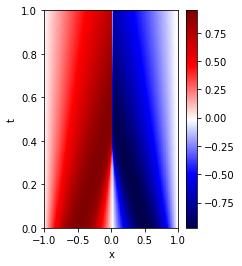

In [12]:
fig = plt.figure(figsize=(3, 4))
plt.pcolor(x_test, t_test, u_pred, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()

In [13]:
u_save = np.stack(u_pred, 0)

In [14]:
np.save(f'SciANN_Bruger_2.npy', u_save)